Problem Statement:--
A company that sells some of the product, and you want to know how well the selling performance of the product. You have the data that we can analyze, but what kind of analysis can we do? Well, we can segment customers based on their buying behavior on the market. Your task is to classify the data into the possible types of customers which the retailer can encounter.

In [1]:
# File is readed
import pandas as pd
data_frame=pd.read_excel("Online_Retail.xlsx")
data_frame.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [7]:
from sklearn.impute import SimpleImputer

df=data_frame.copy()
imputer = SimpleImputer(strategy='mean')
df[['Quantity', 'UnitPrice']] = imputer.fit_transform(df[['Quantity', 'UnitPrice']])
print(df.isnull().sum())

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Quantity'] = (df['Quantity'] - df['Quantity'].min()) / (df['Quantity'].max() - df['Quantity'].min())
df['UnitPrice'] = (df['UnitPrice'] - df['UnitPrice'].min()) / (df['UnitPrice'].max() - df['UnitPrice'].min())
df['TotalPrice'] = (df['Quantity'] *df['UnitPrice'])


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
#checking of missing values
data_frame.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
#Creating some copies of the dataframe to use ahead 
df1=df2=df3=df4=df5=data_frame


In [ ]:
# Preprocessing

# Dropping some unnecessary columns
# data_frame=data_frame.drop('InvoiceNo',axis='columns');

# Replacing missing values in description column with mode of the column
mode_of_description = data_frame['Description'].mode()

print("The mode for the column Description is ",mode_of_description[0])
mode_value=  mode_of_description[0];

# Replacing nan values with mode value

data_frame['Description'] = data_frame['Description'].fillna(mode_value)

# Again checking for missing values
print("Again checking missing values in Description column");
print(data_frame['Description'].isnull().any())

# Replacing missing value in customer Id with mode
mode_val2 = data_frame['CustomerID'].mode()[0];
print("The mode value for CustomerID is ",mode_val2);
data_frame['CustomerID']= data_frame['CustomerID'].fillna(mode_val2)

print("Again checking missing values in CustomerID column");
print(data_frame['CustomerID'].isnull().any())


The mode for the column Description is  WHITE HANGING HEART T-LIGHT HOLDER
Again checking missing values in Description column
False
The mode value for CustomerID is  17841.0
Again checking missing values in CustomerID column
False


In [ ]:
# Printing the preprocessed dataframe
print("The preprocessed dataframe is ")
print(data_frame);

The preprocessed dataframe is 
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custo

In [ ]:
# Data Visualisation and analysis
import pandas as pd

# Unique country names
country_names = pd.unique(data_frame['Country']);

# Unique product names
product_description = pd.unique(data_frame["Description"]);

key_values = country_names ;
count_dictionary={};
val_values = [];

# Finding a dictionary which holds a count of every product's sale according to every country
for j in country_names:
  dict_temp={};
  temp_dataset = data_frame[data_frame['Country']==j];
  for i in temp_dataset["Description"].unique():
           dict_temp[i]=0
  for i in temp_dataset["Description"].keys():
           dict_temp[temp_dataset["Description"][i]]+=temp_dataset["Quantity"][i]
  count_dictionary[j]=dict_temp
print(count_dictionary)
  


{'United Kingdom': {'WHITE HANGING HEART T-LIGHT HOLDER': 19584, 'WHITE METAL LANTERN': 1779, 'CREAM CUPID HEARTS COAT HANGER': 1411, 'KNITTED UNION FLAG HOT WATER BOTTLE': 3228, 'RED WOOLLY HOTTIE WHITE HEART.': 4472, 'SET 7 BABUSHKA NESTING BOXES': 1399, 'GLASS STAR FROSTED T-LIGHT HOLDER': 481, 'HAND WARMER UNION JACK': 4806, 'HAND WARMER RED POLKA DOT': 120, 'ASSORTED COLOUR BIRD ORNAMENT': 33679, "POPPY'S PLAYHOUSE BEDROOM ": 1435, "POPPY'S PLAYHOUSE KITCHEN": 1569, 'FELTCRAFT PRINCESS CHARLOTTE DOLL': 1843, 'IVORY KNITTED MUG COSY ': 554, 'BOX OF 6 ASSORTED COLOUR TEASPOONS': 493, 'BOX OF VINTAGE JIGSAW BLOCKS ': 663, 'BOX OF VINTAGE ALPHABET BLOCKS': 1203, 'HOME BUILDING BLOCK WORD': 2610, 'LOVE BUILDING BLOCK WORD': 1918, 'RECIPE BOX WITH METAL HEART': 7, 'DOORMAT NEW ENGLAND': 3640, 'JAM MAKING SET WITH JARS': 6463, 'RED COAT RACK PARIS FASHION': 243, 'YELLOW COAT RACK PARIS FASHION': 237, 'BLUE COAT RACK PARIS FASHION': 320, 'BATH BUILDING BLOCK WORD': 710, "PAPER CHAIN KIT 5

In [ ]:
# Sorting the dictionary of counts of every product to get some best selling products in a country
for i in count_dictionary:
  temp_dict= count_dictionary[i];
  sorted_values = sorted(temp_dict.values());
  sorted_dict = {} ;
  for sort in sorted_values:
    for keys in temp_dict.keys():
      if (temp_dict[keys] == sort):
        sorted_dict[keys ]= temp_dict[keys];
        break;
  count_dictionary[i]= sorted_dict ;
print(count_dictionary);

{'United Kingdom': {'printing smudges/thrown away': -19200, 'Unsaleable, destroyed.': -15644, 'check': -12030, 'Printing smudges/thrown away': -9058, 'Damaged': -7540, 'throw away': -5368, 'damages': -4338, 'incorrect stock entry.': -4320, 'thrown away': -4110, 'wrongly marked. 23343 in box': -3100, 'damages wax': -2844, 'mouldy, thrown away.': -2600, "thrown away-can't sell": -2472, 'sold as set on dotcom': -2393, 'Thrown away-rusty': -2376, '?missing': -2331, '??': -1849, 'mouldy, unsaleable.': -1681, 'damaged': -1632, 'wet pallet': -1608, 'damages/credits from ASOS.': -1512, 'mystery! Only ever imported 1800': -1479, 'Incorrect stock entry.': -1440, 'Given away': -1400, '?': -1384, 'missing': -1318, 'reverse previous adjustment': -1300, 'sold as set on dotcom and amazon': -1206, '? sold as sets?': -1200, 'Discount': -1191, 'wet rusty': -1152, 'lost??': -1131, 'Thrown away.': -1121, 'damaged stock': -1100, 'lost': -1050, 'wrongly sold sets': -975, 'code mix up? 84930': -967, 'wrongly

For  United Kingdom


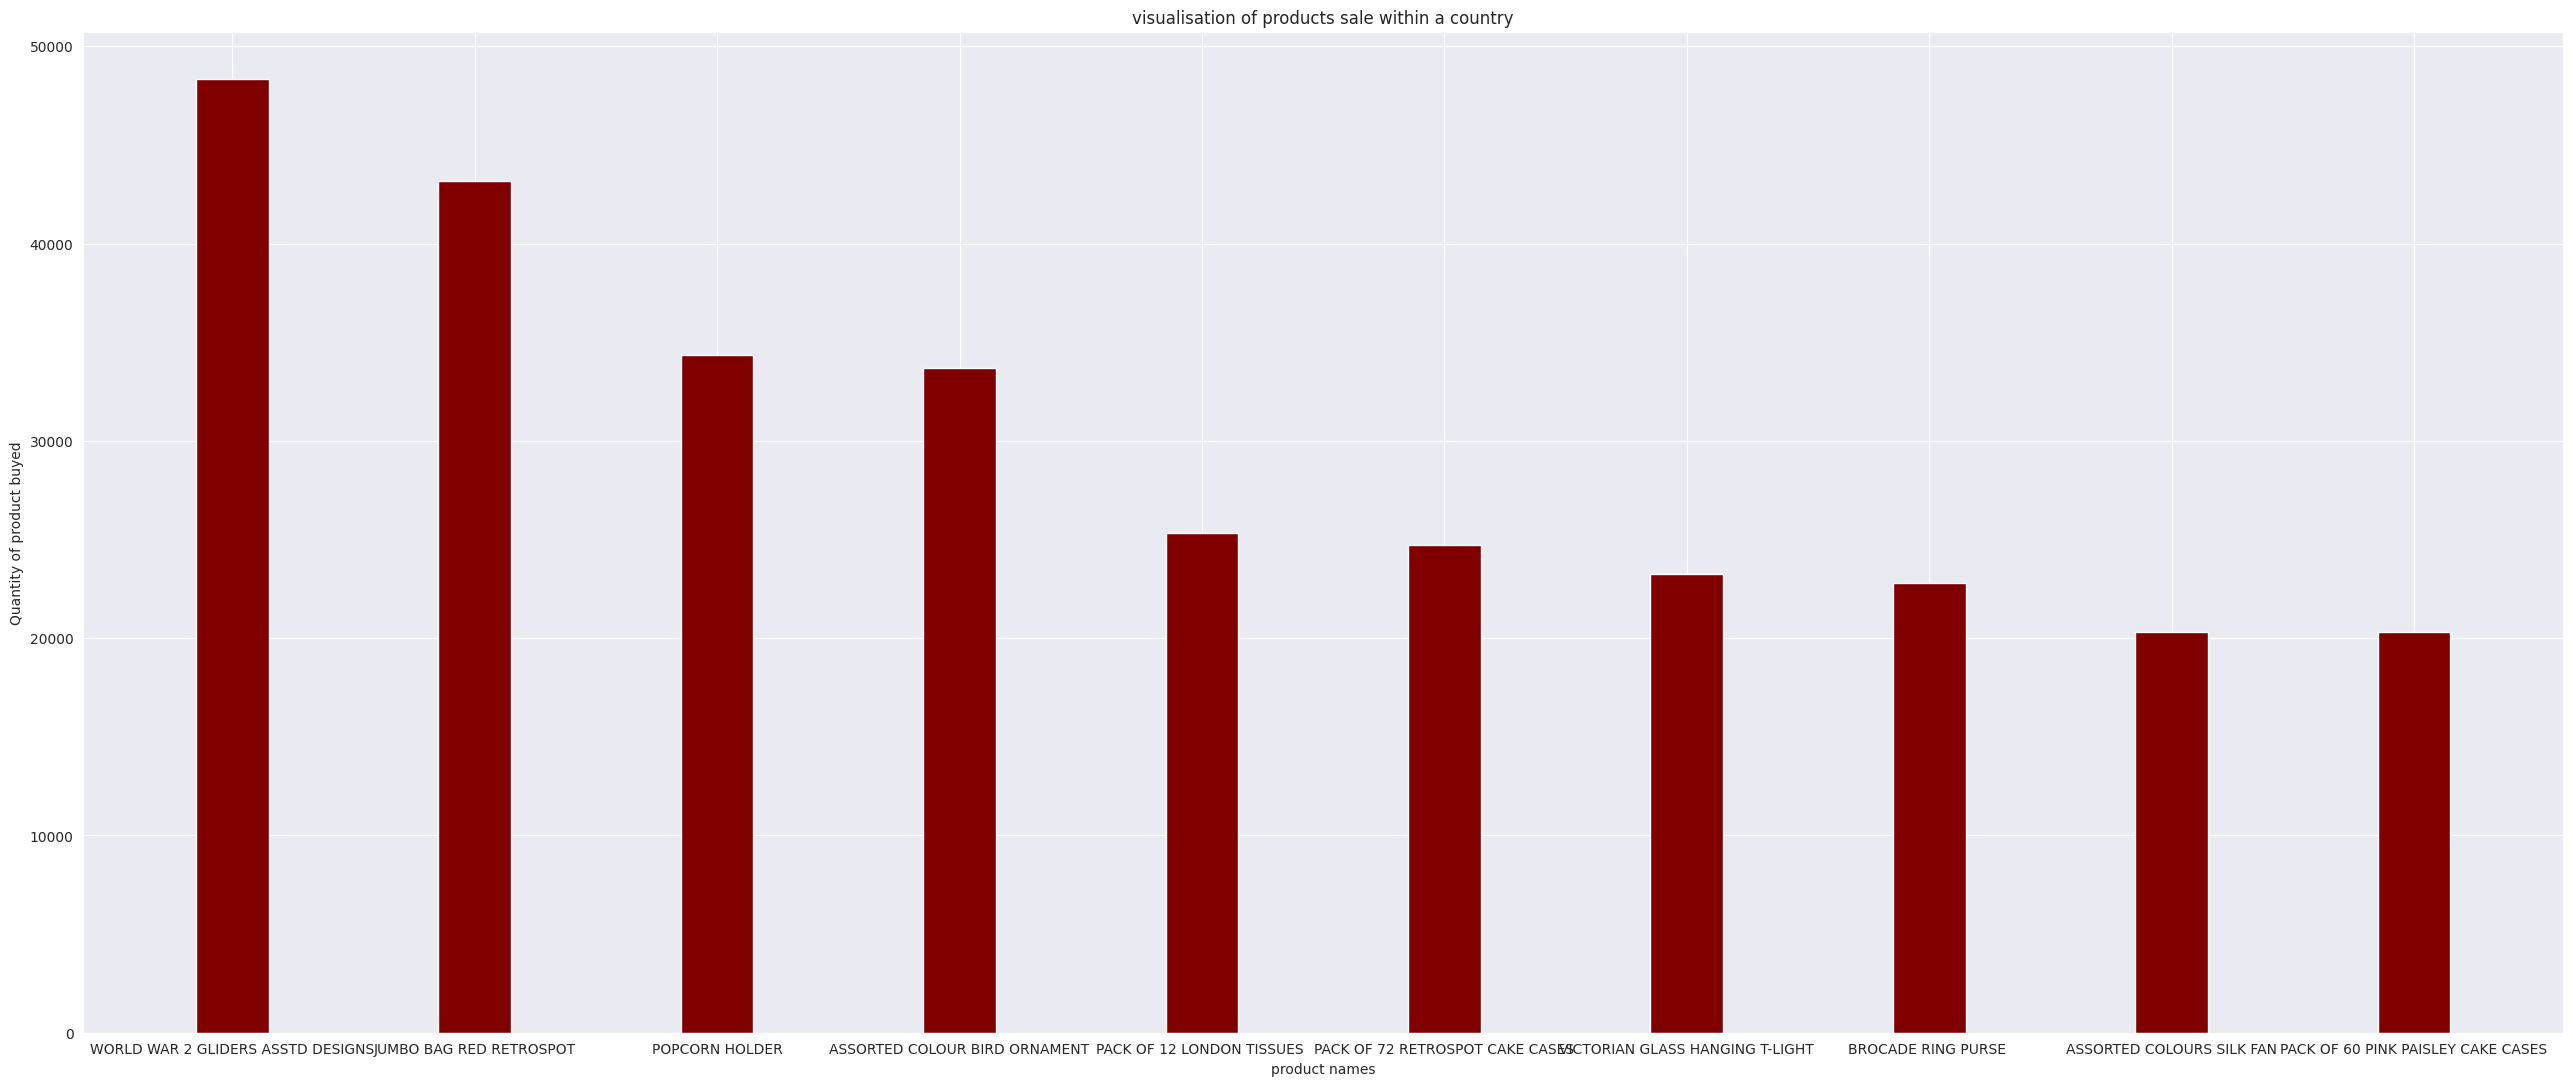

For  France


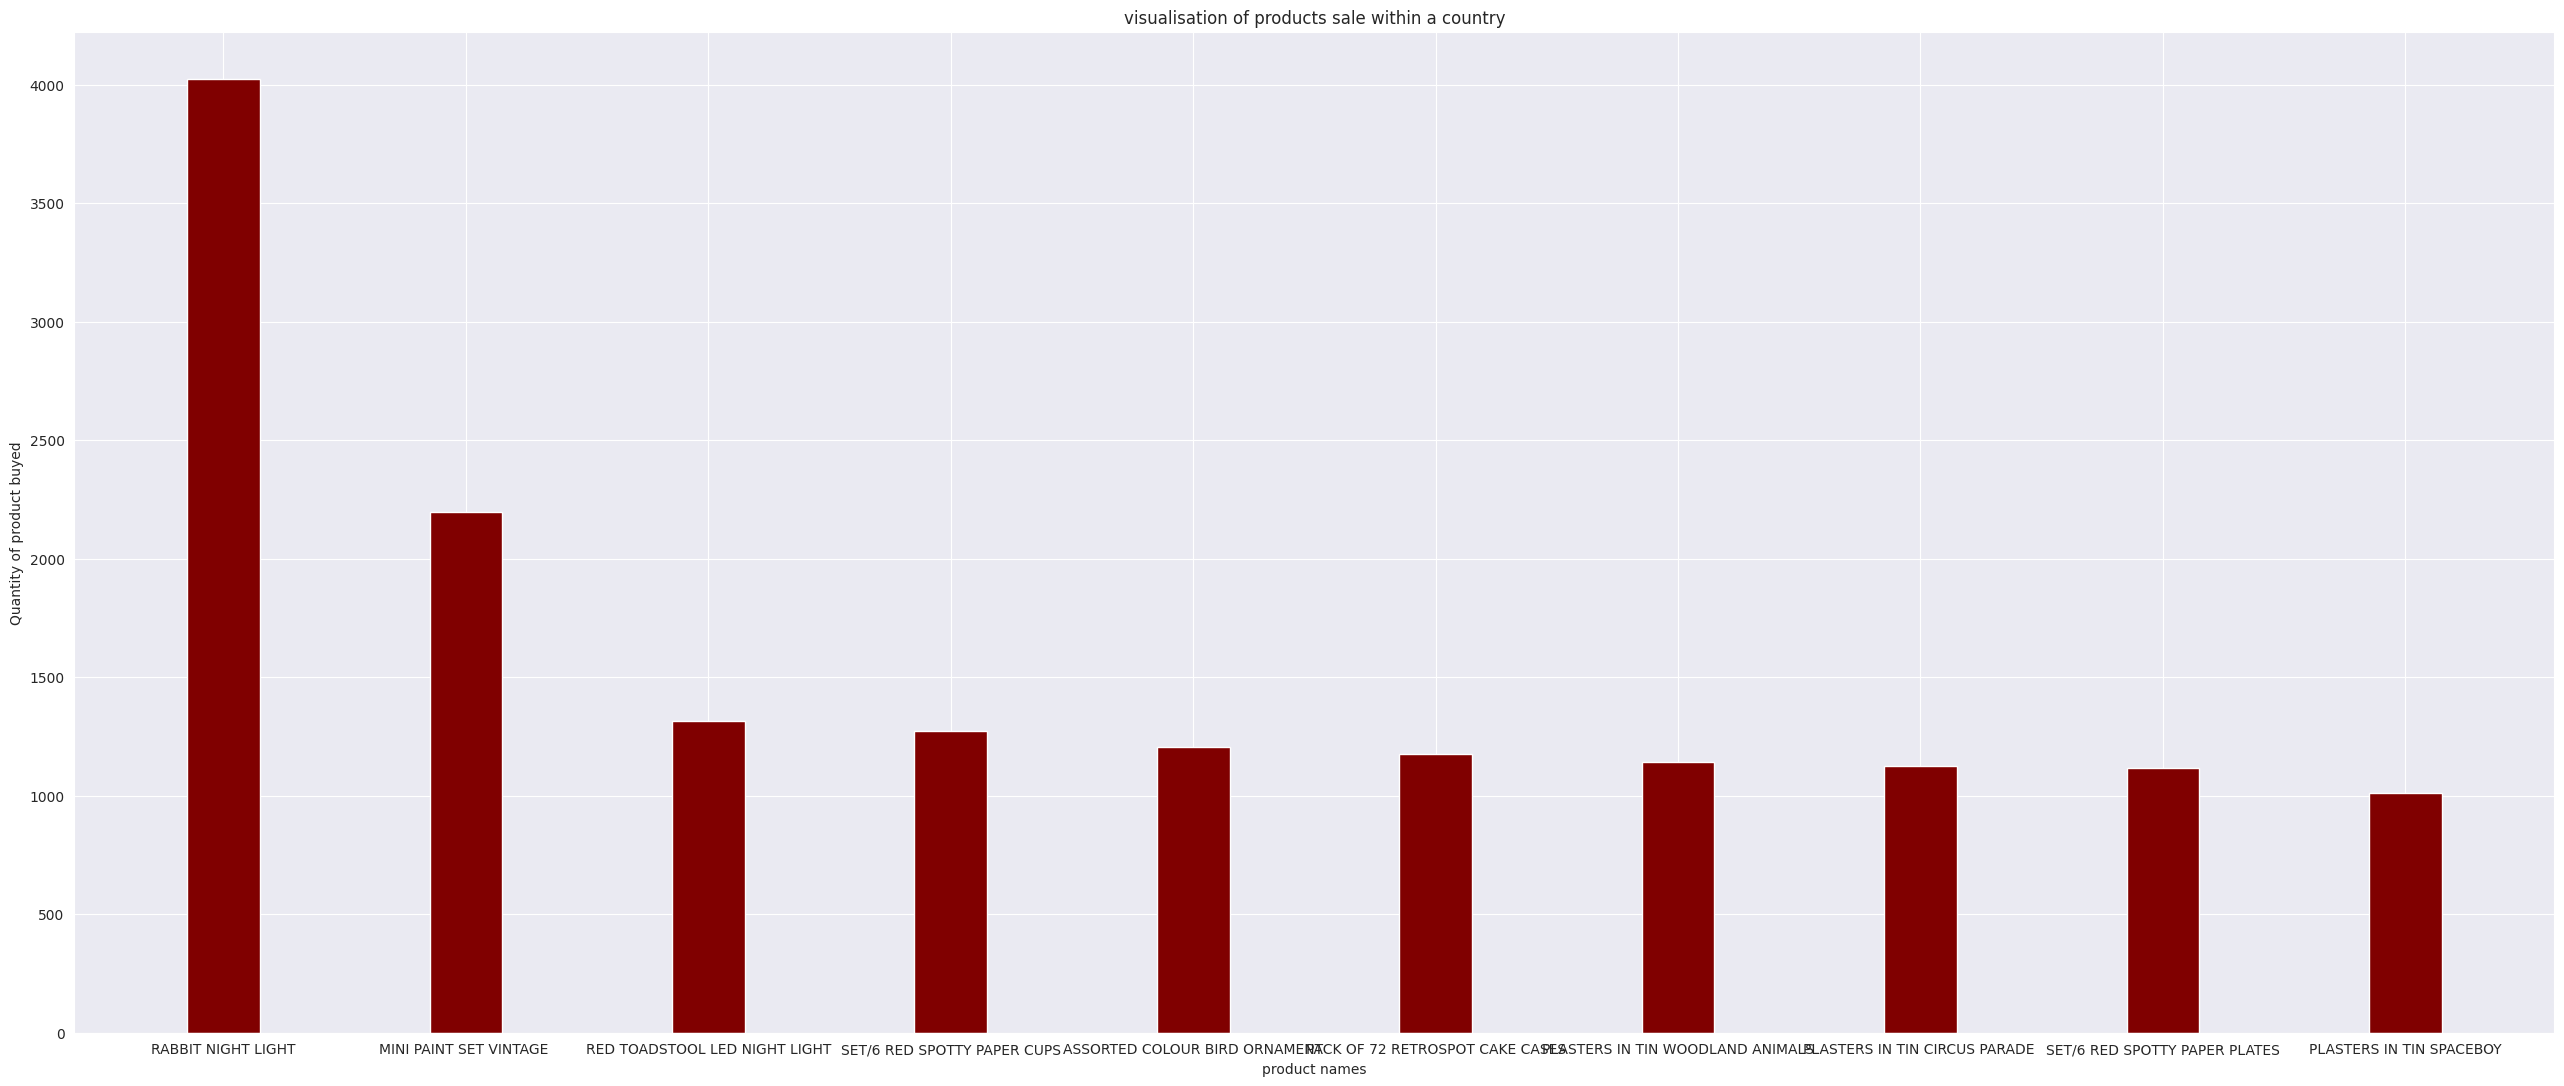

For  Australia


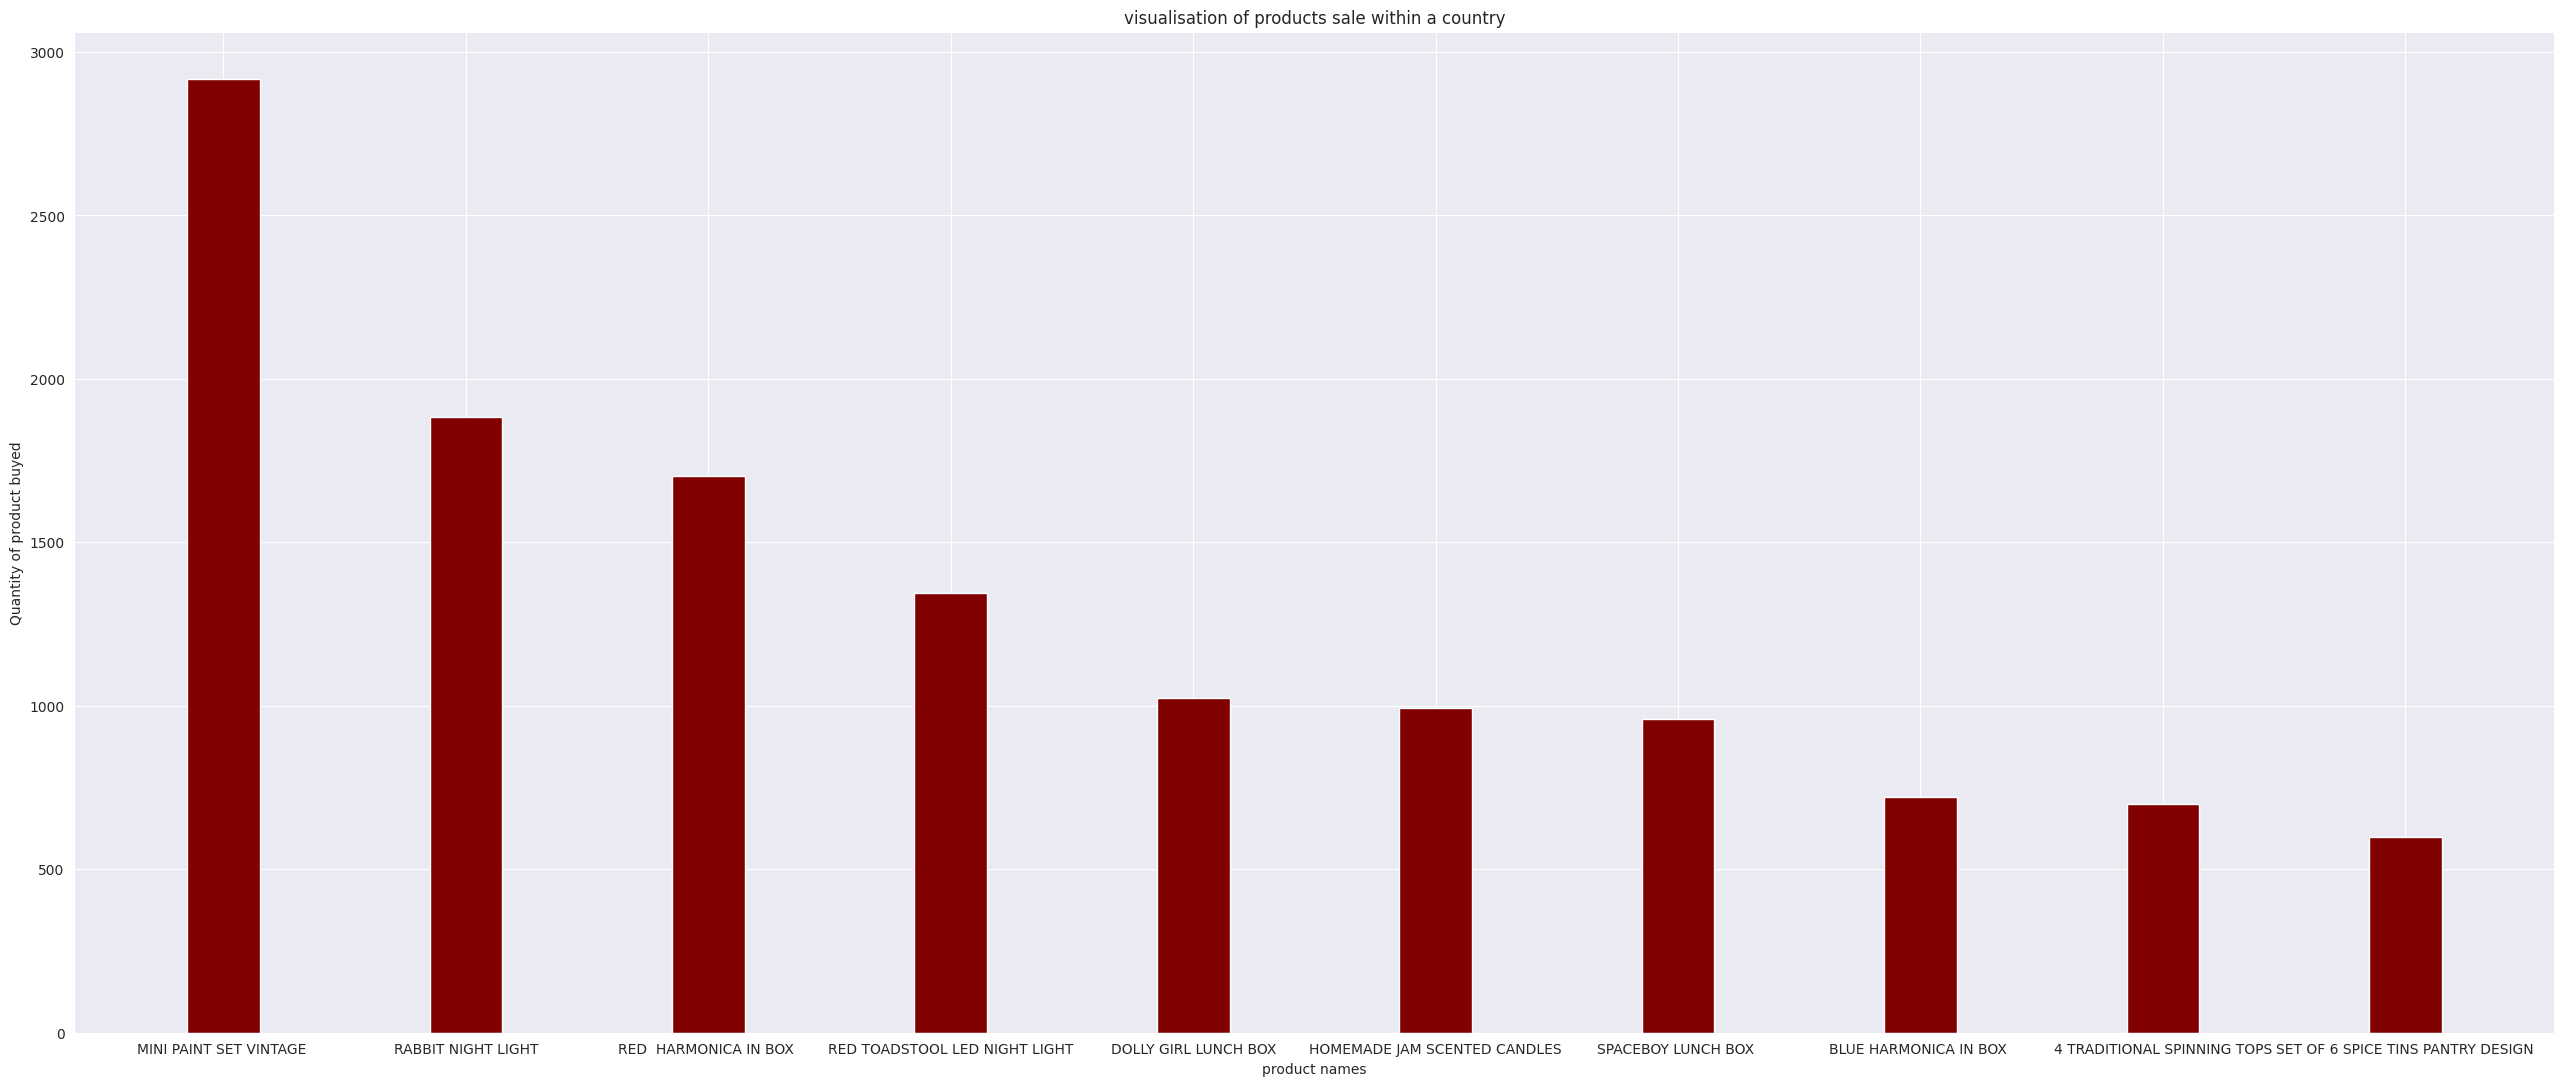

For  Netherlands


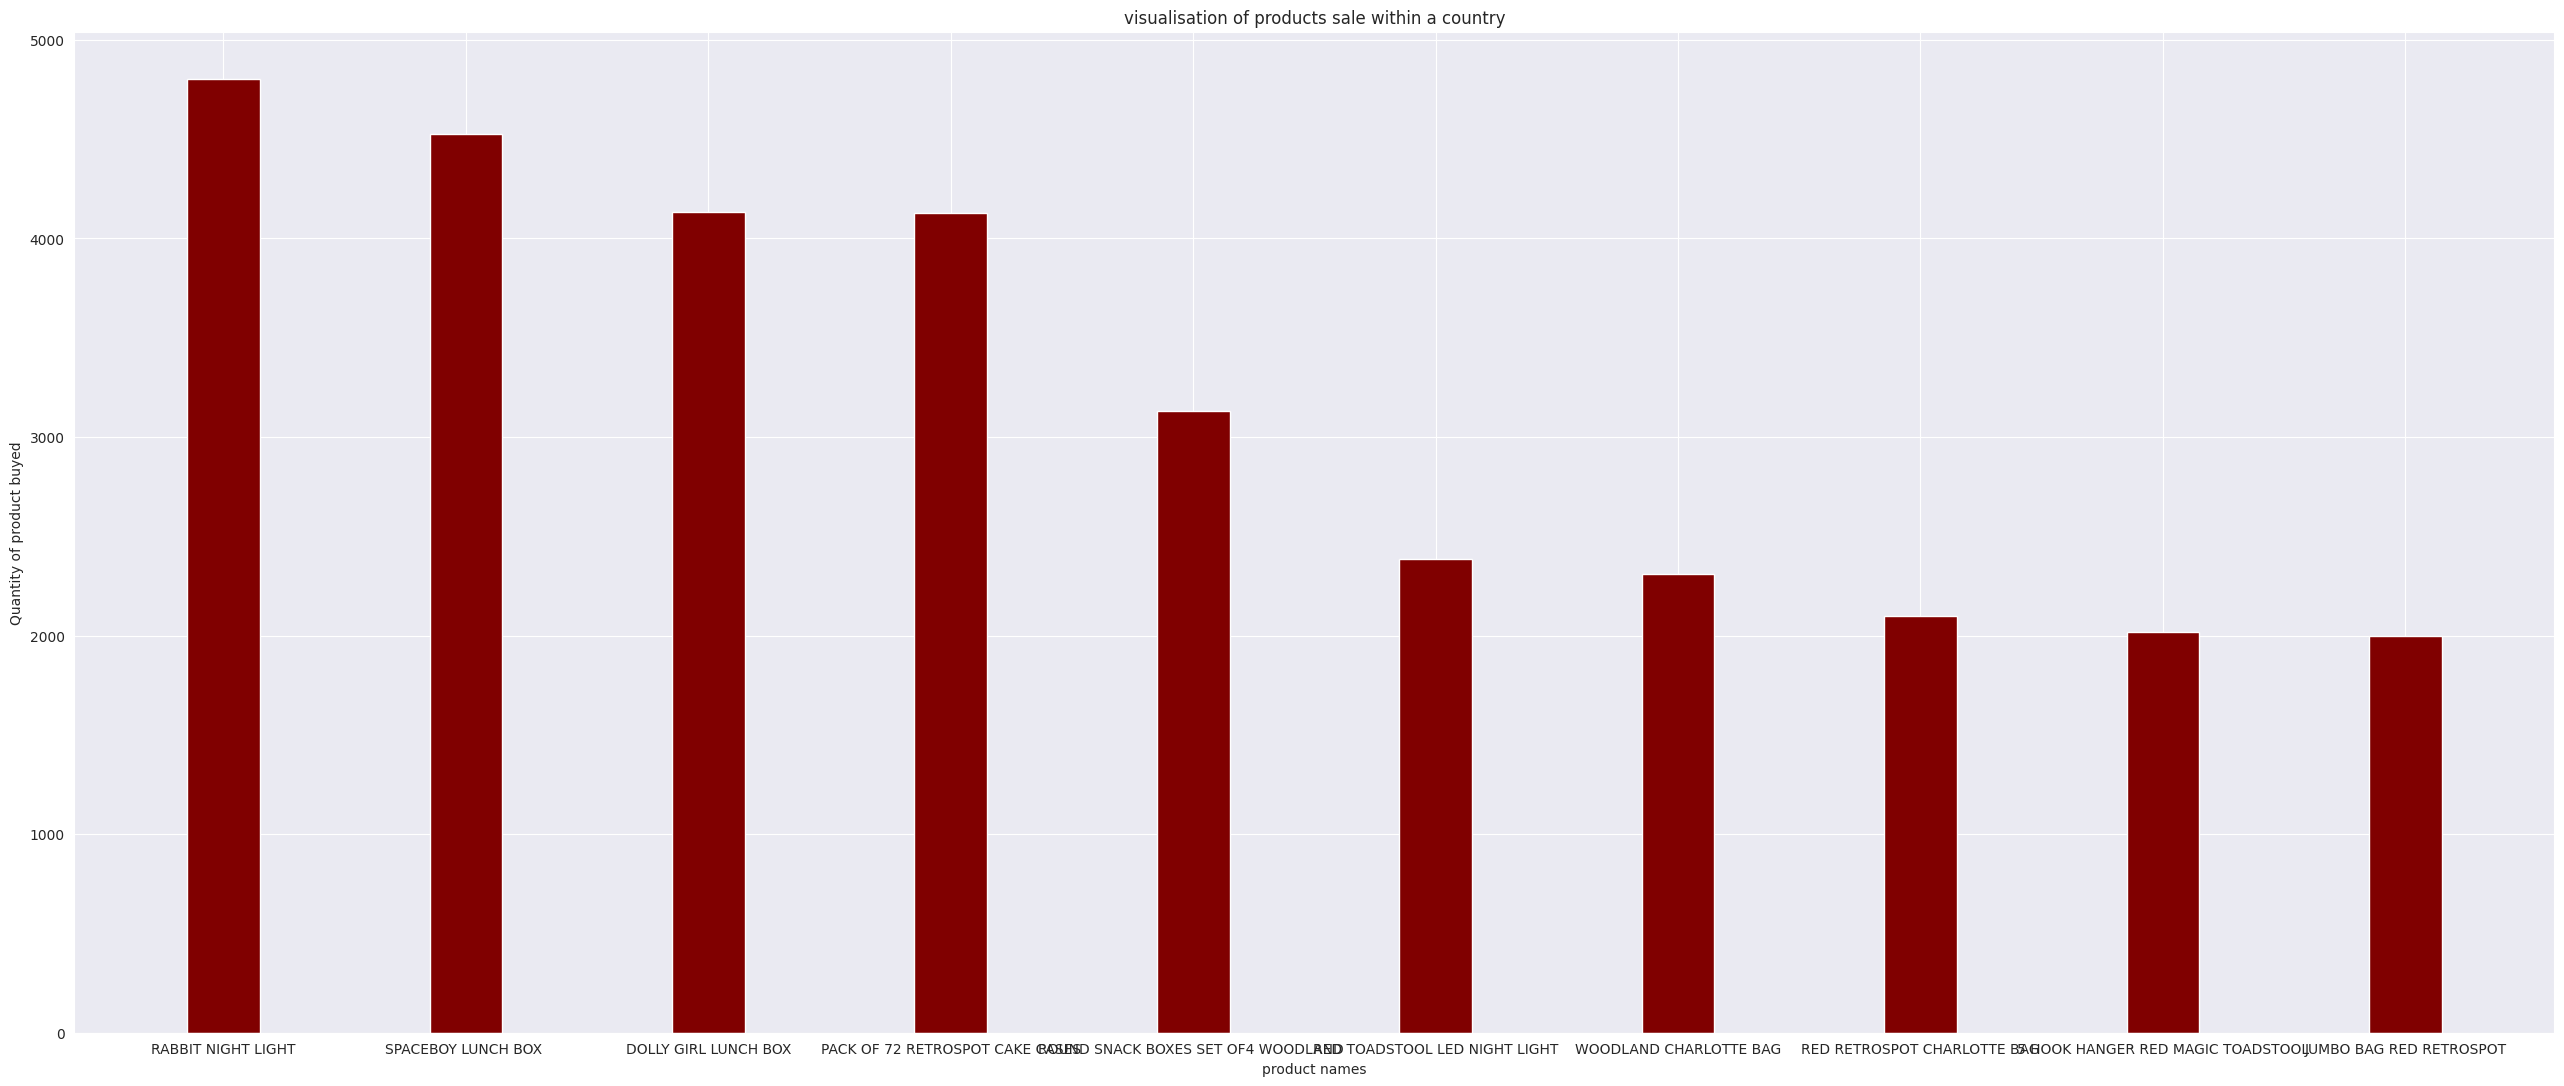

For  Germany


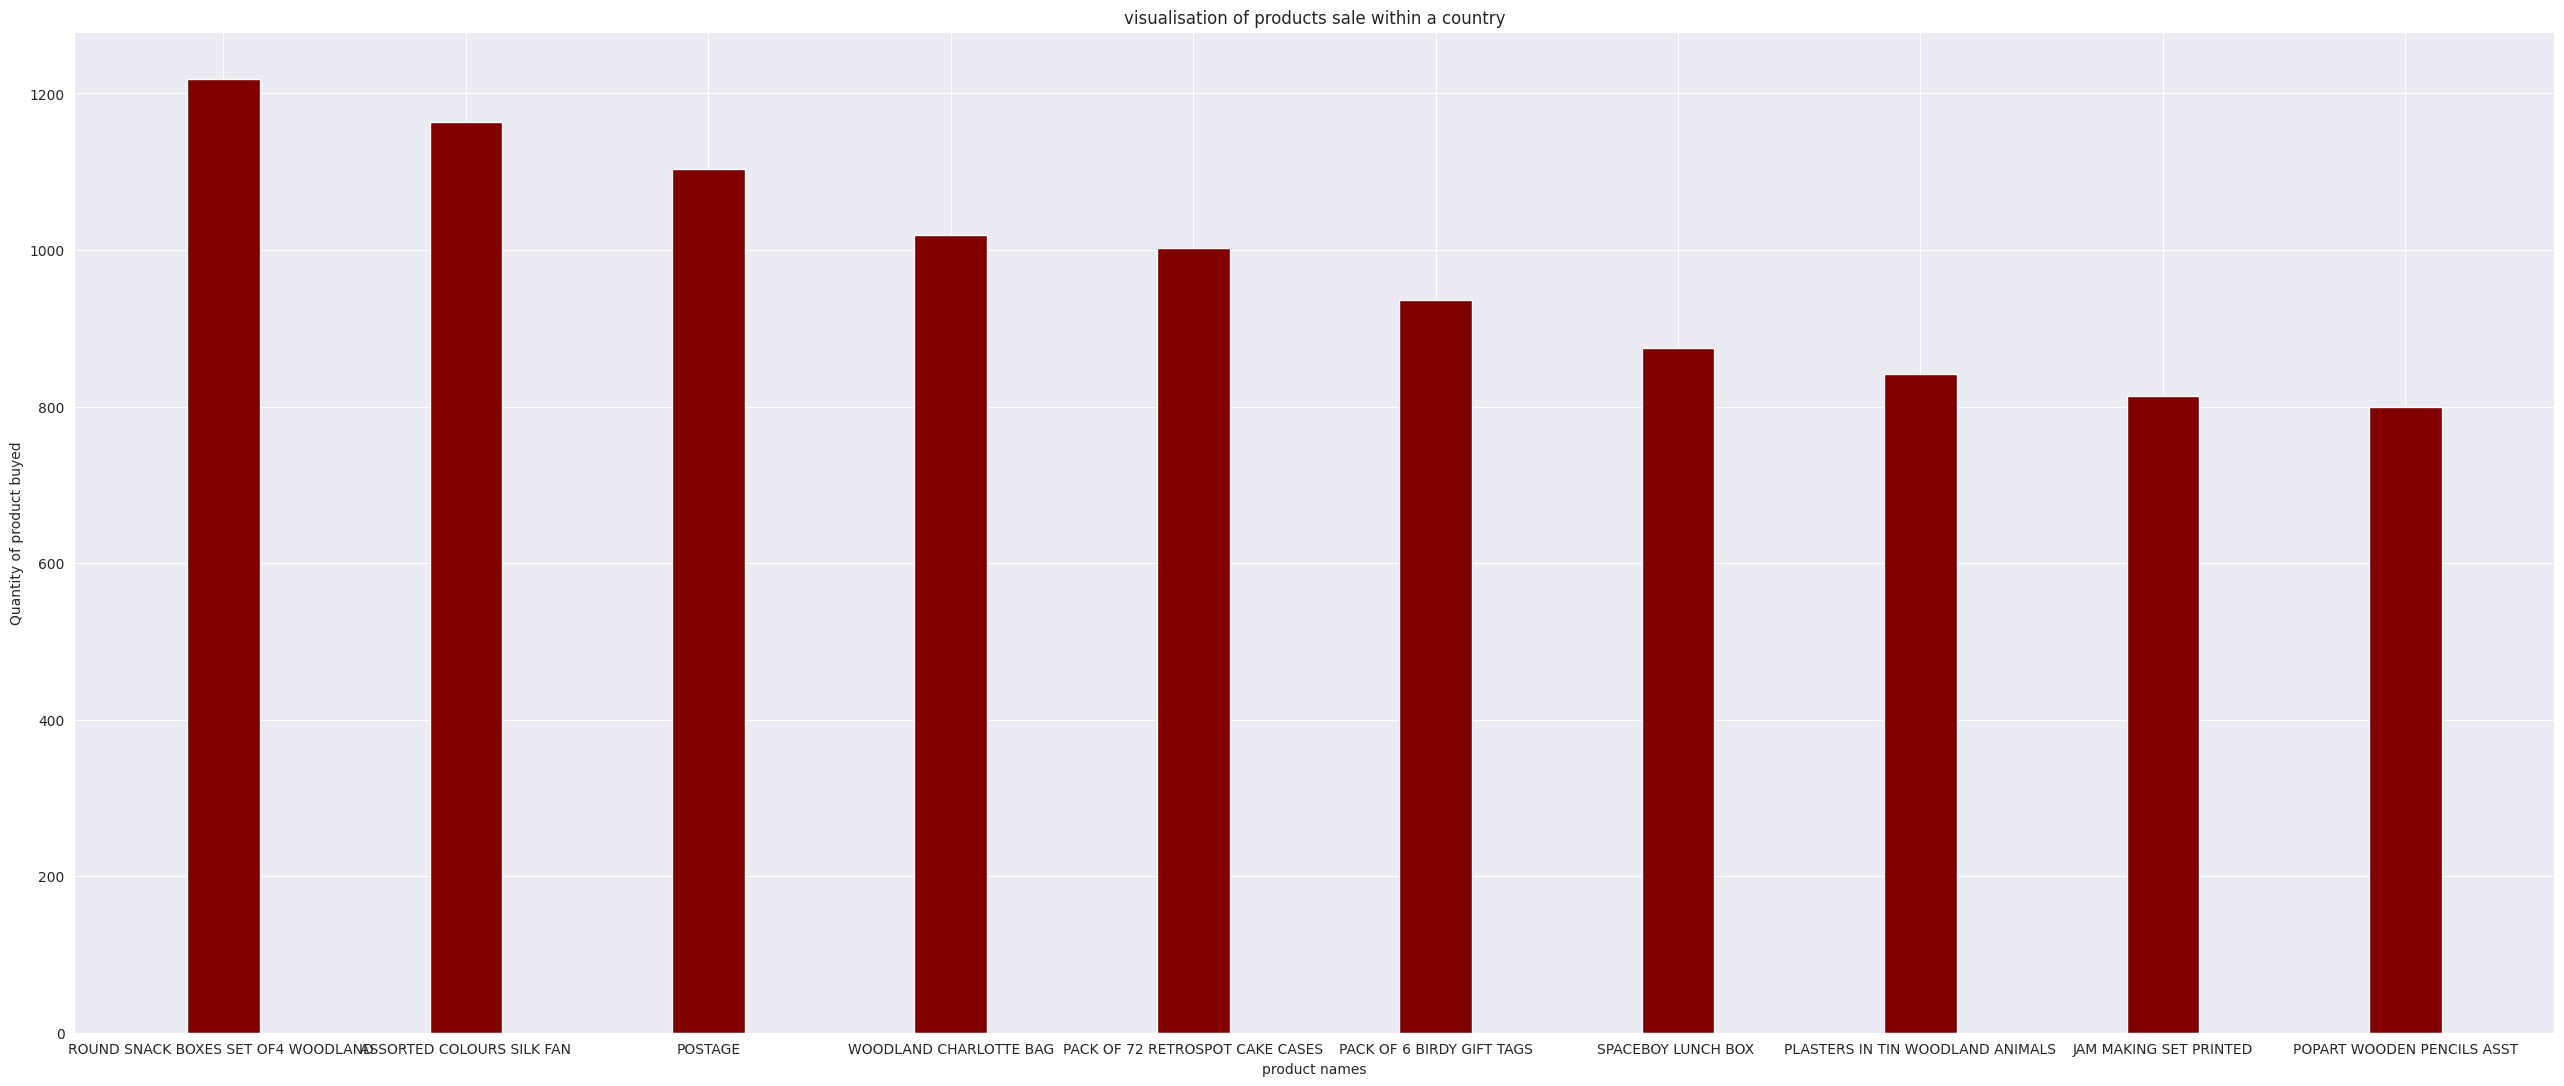

For  Norway


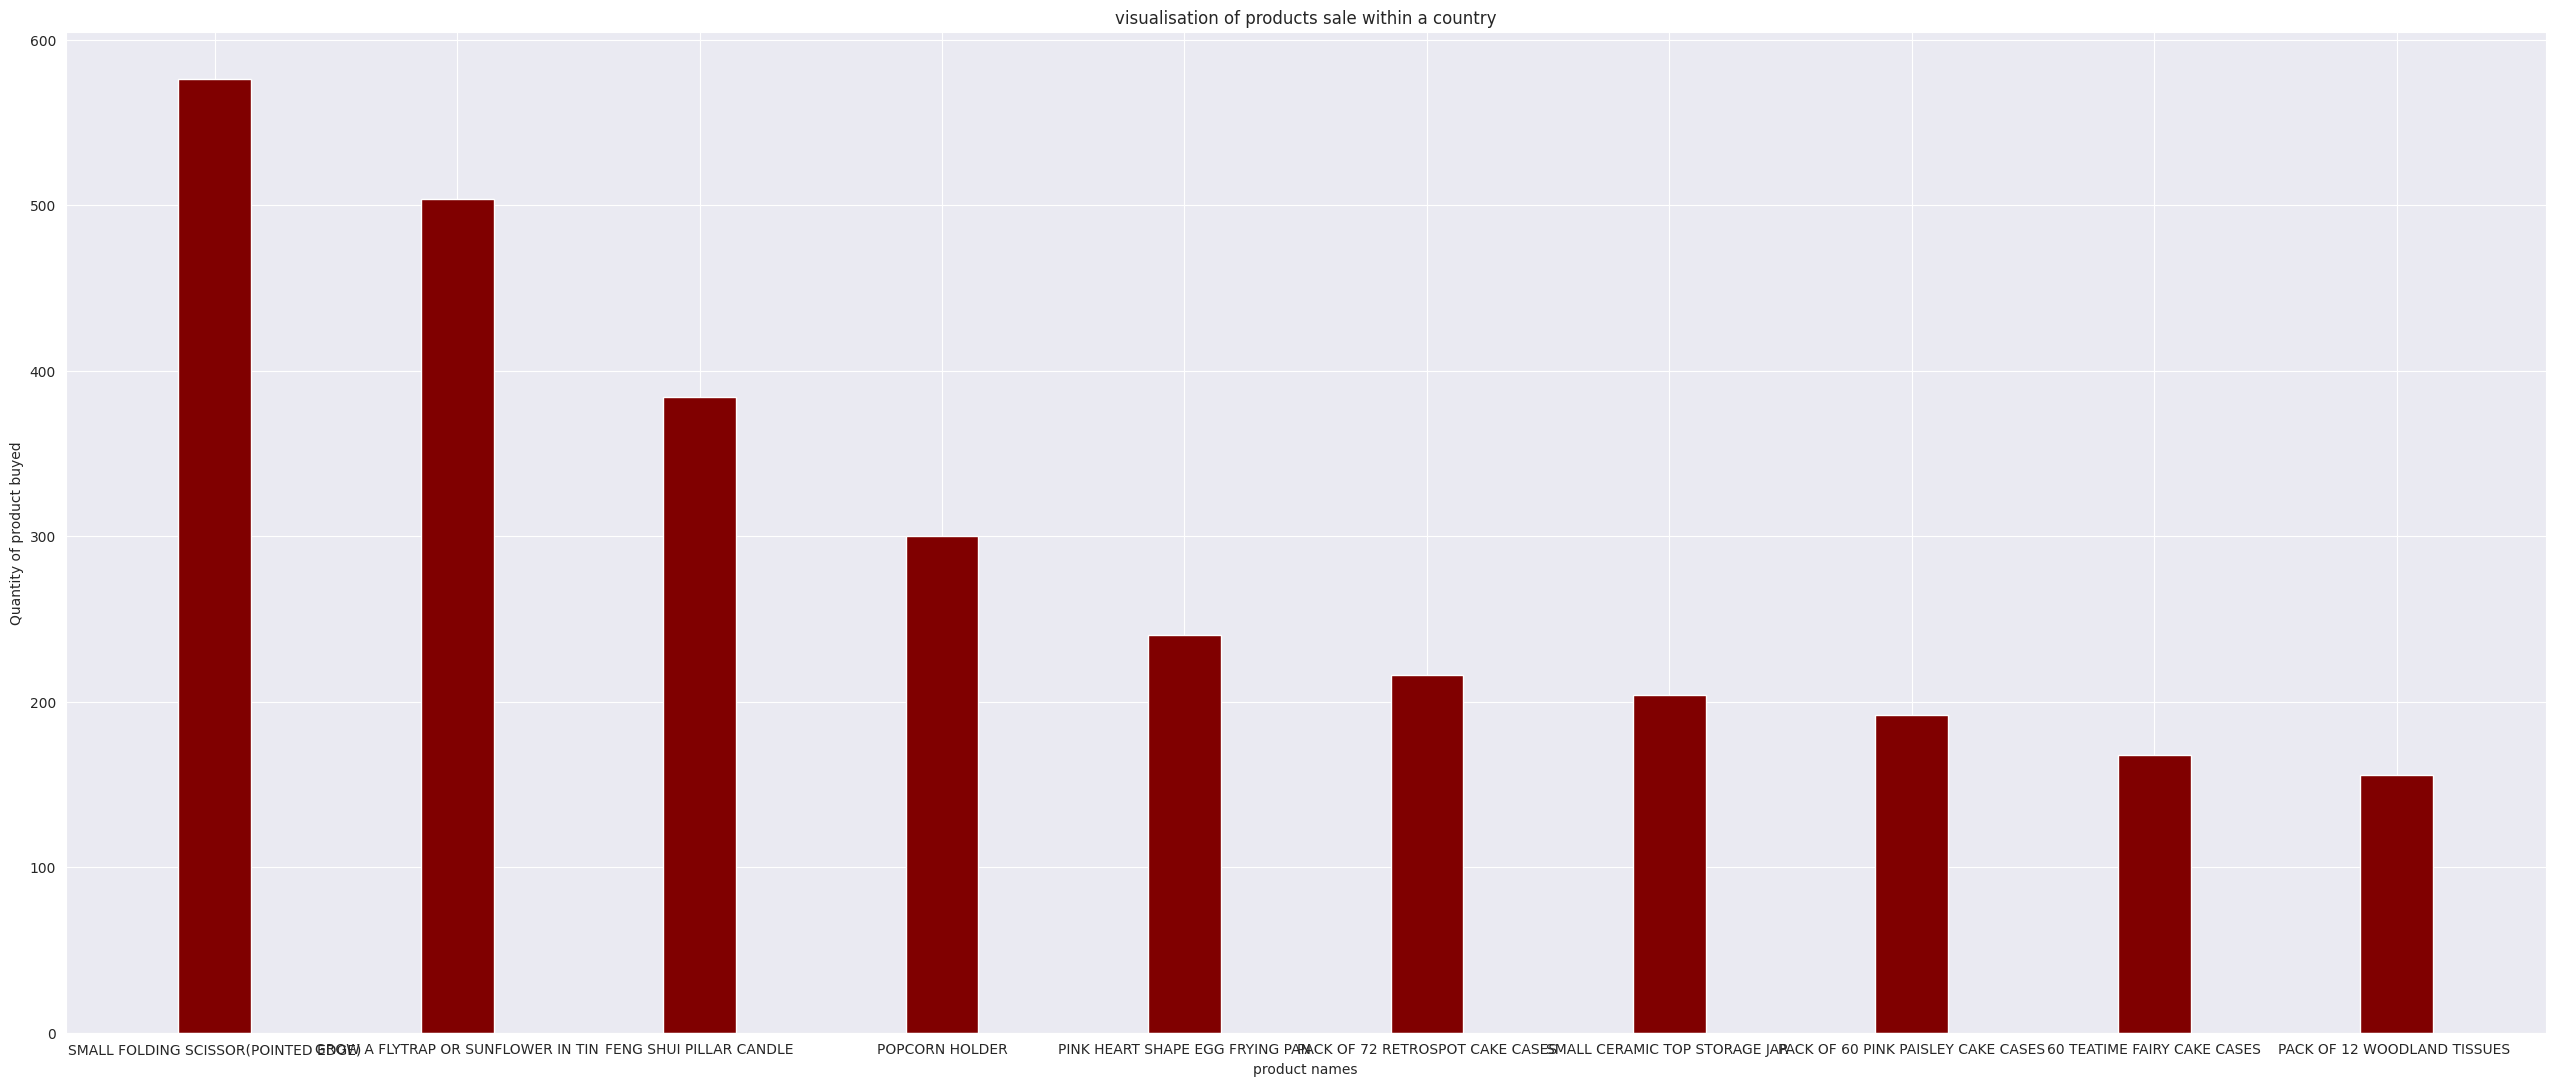

For  EIRE


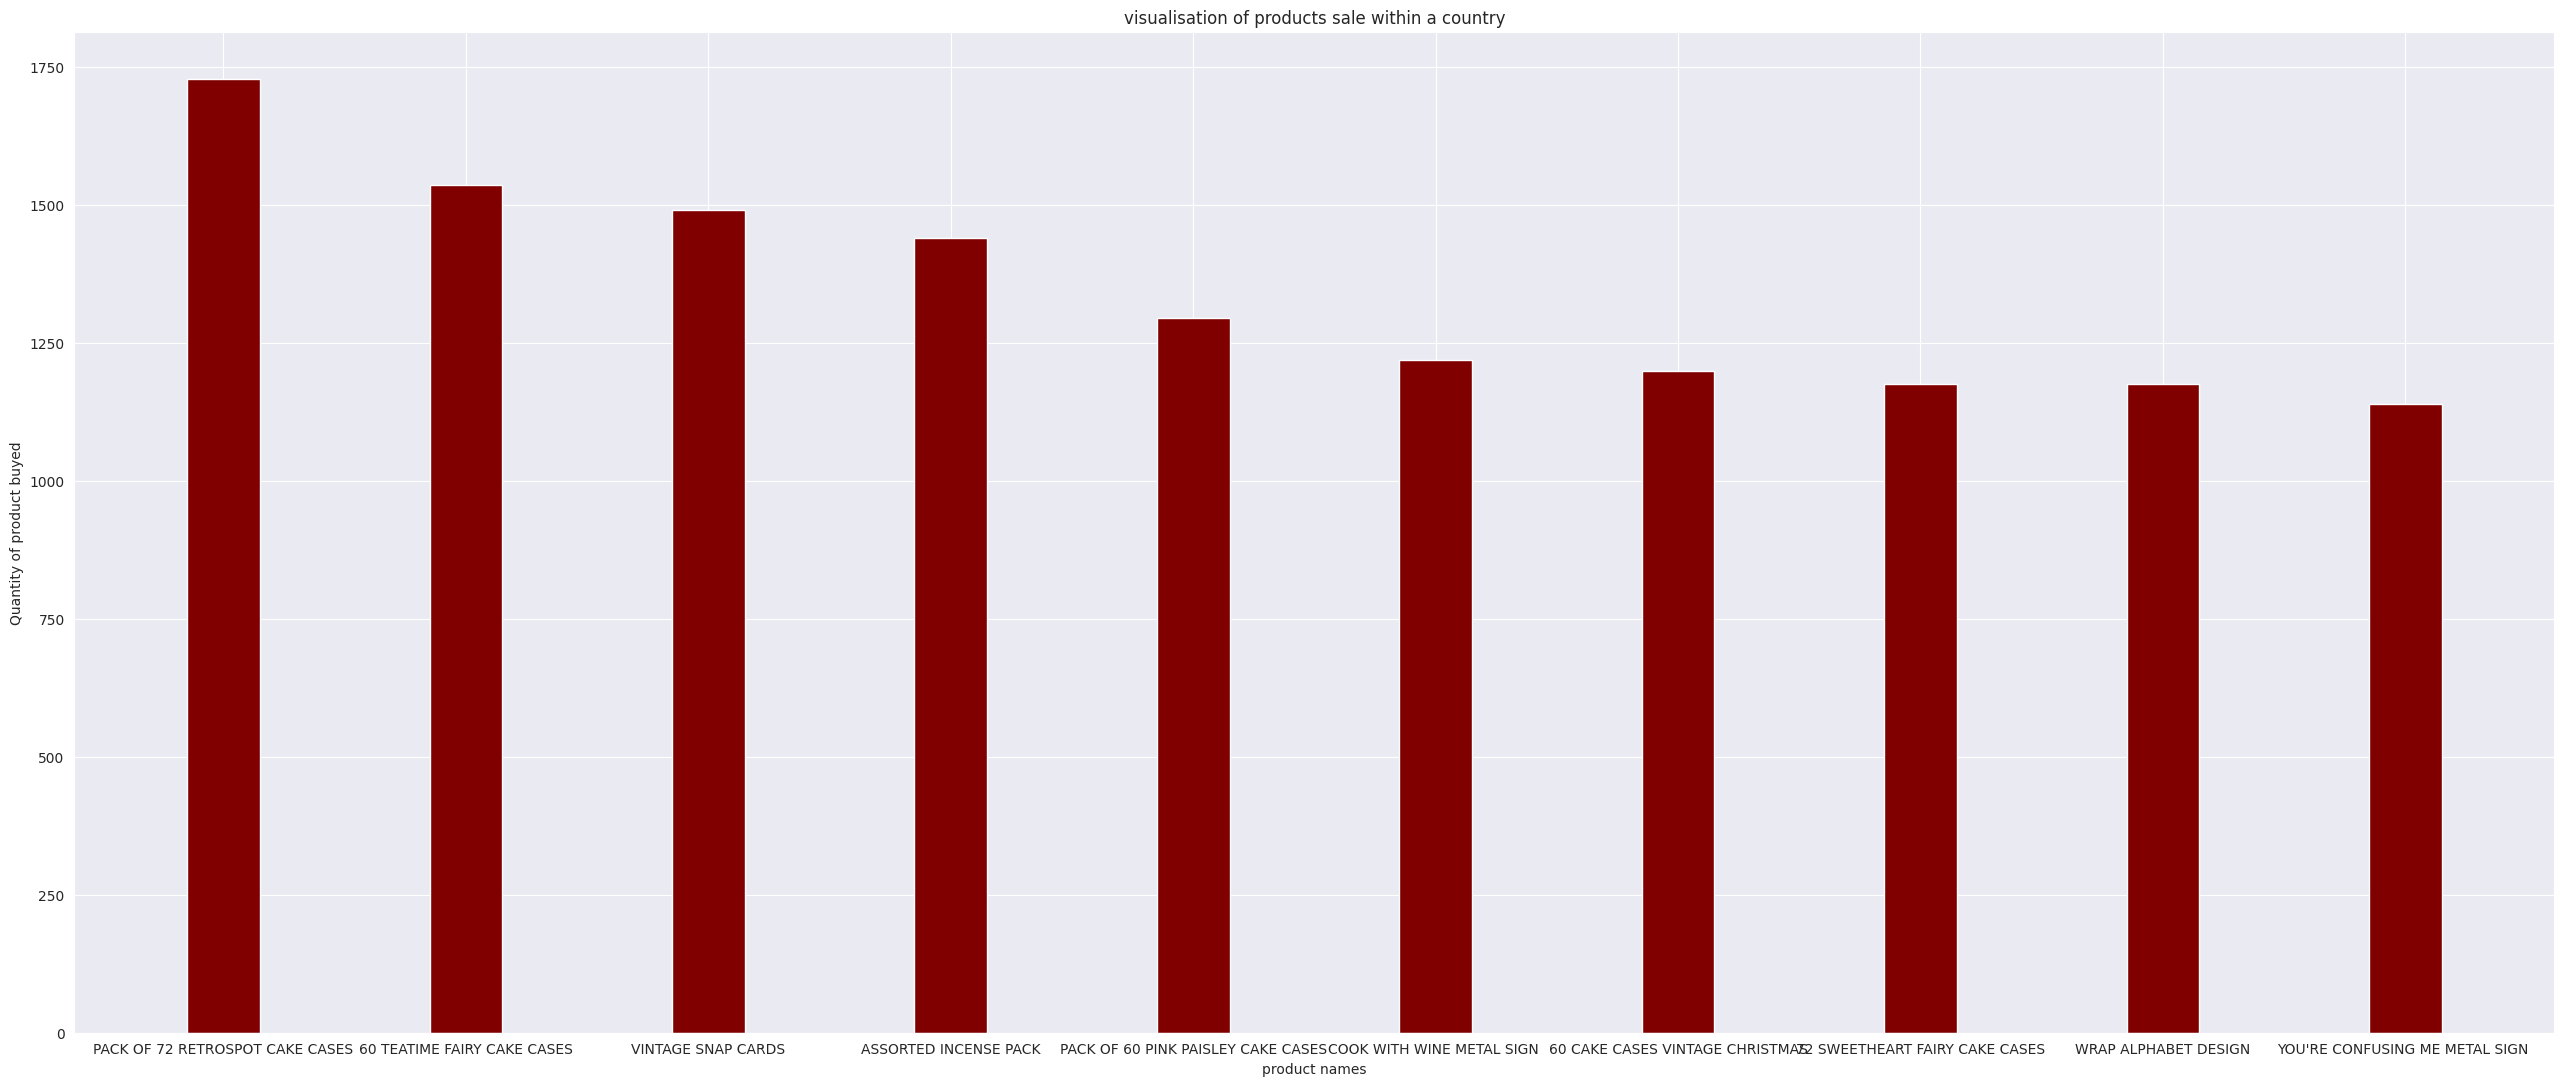

For  Switzerland


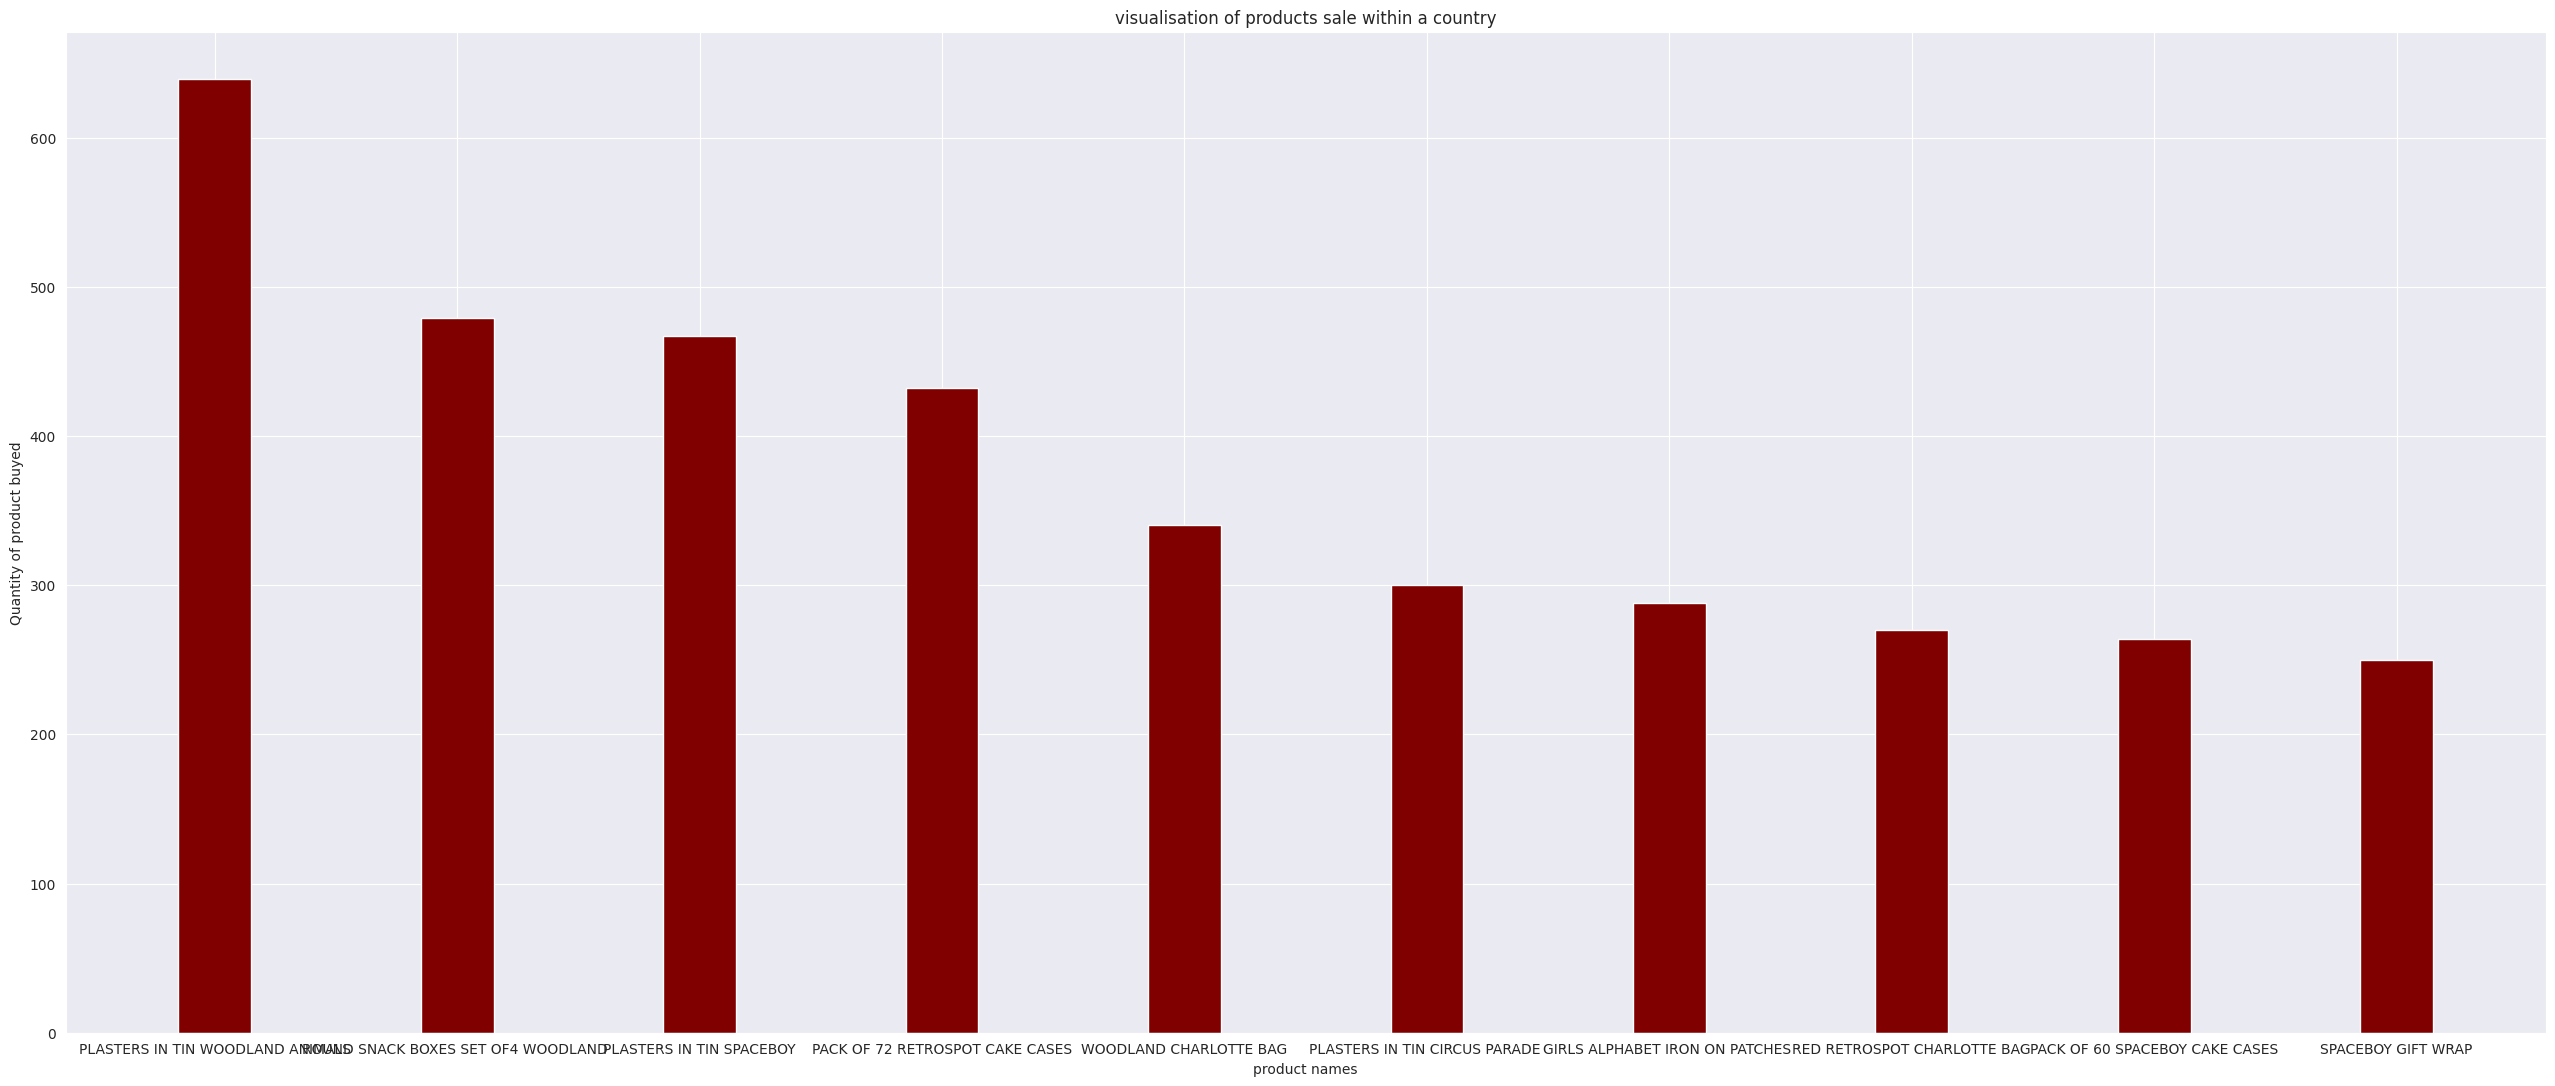

For  Spain


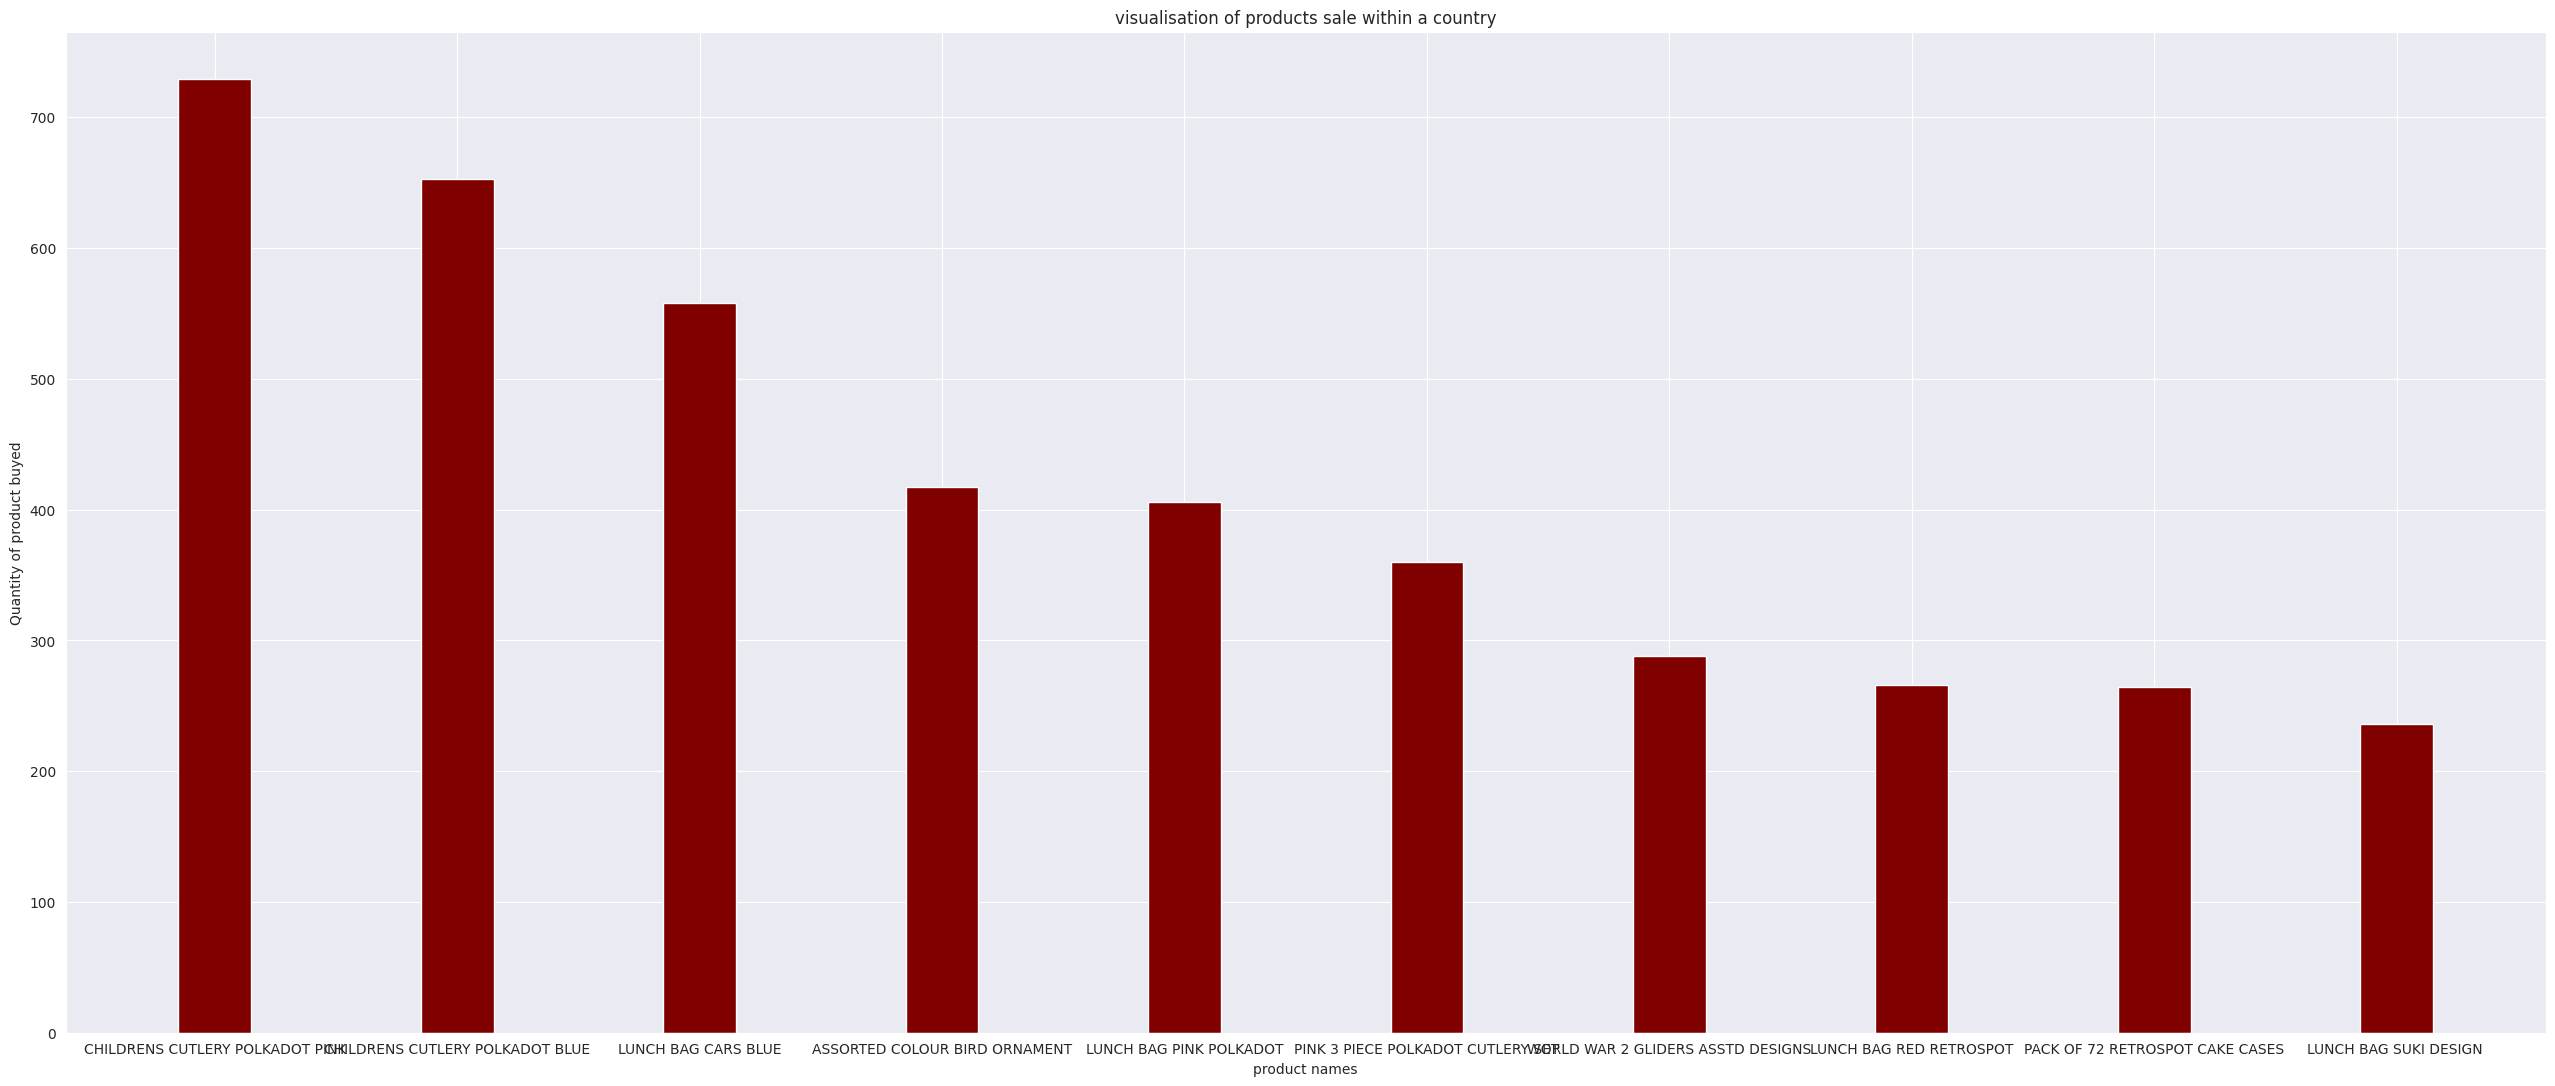

For  Poland


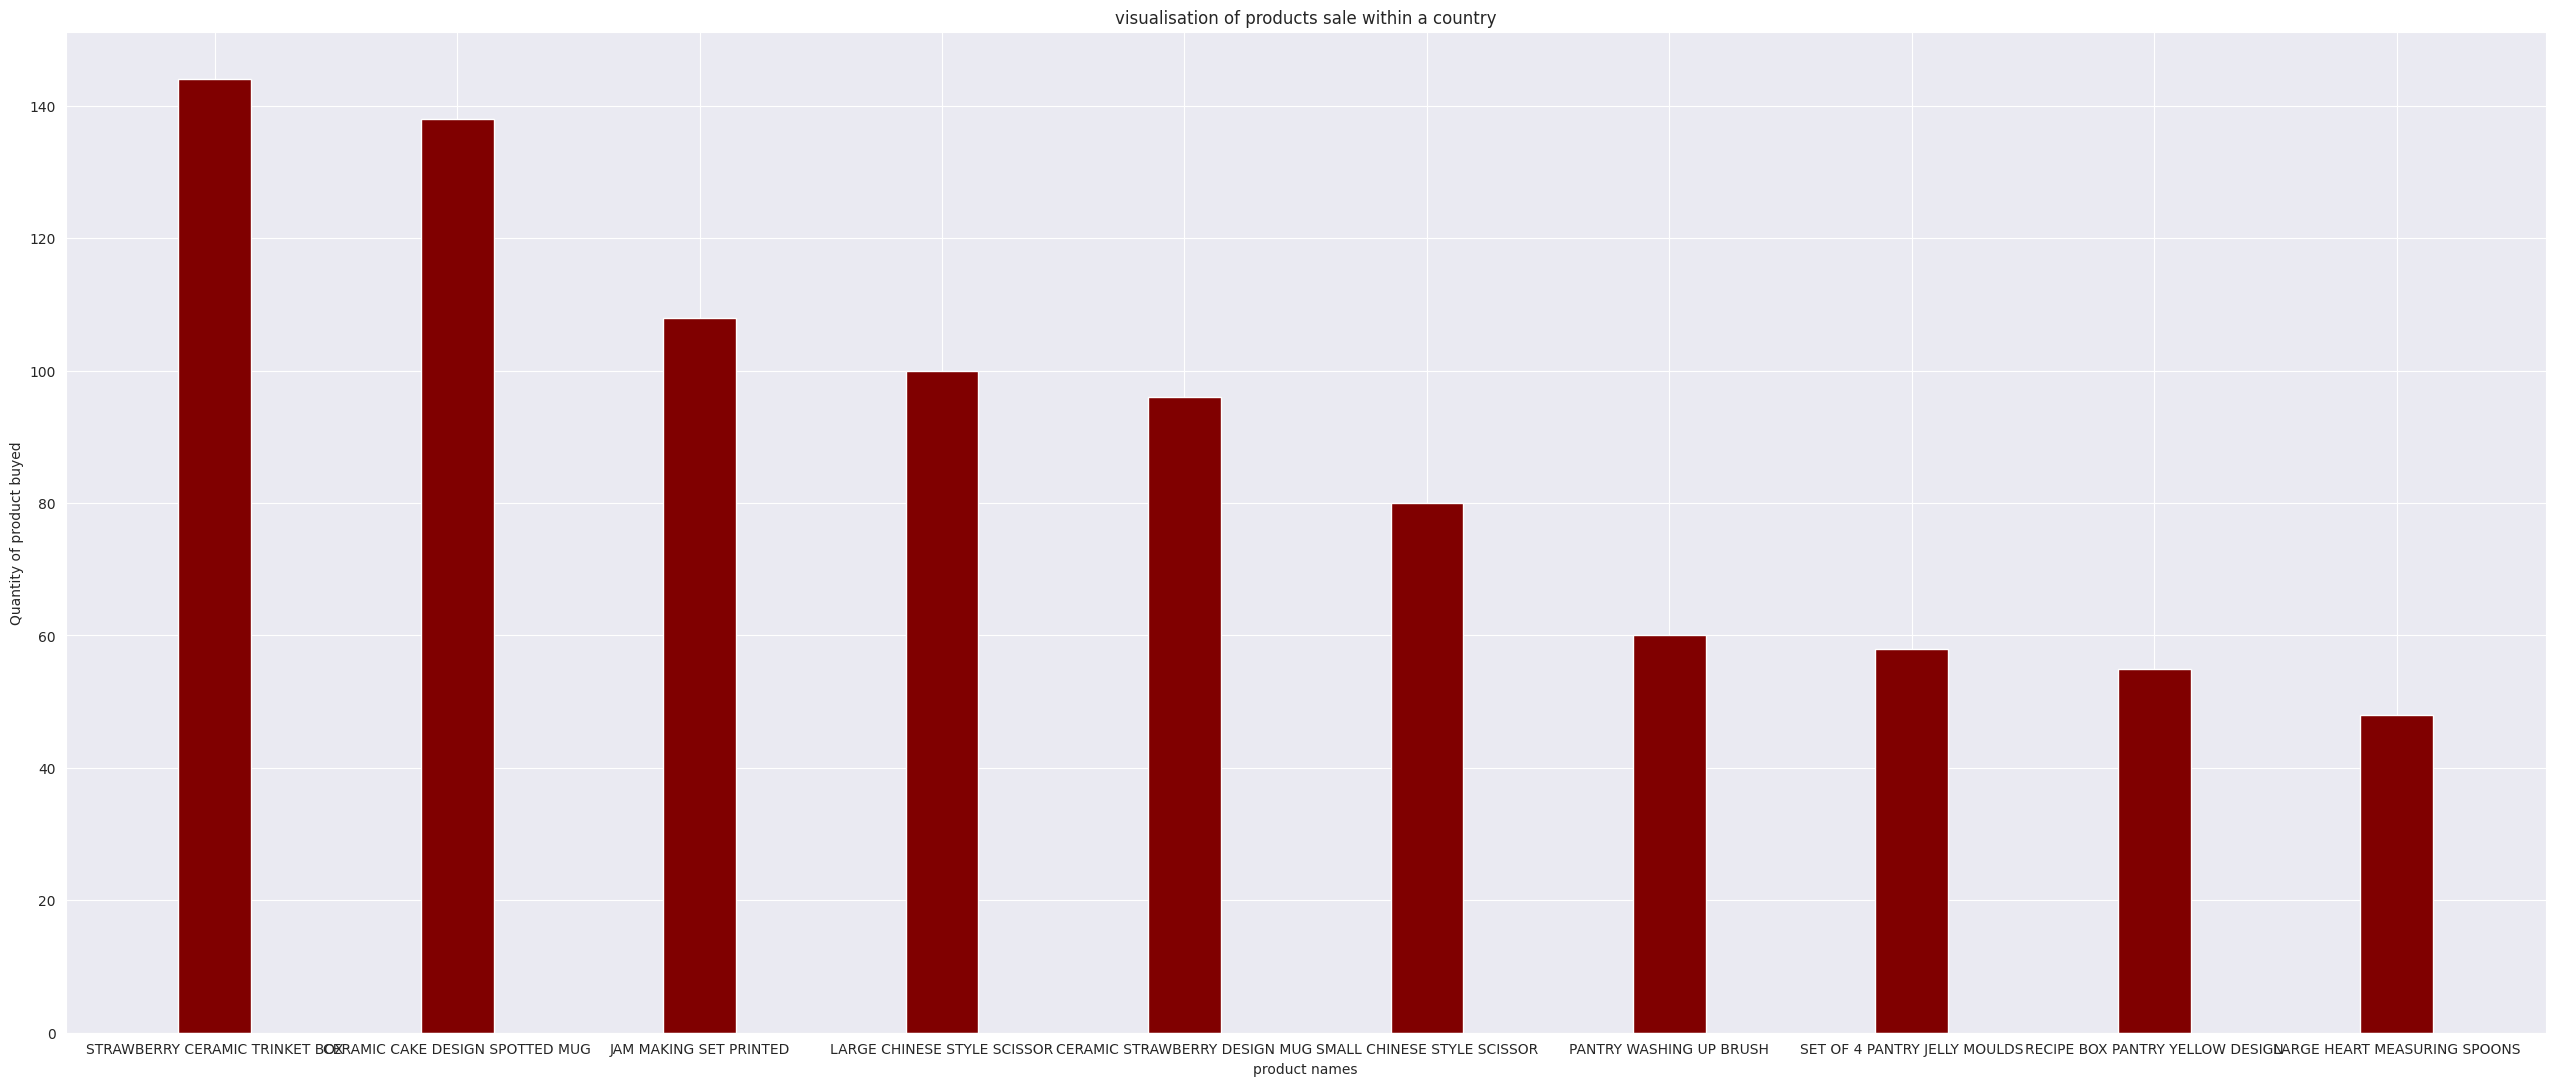

For  Portugal


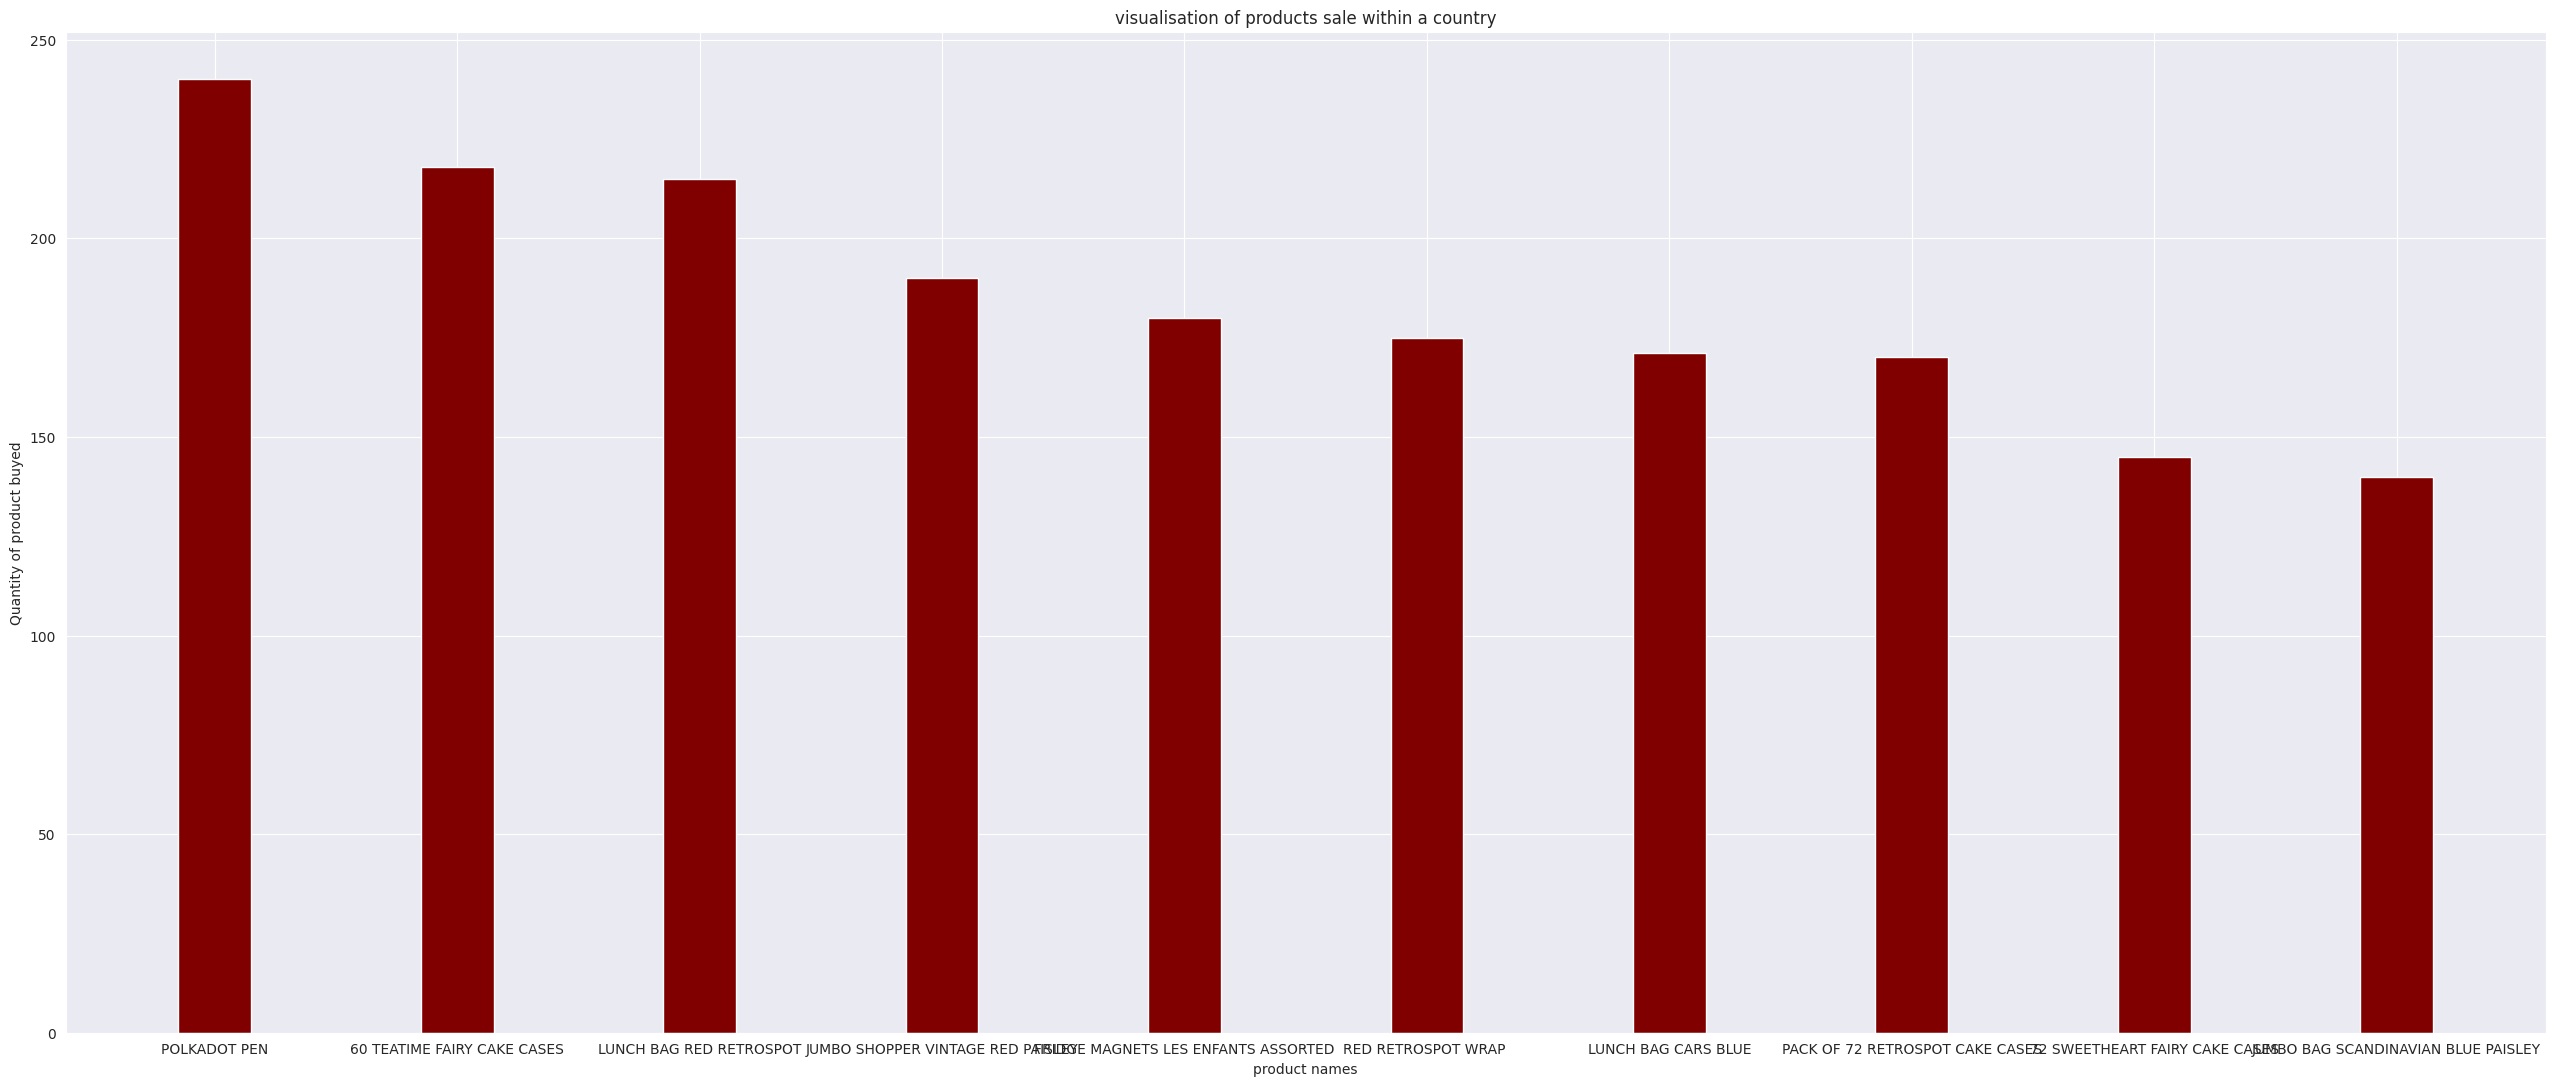

For  Italy


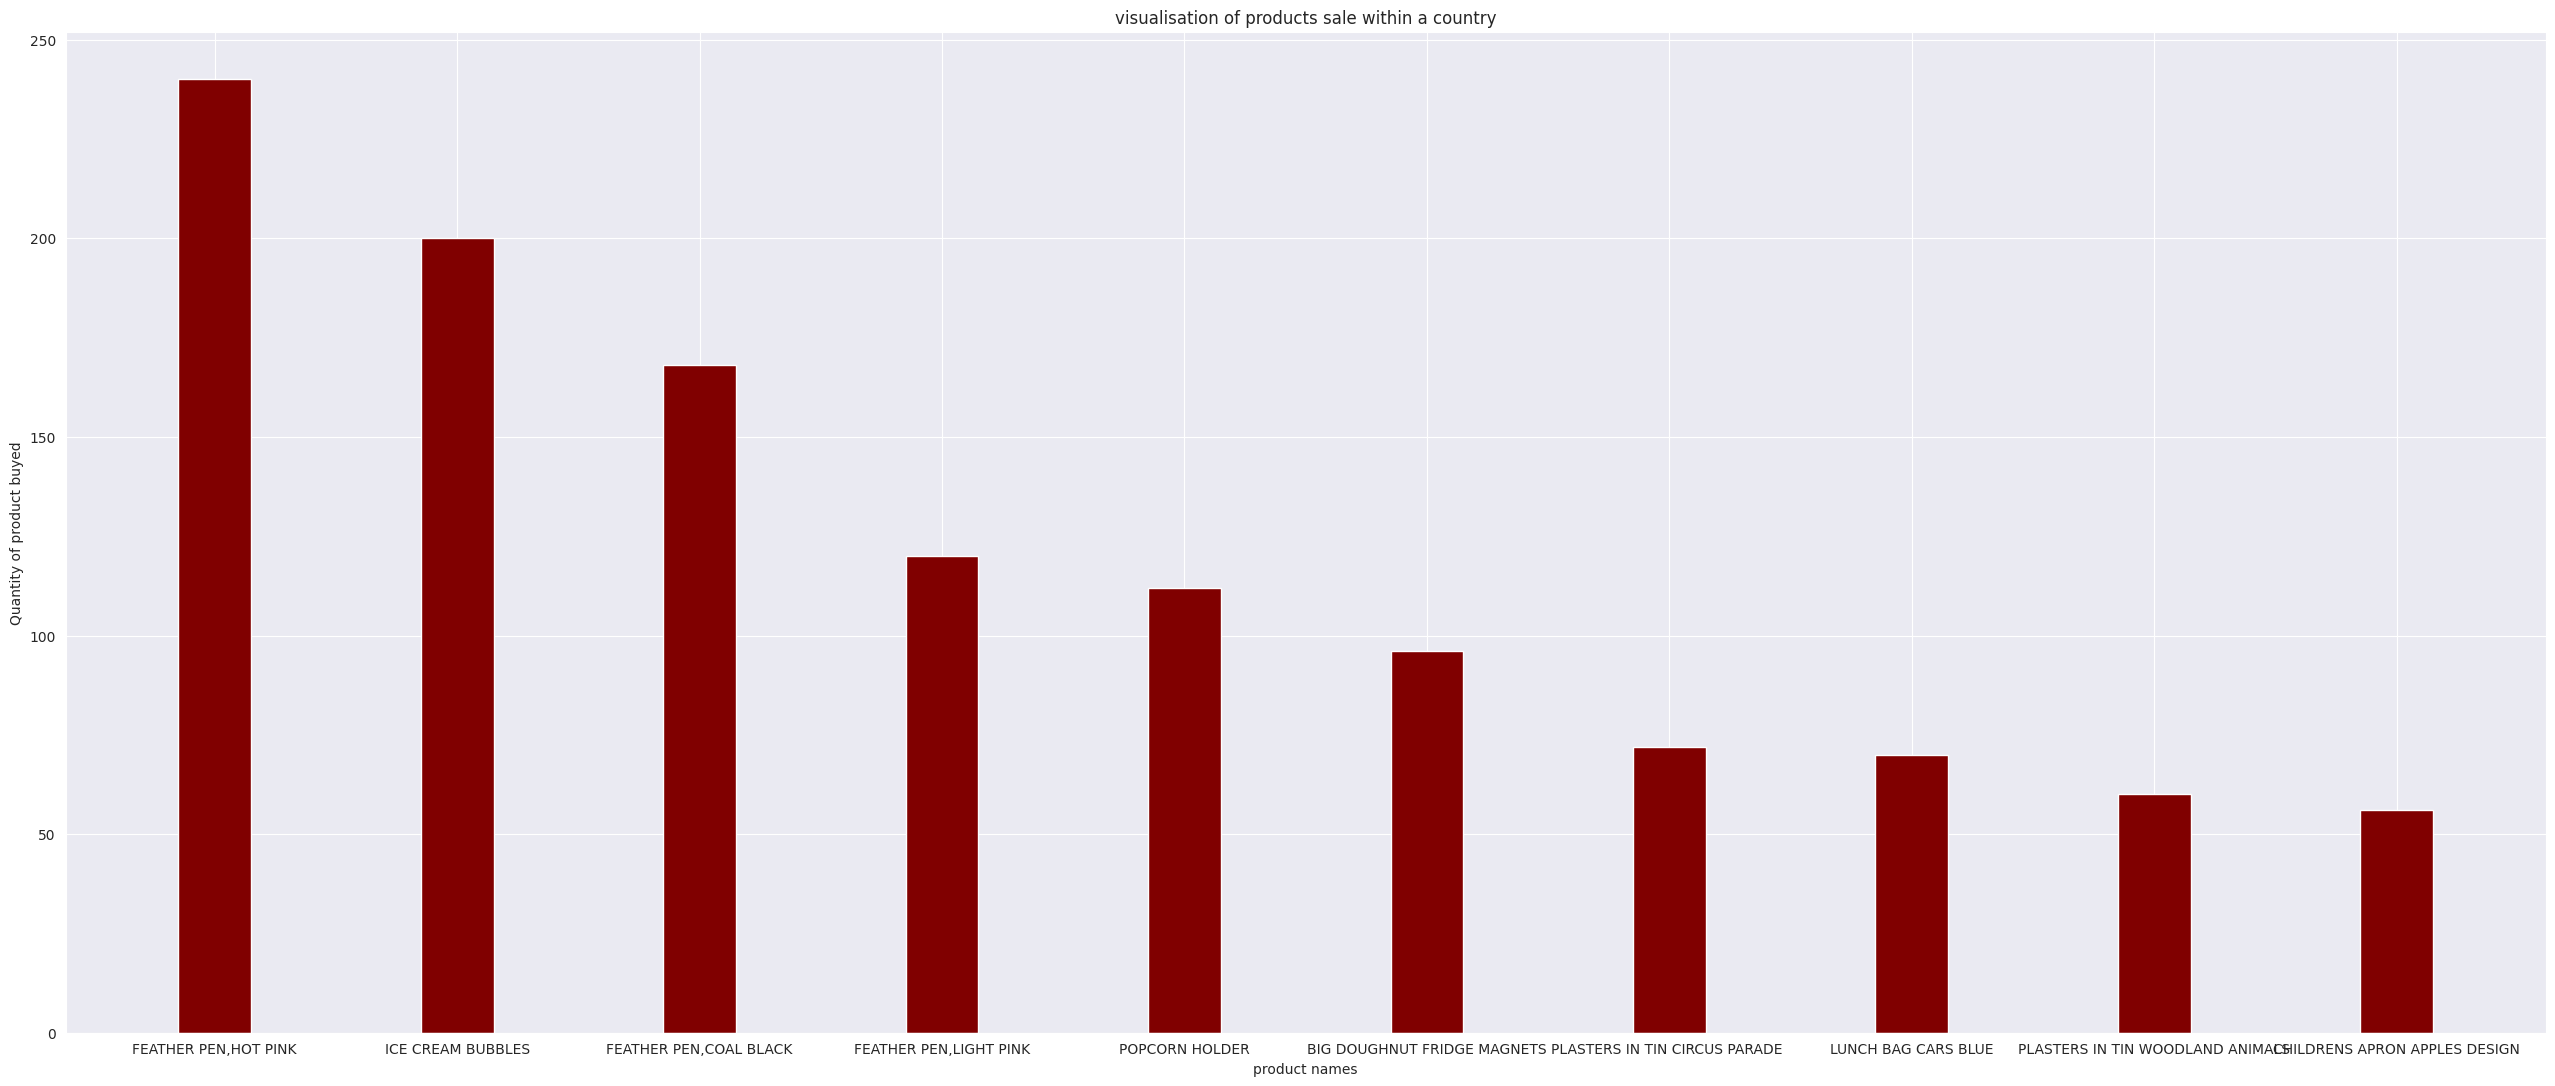

For  Belgium


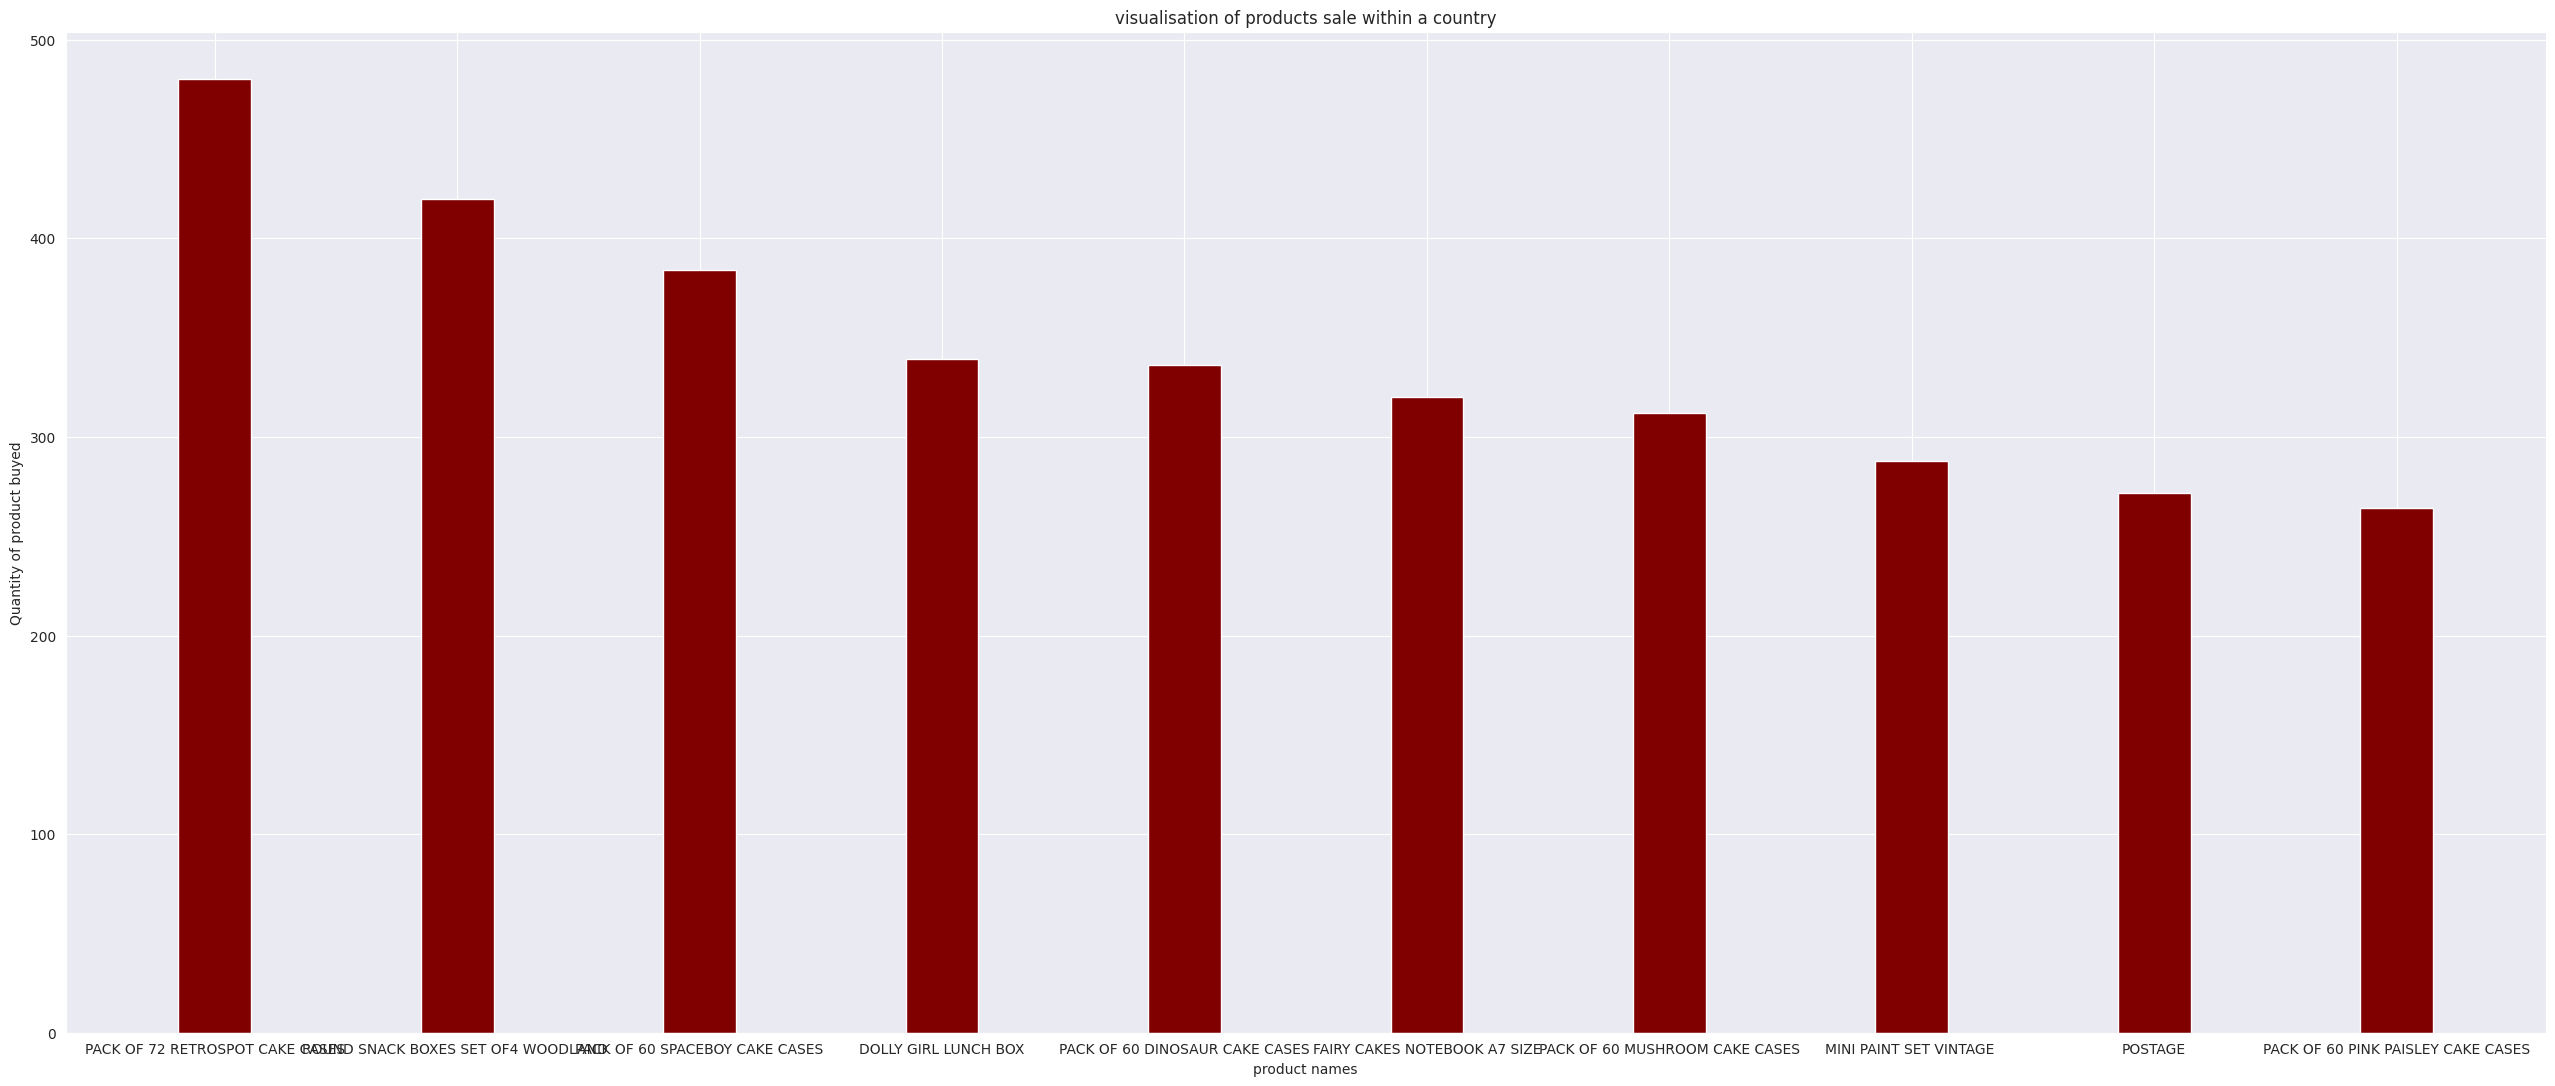

For  Lithuania


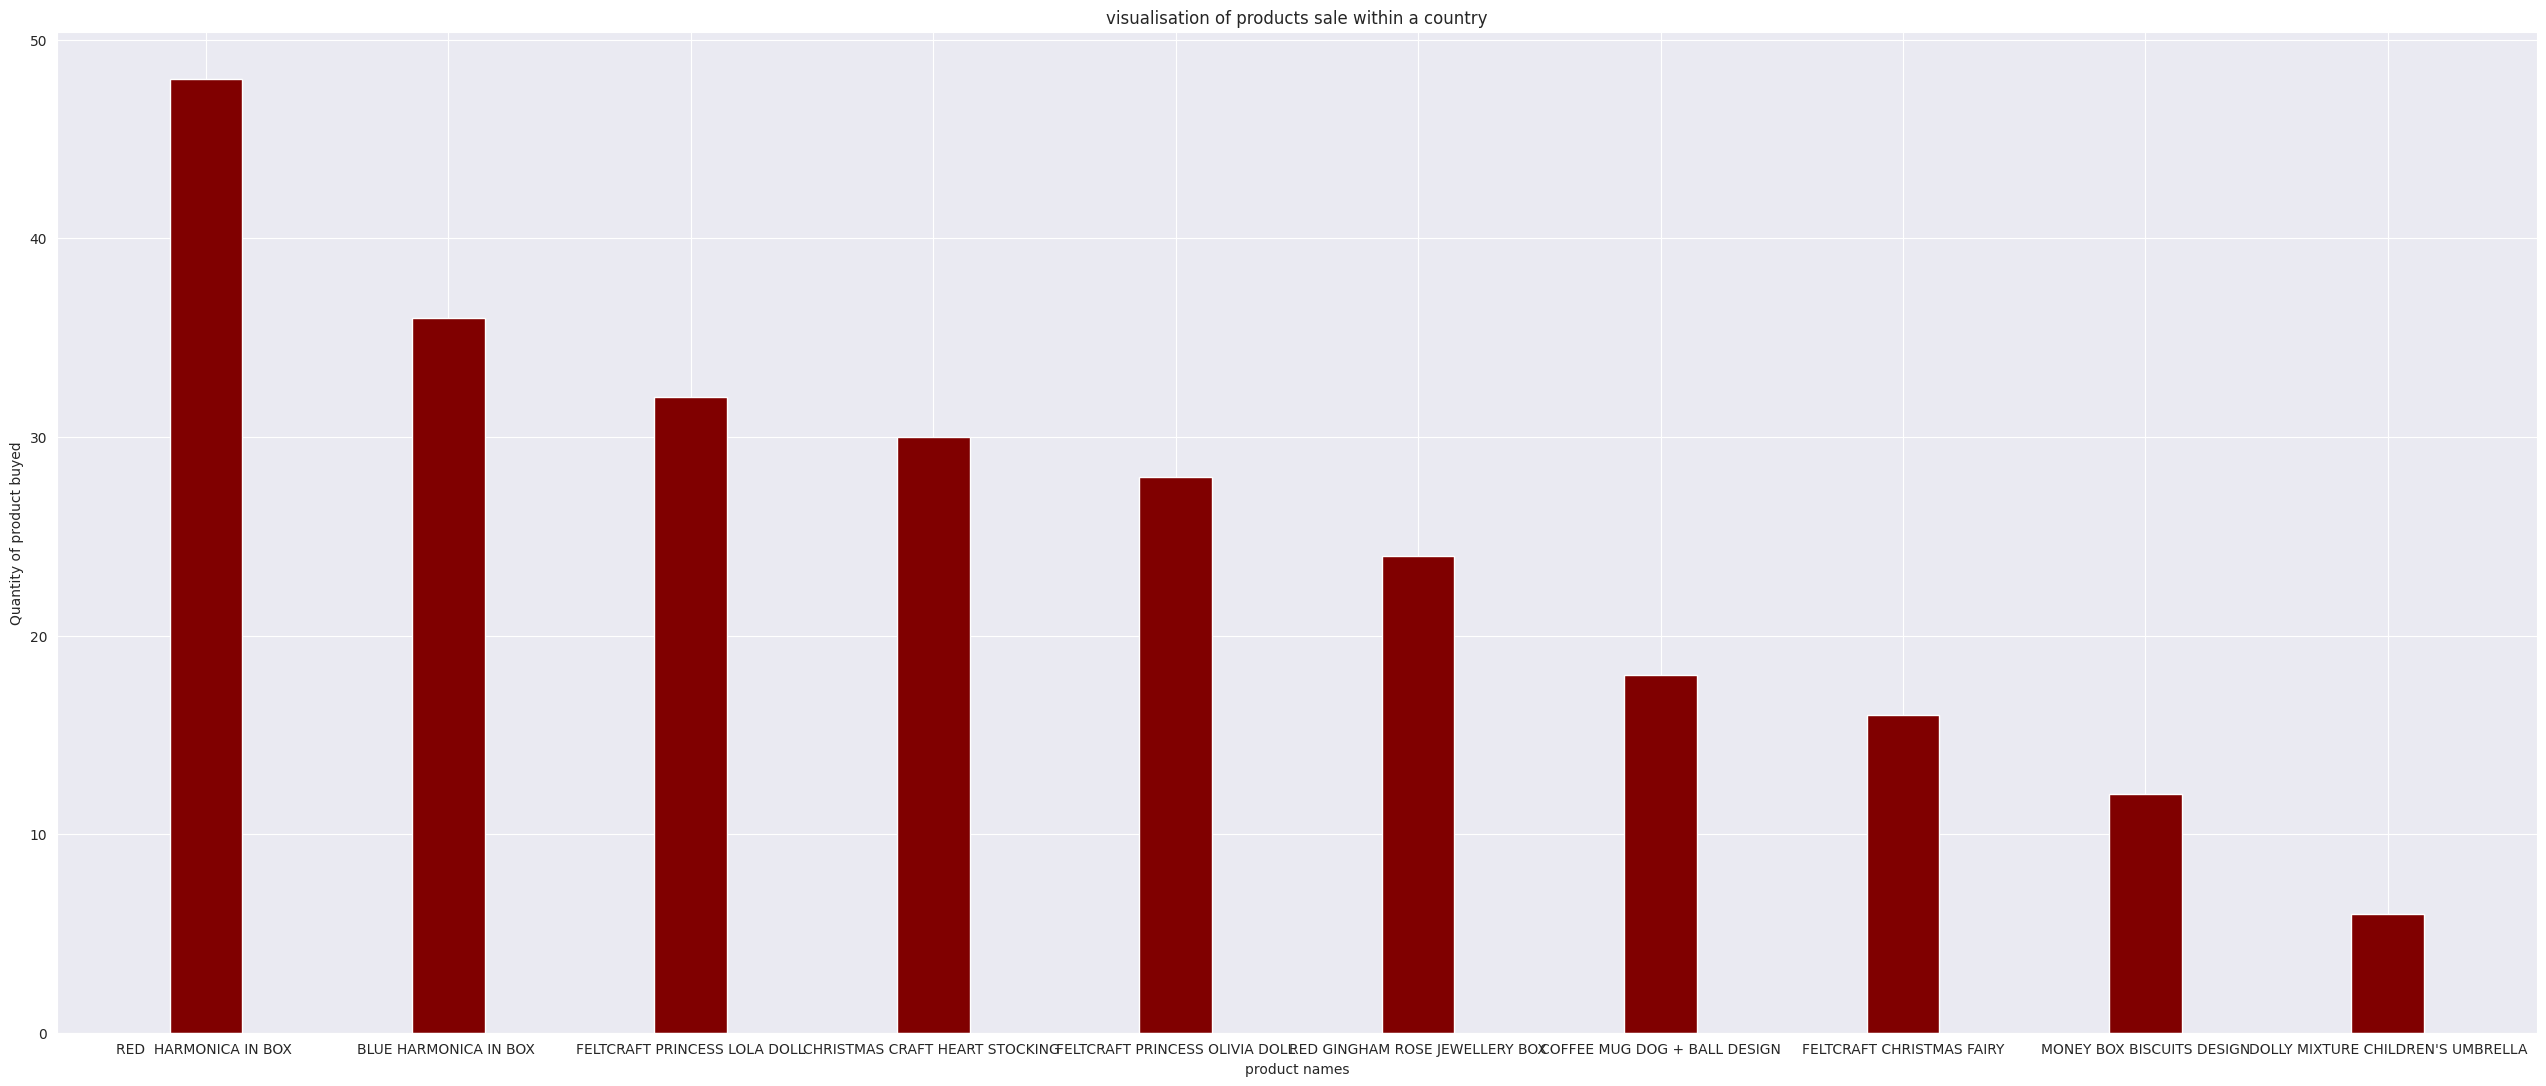

For  Japan


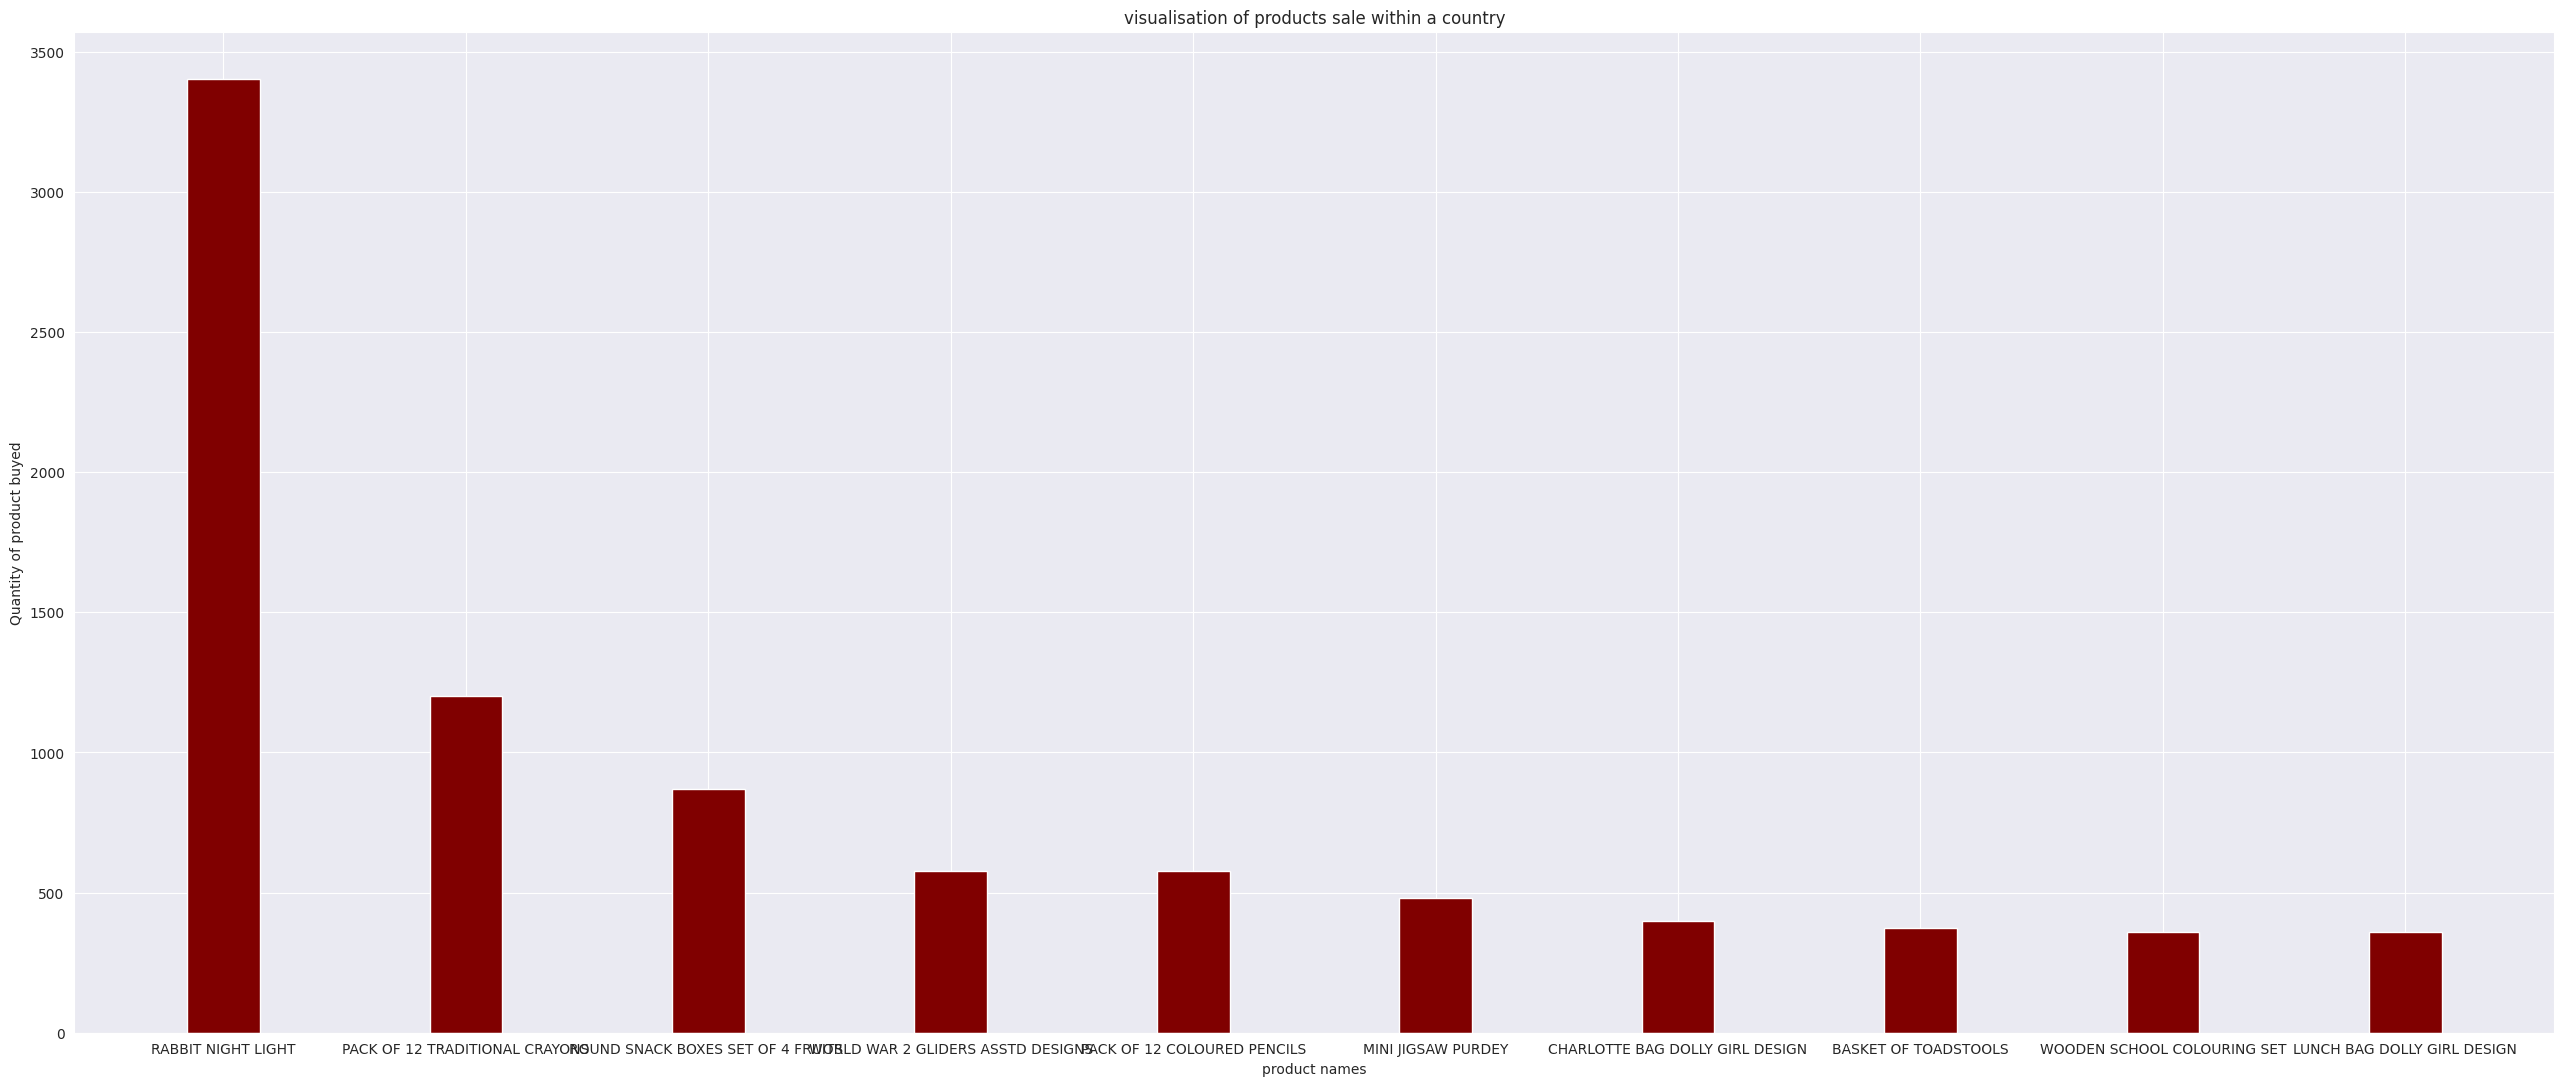

For  Iceland


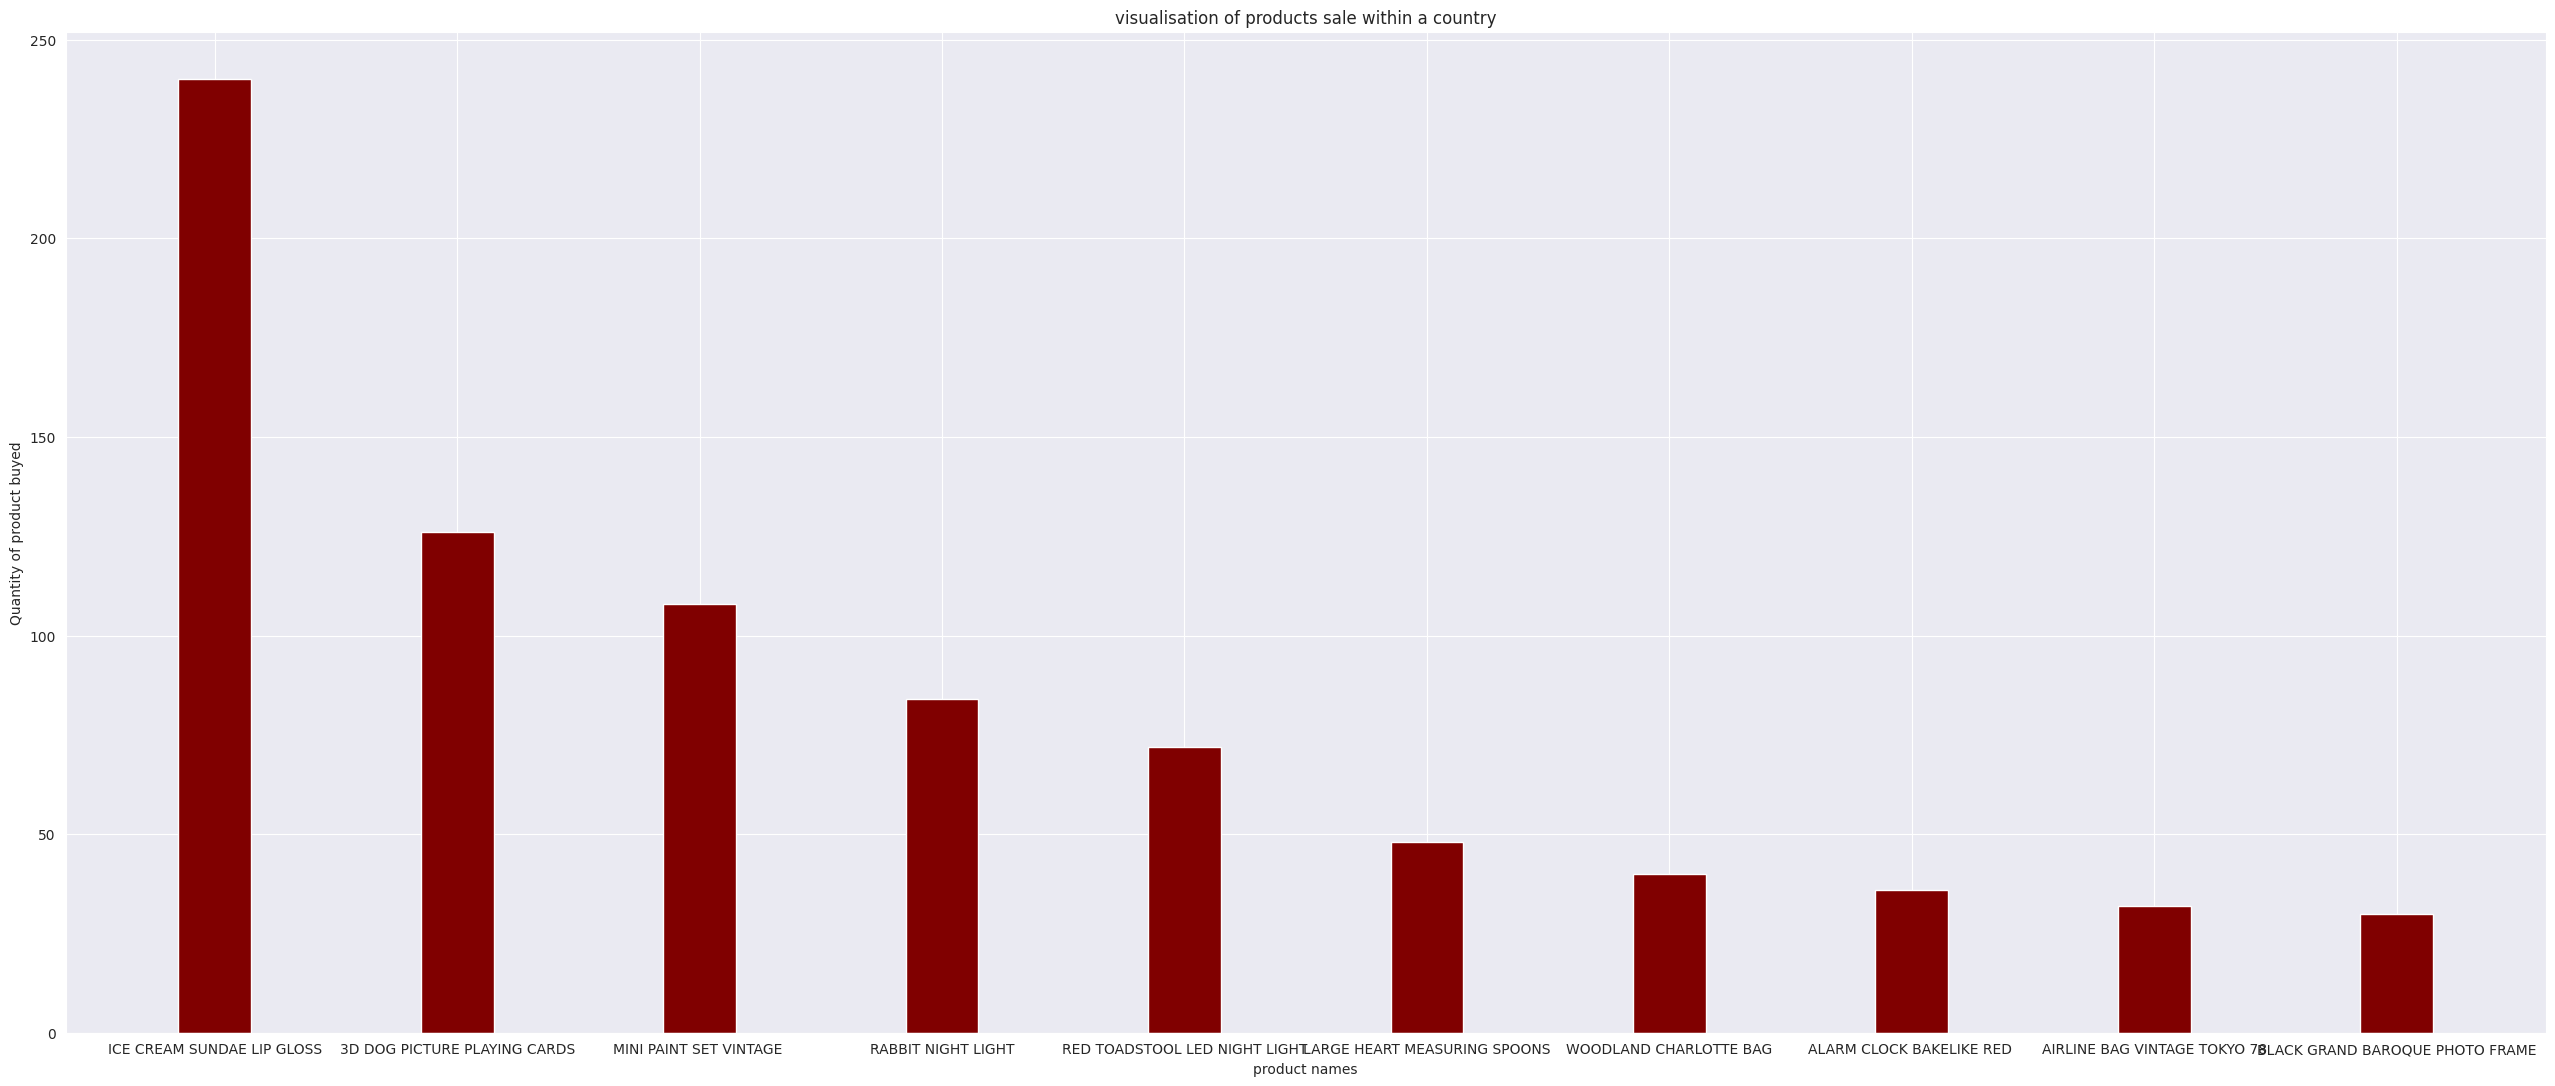

For  Channel Islands


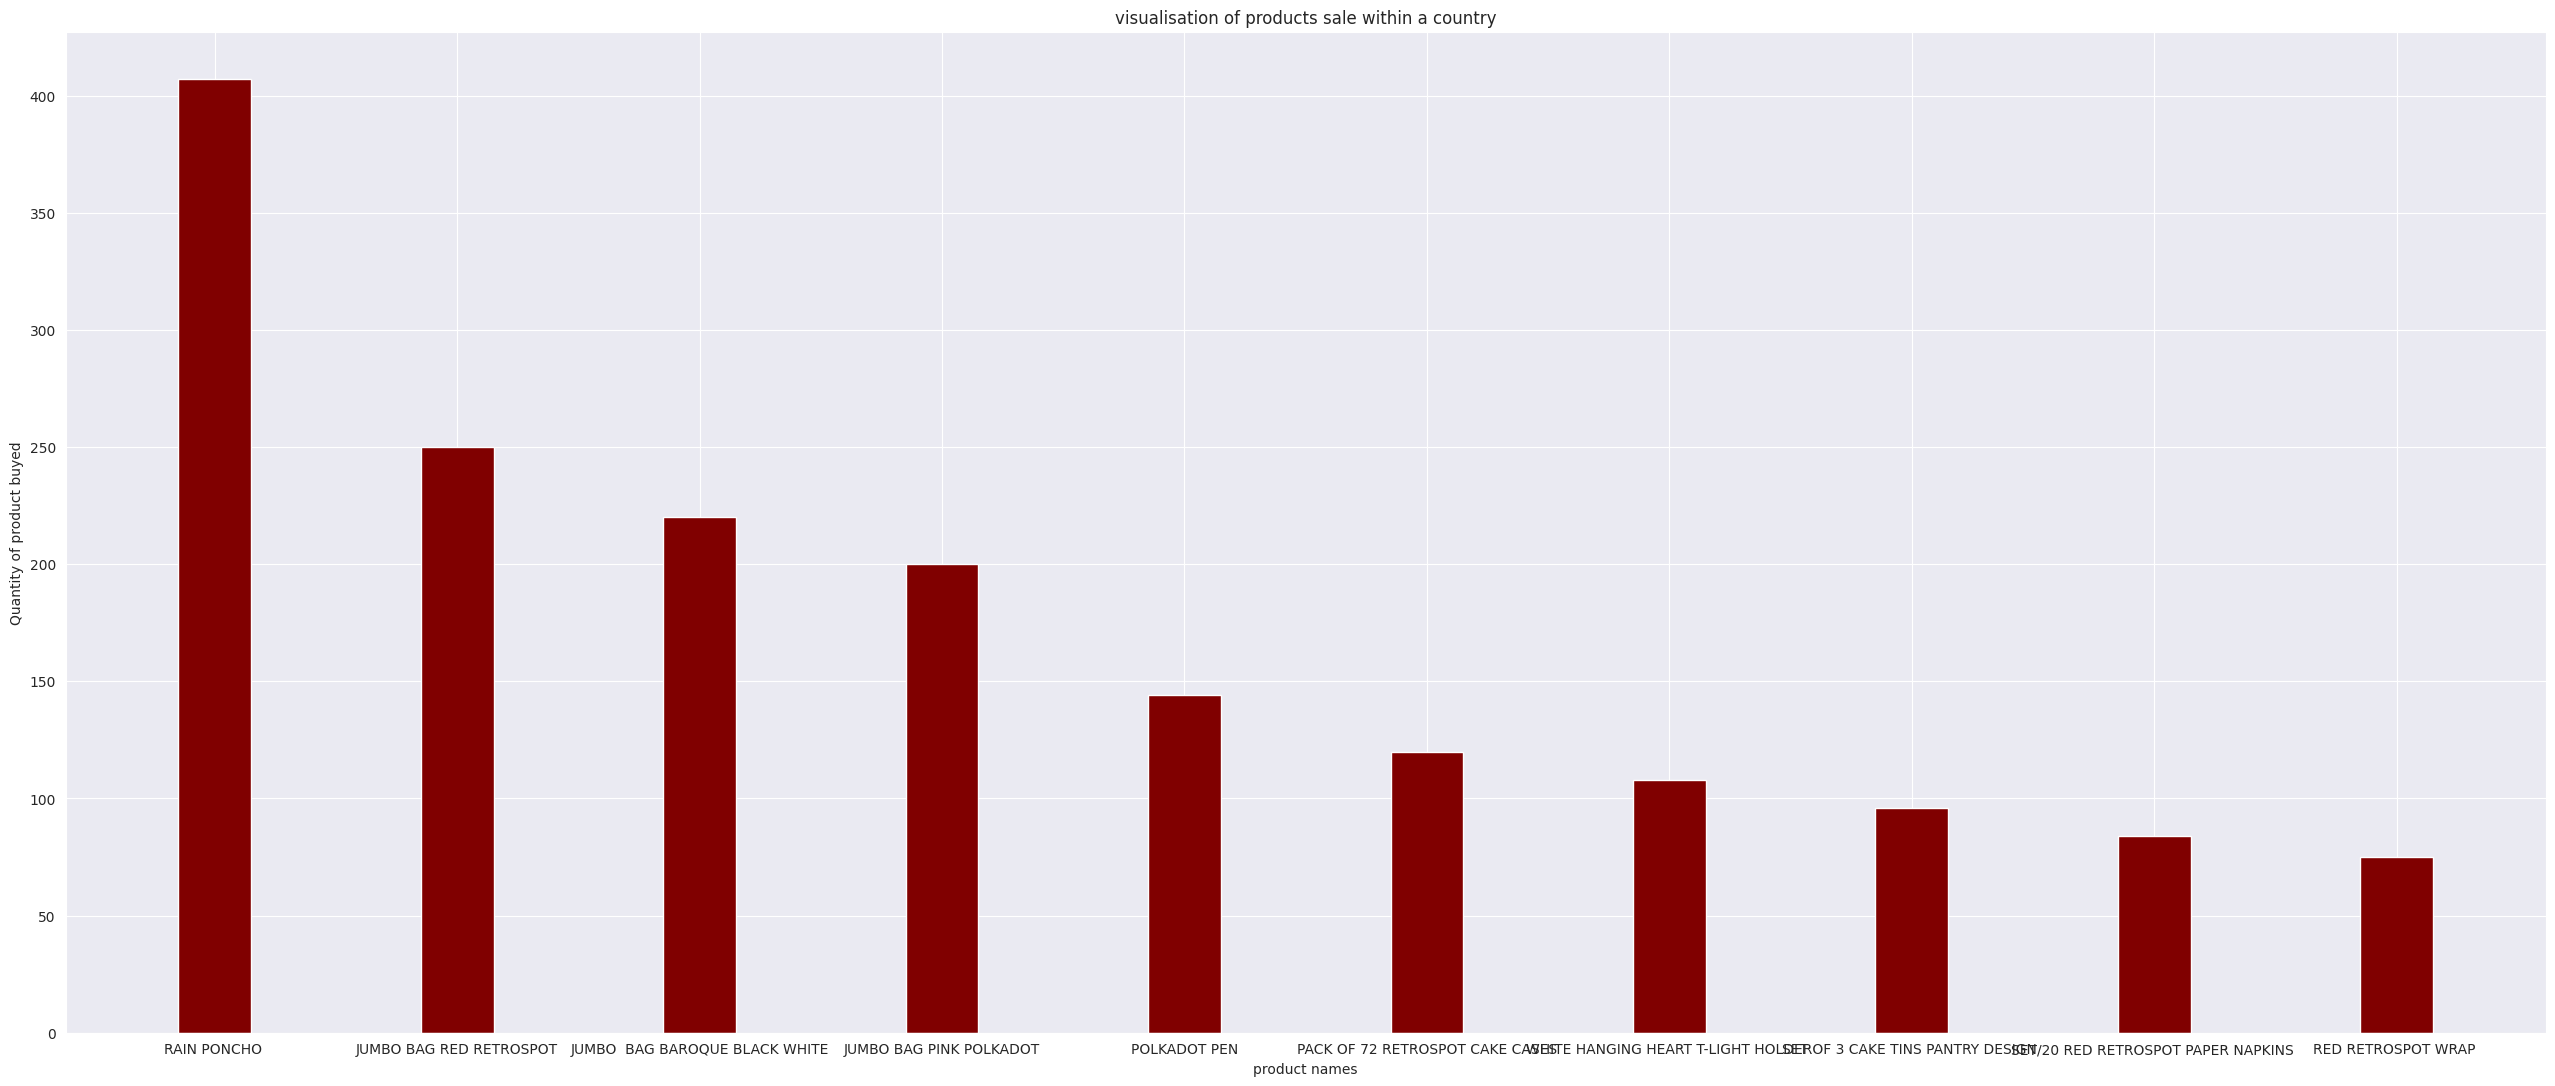

For  Denmark


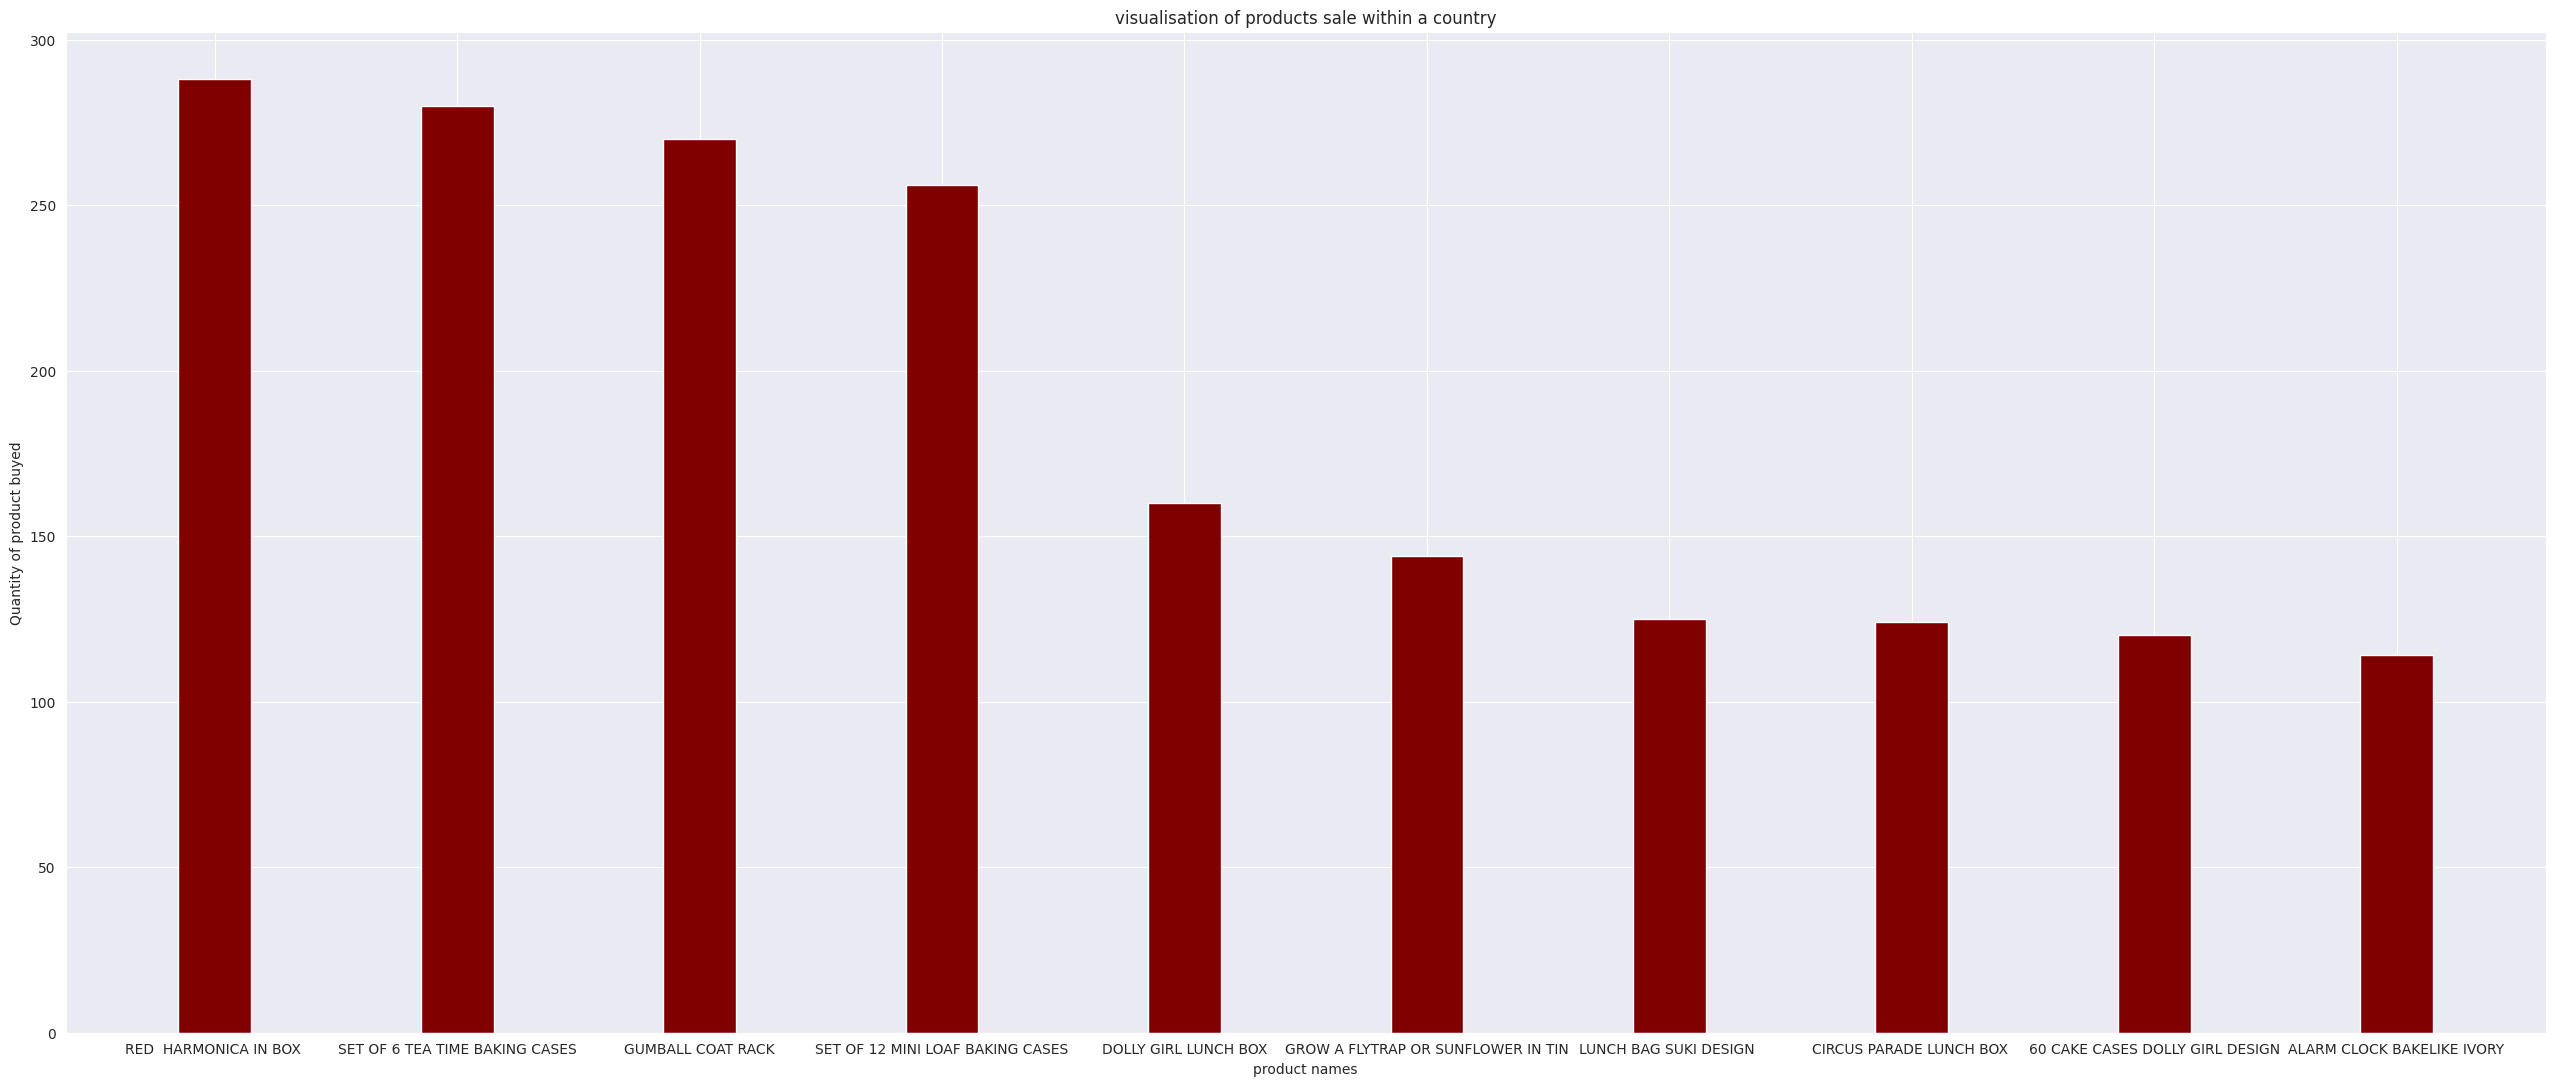

For  Cyprus


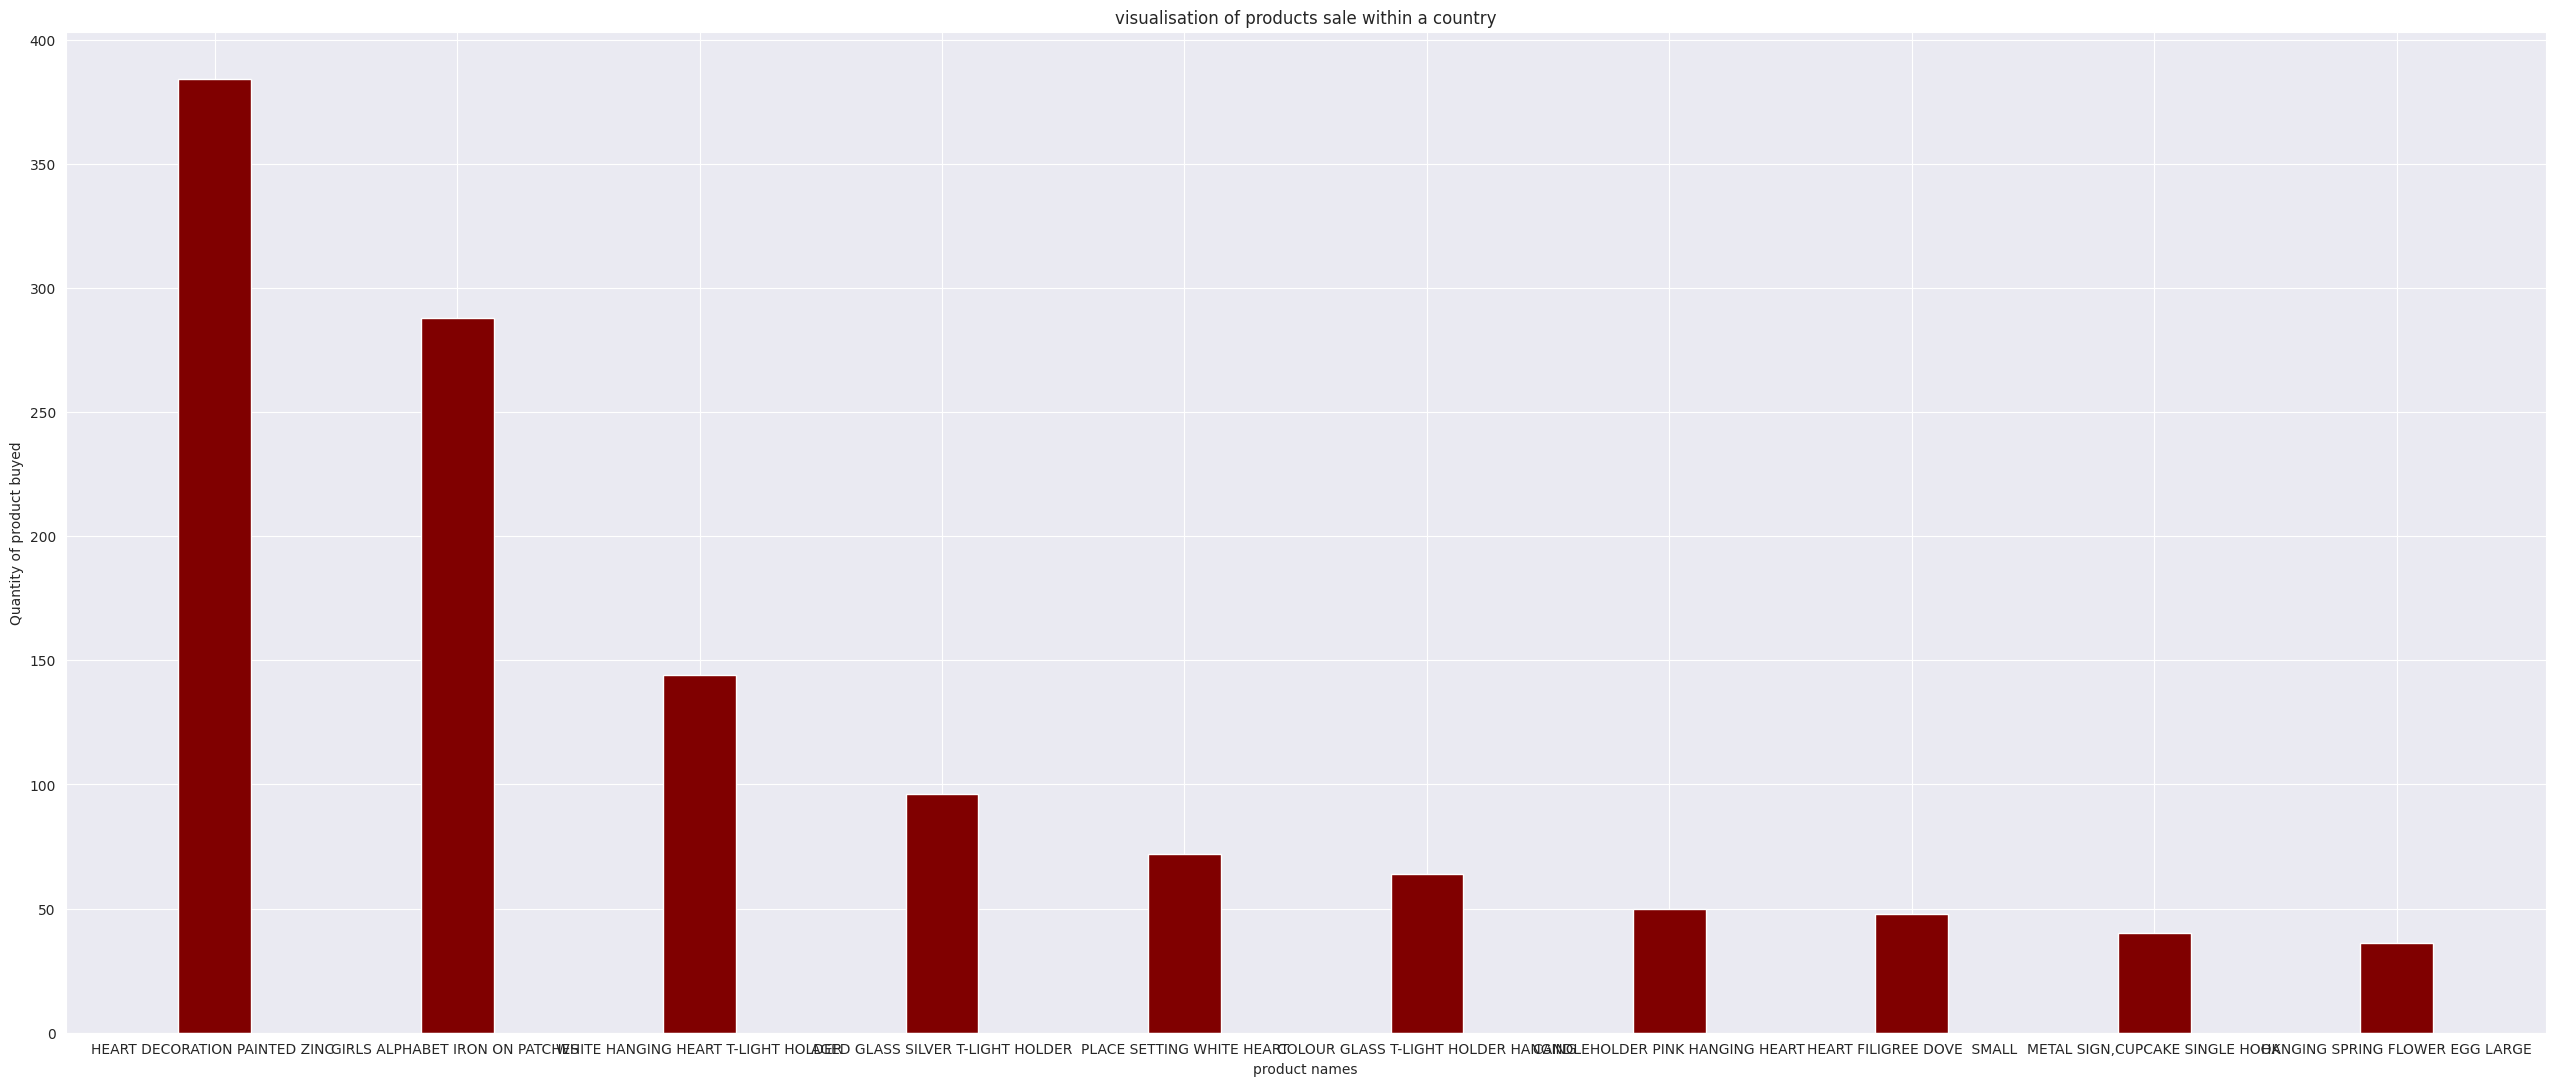

For  Sweden


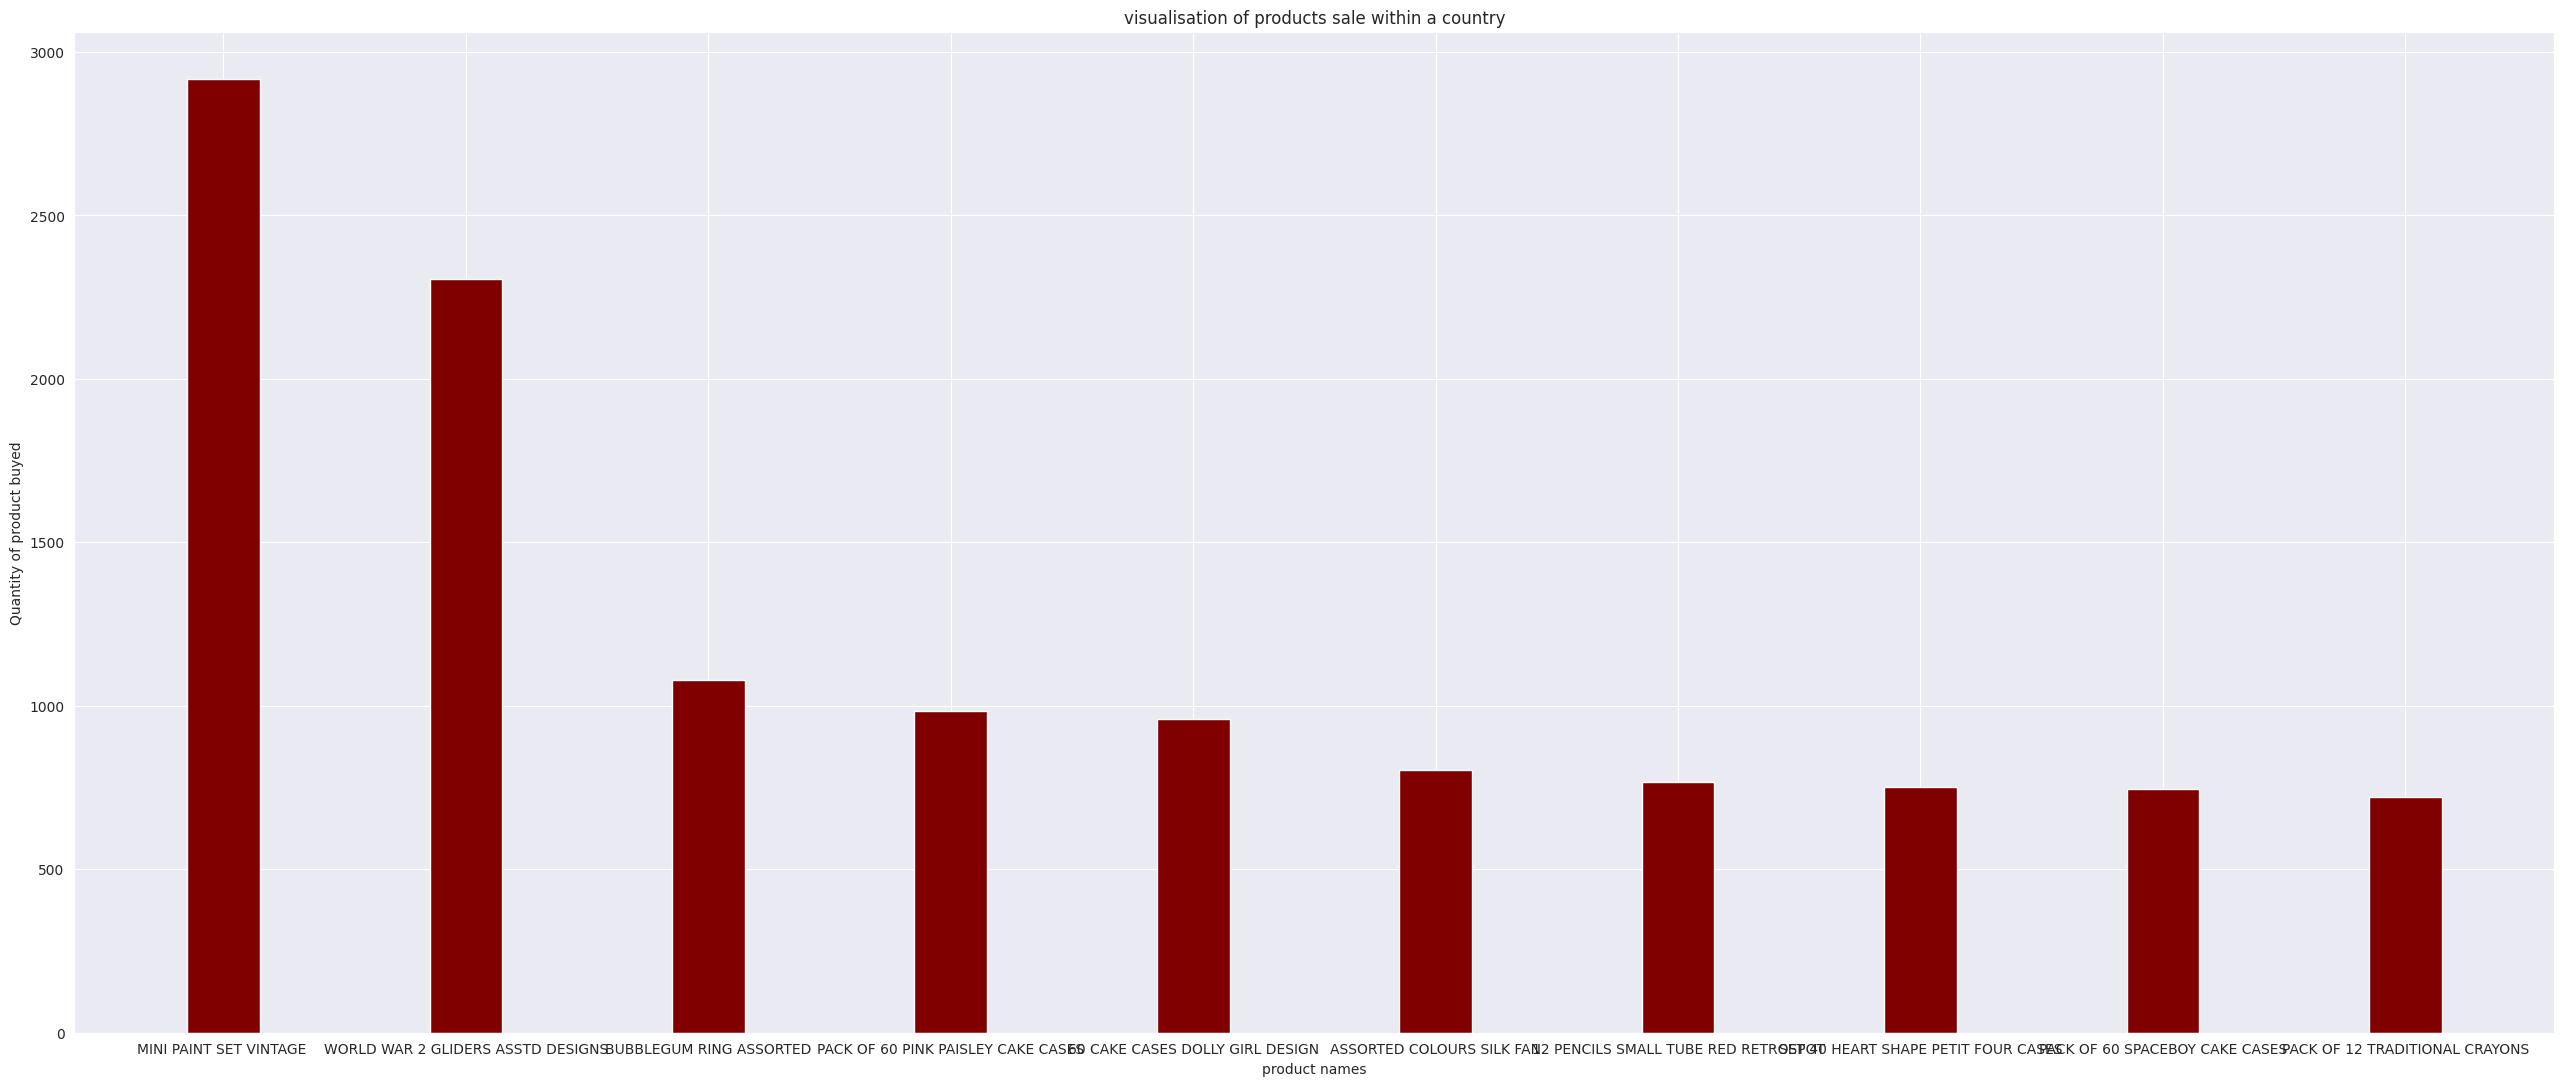

For  Austria


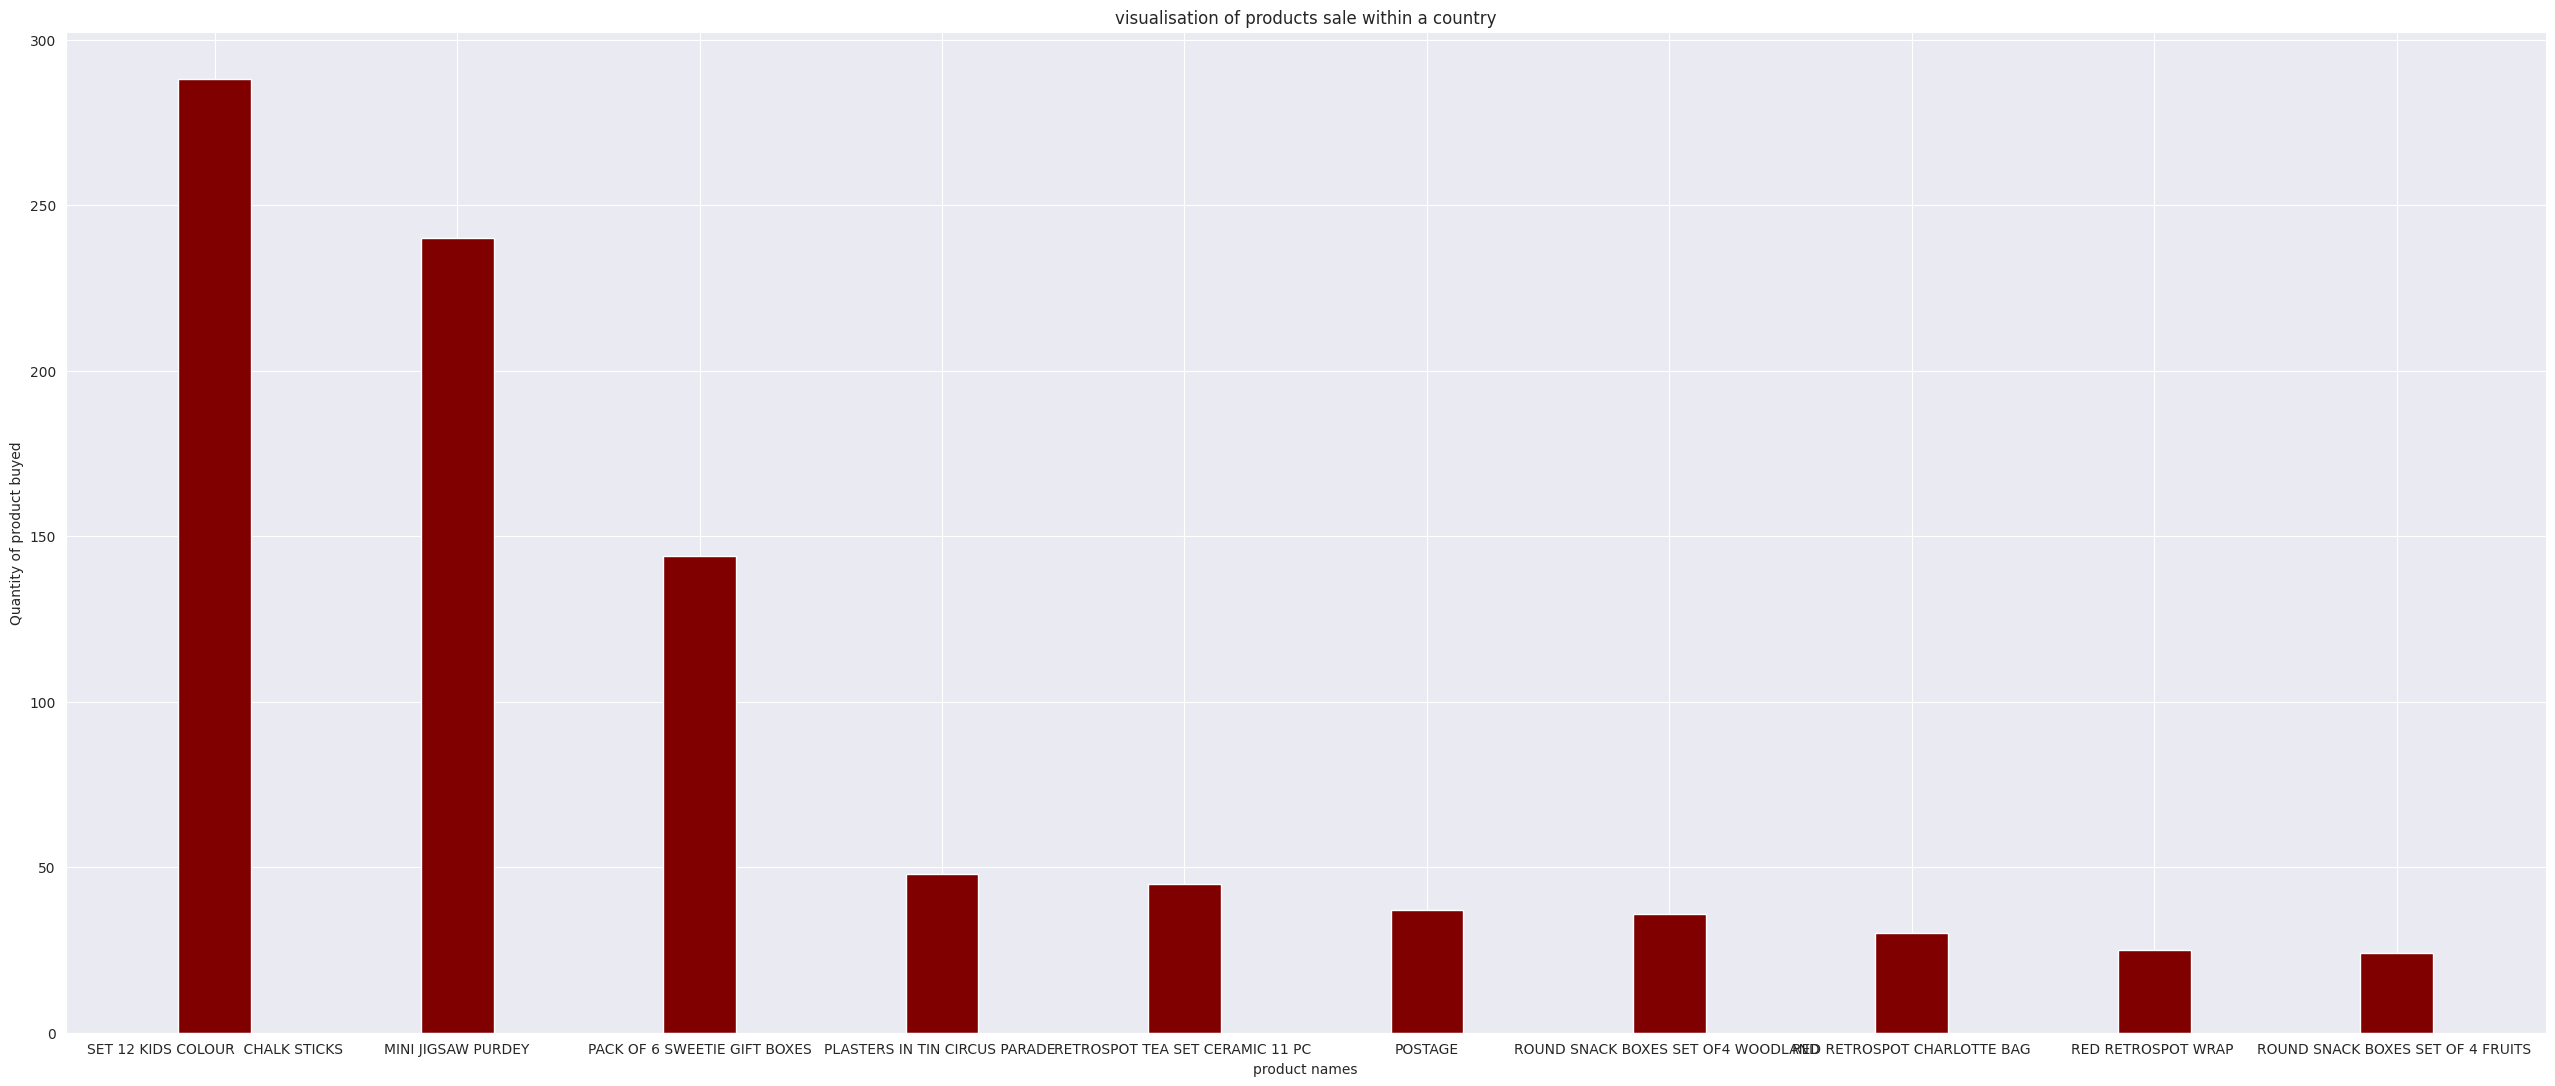

For  Israel


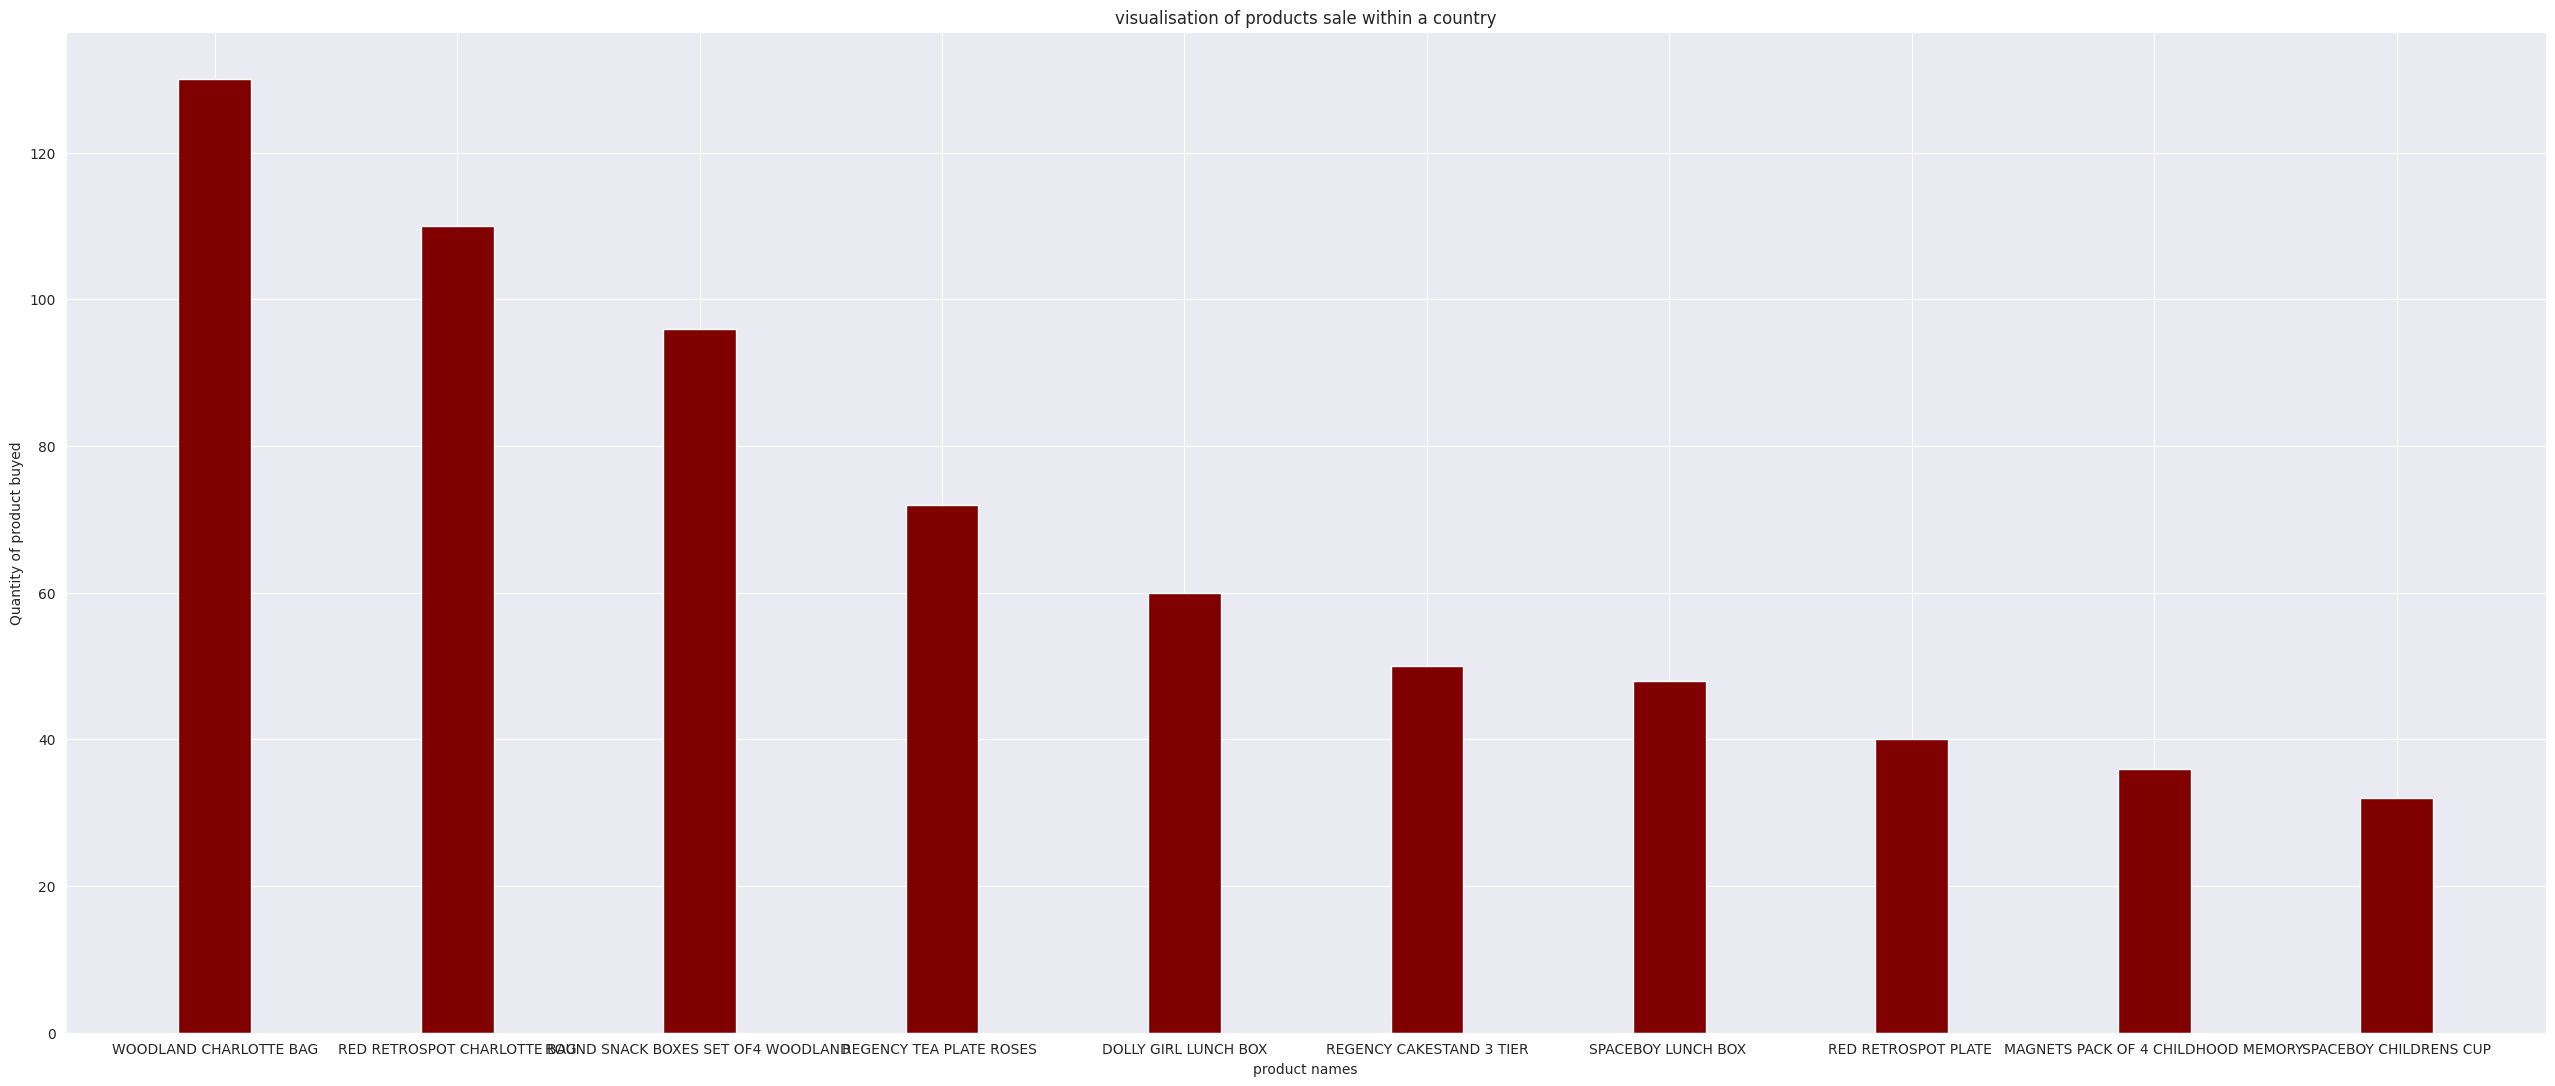

For  Finland


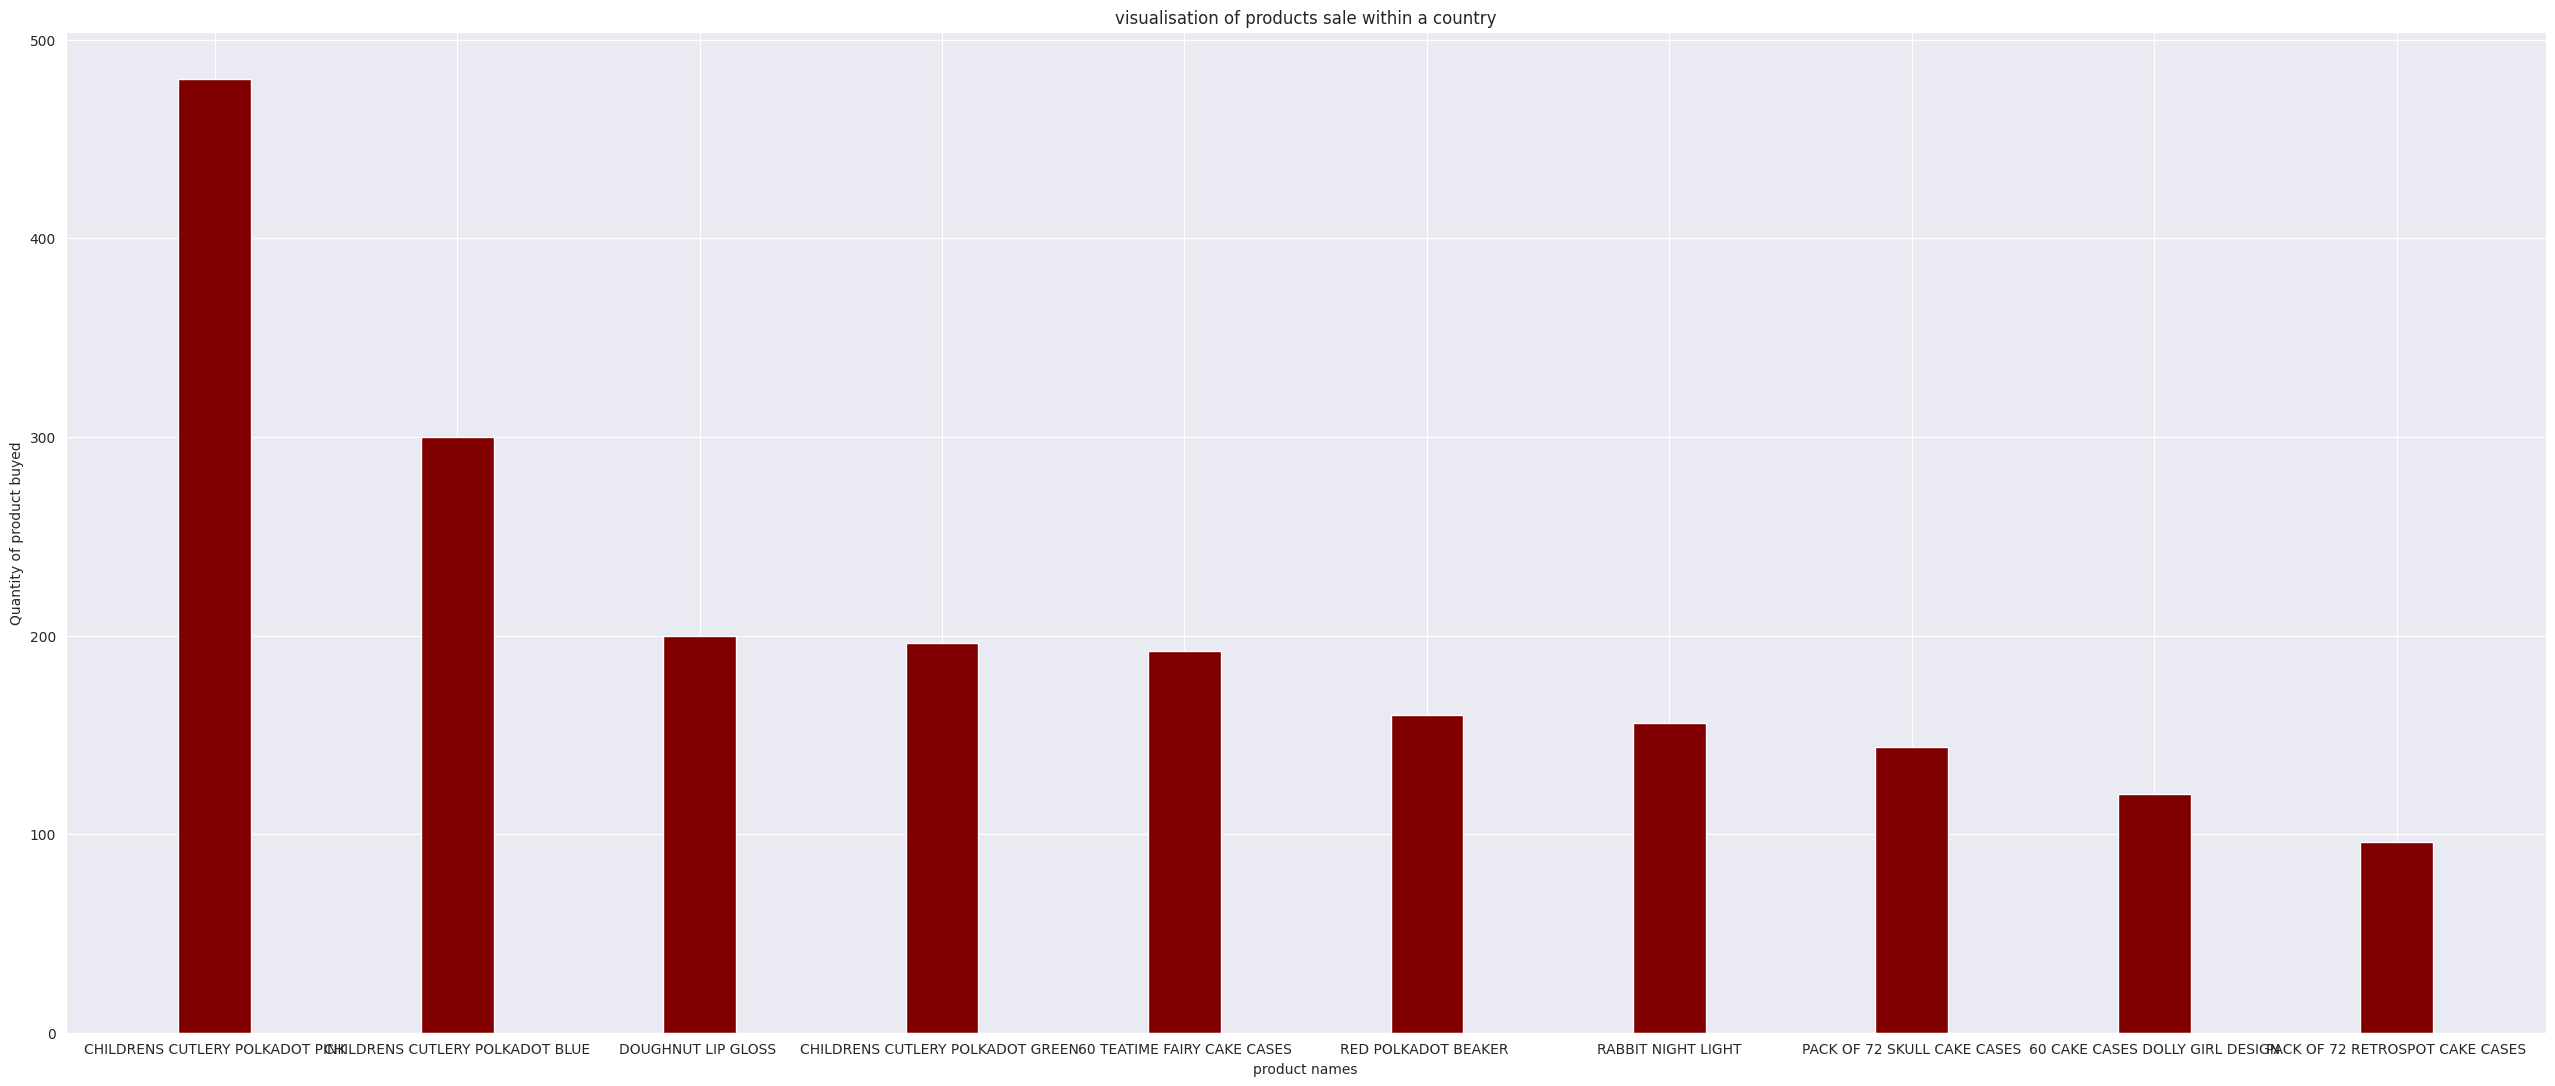

For  Bahrain


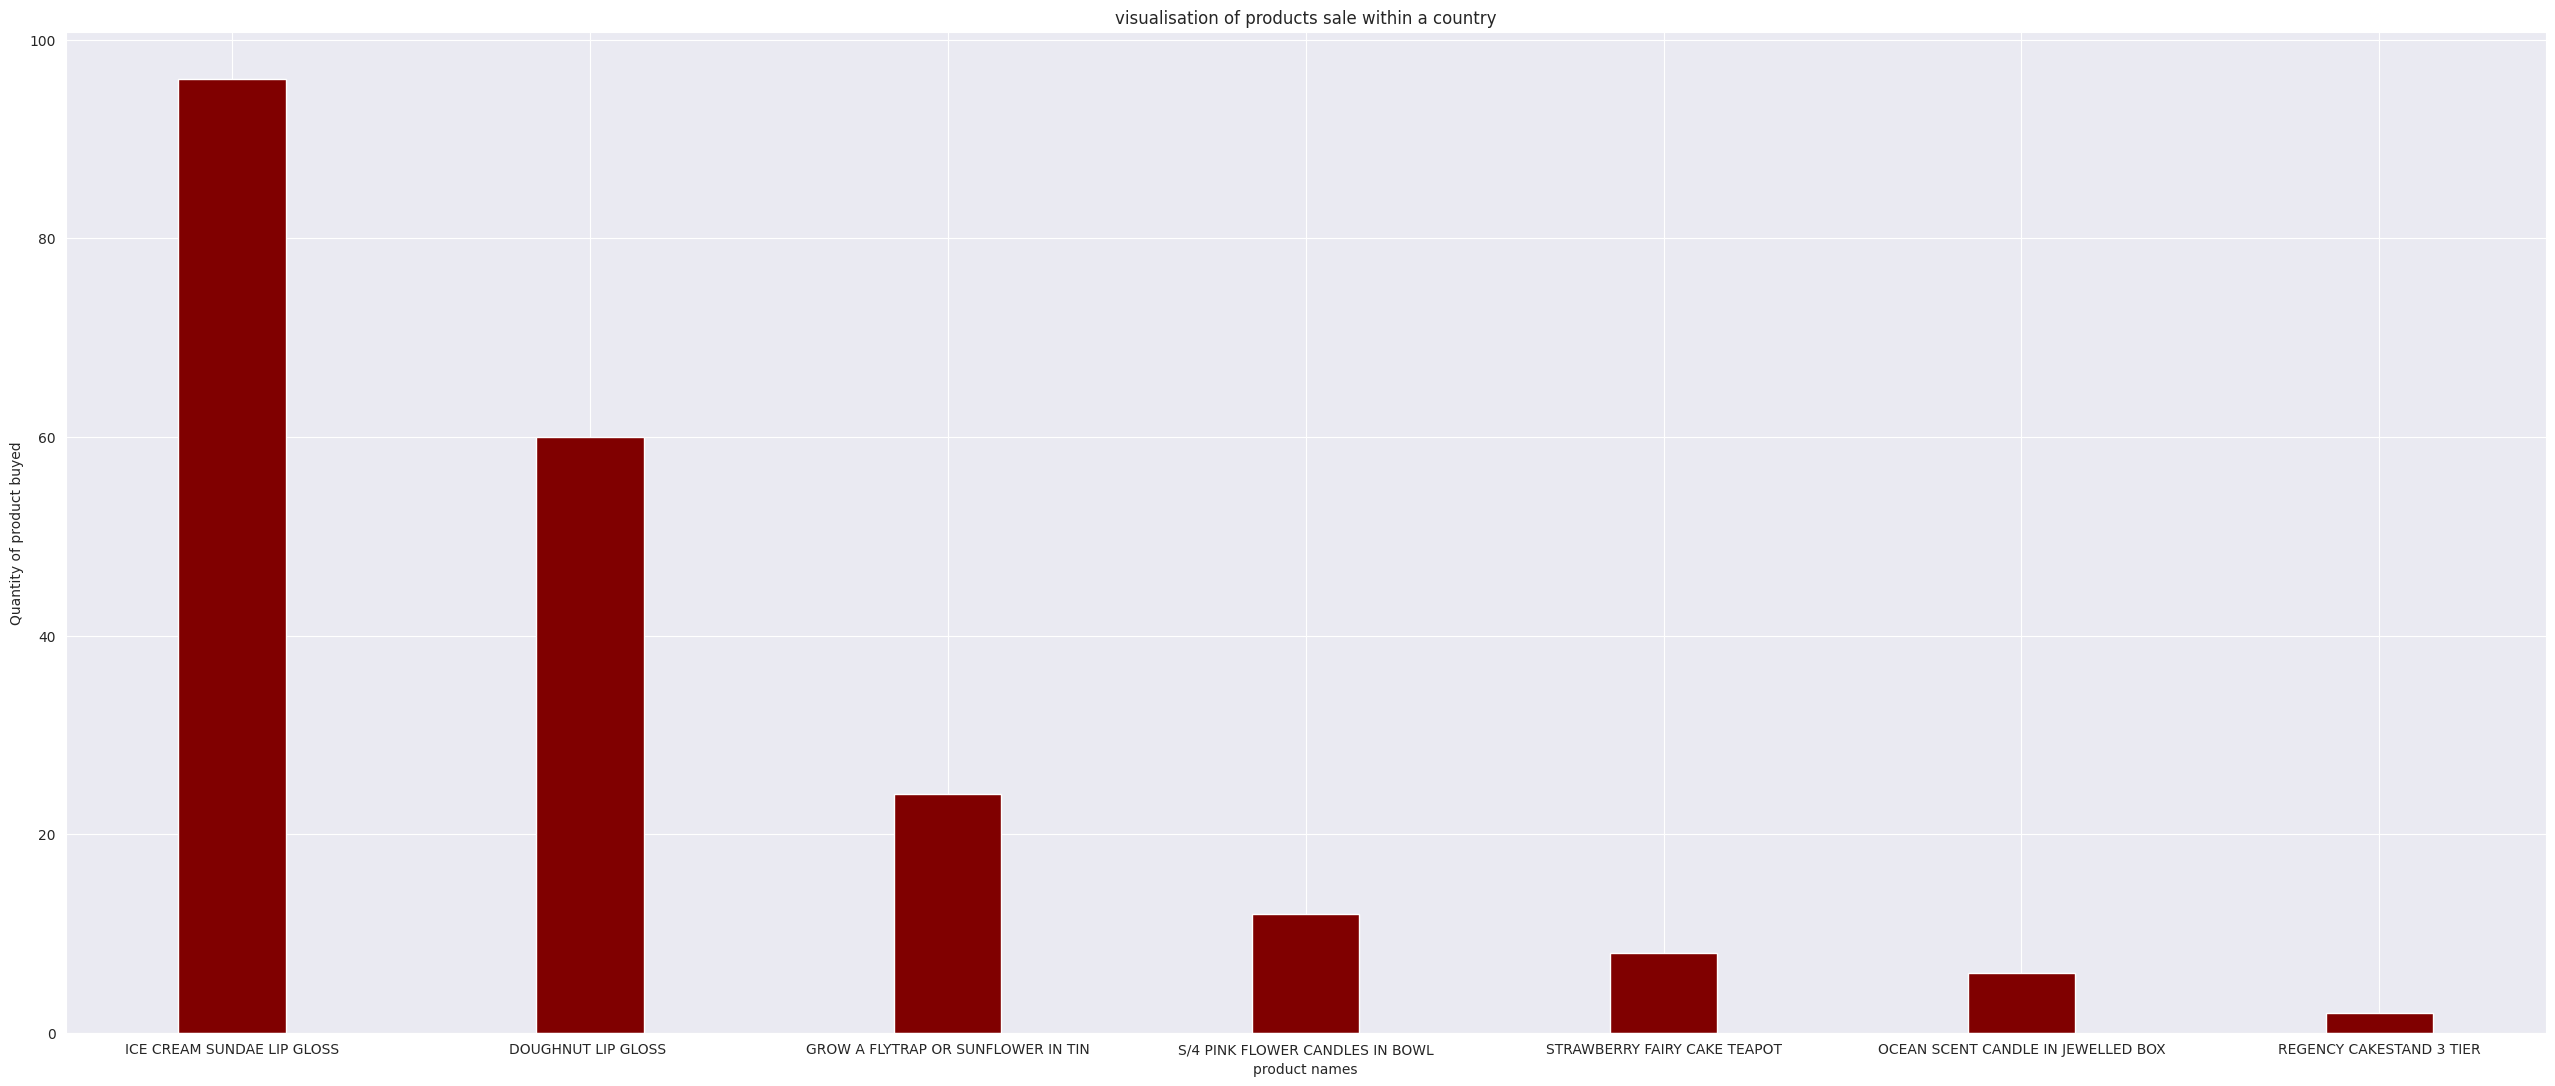

For  Greece


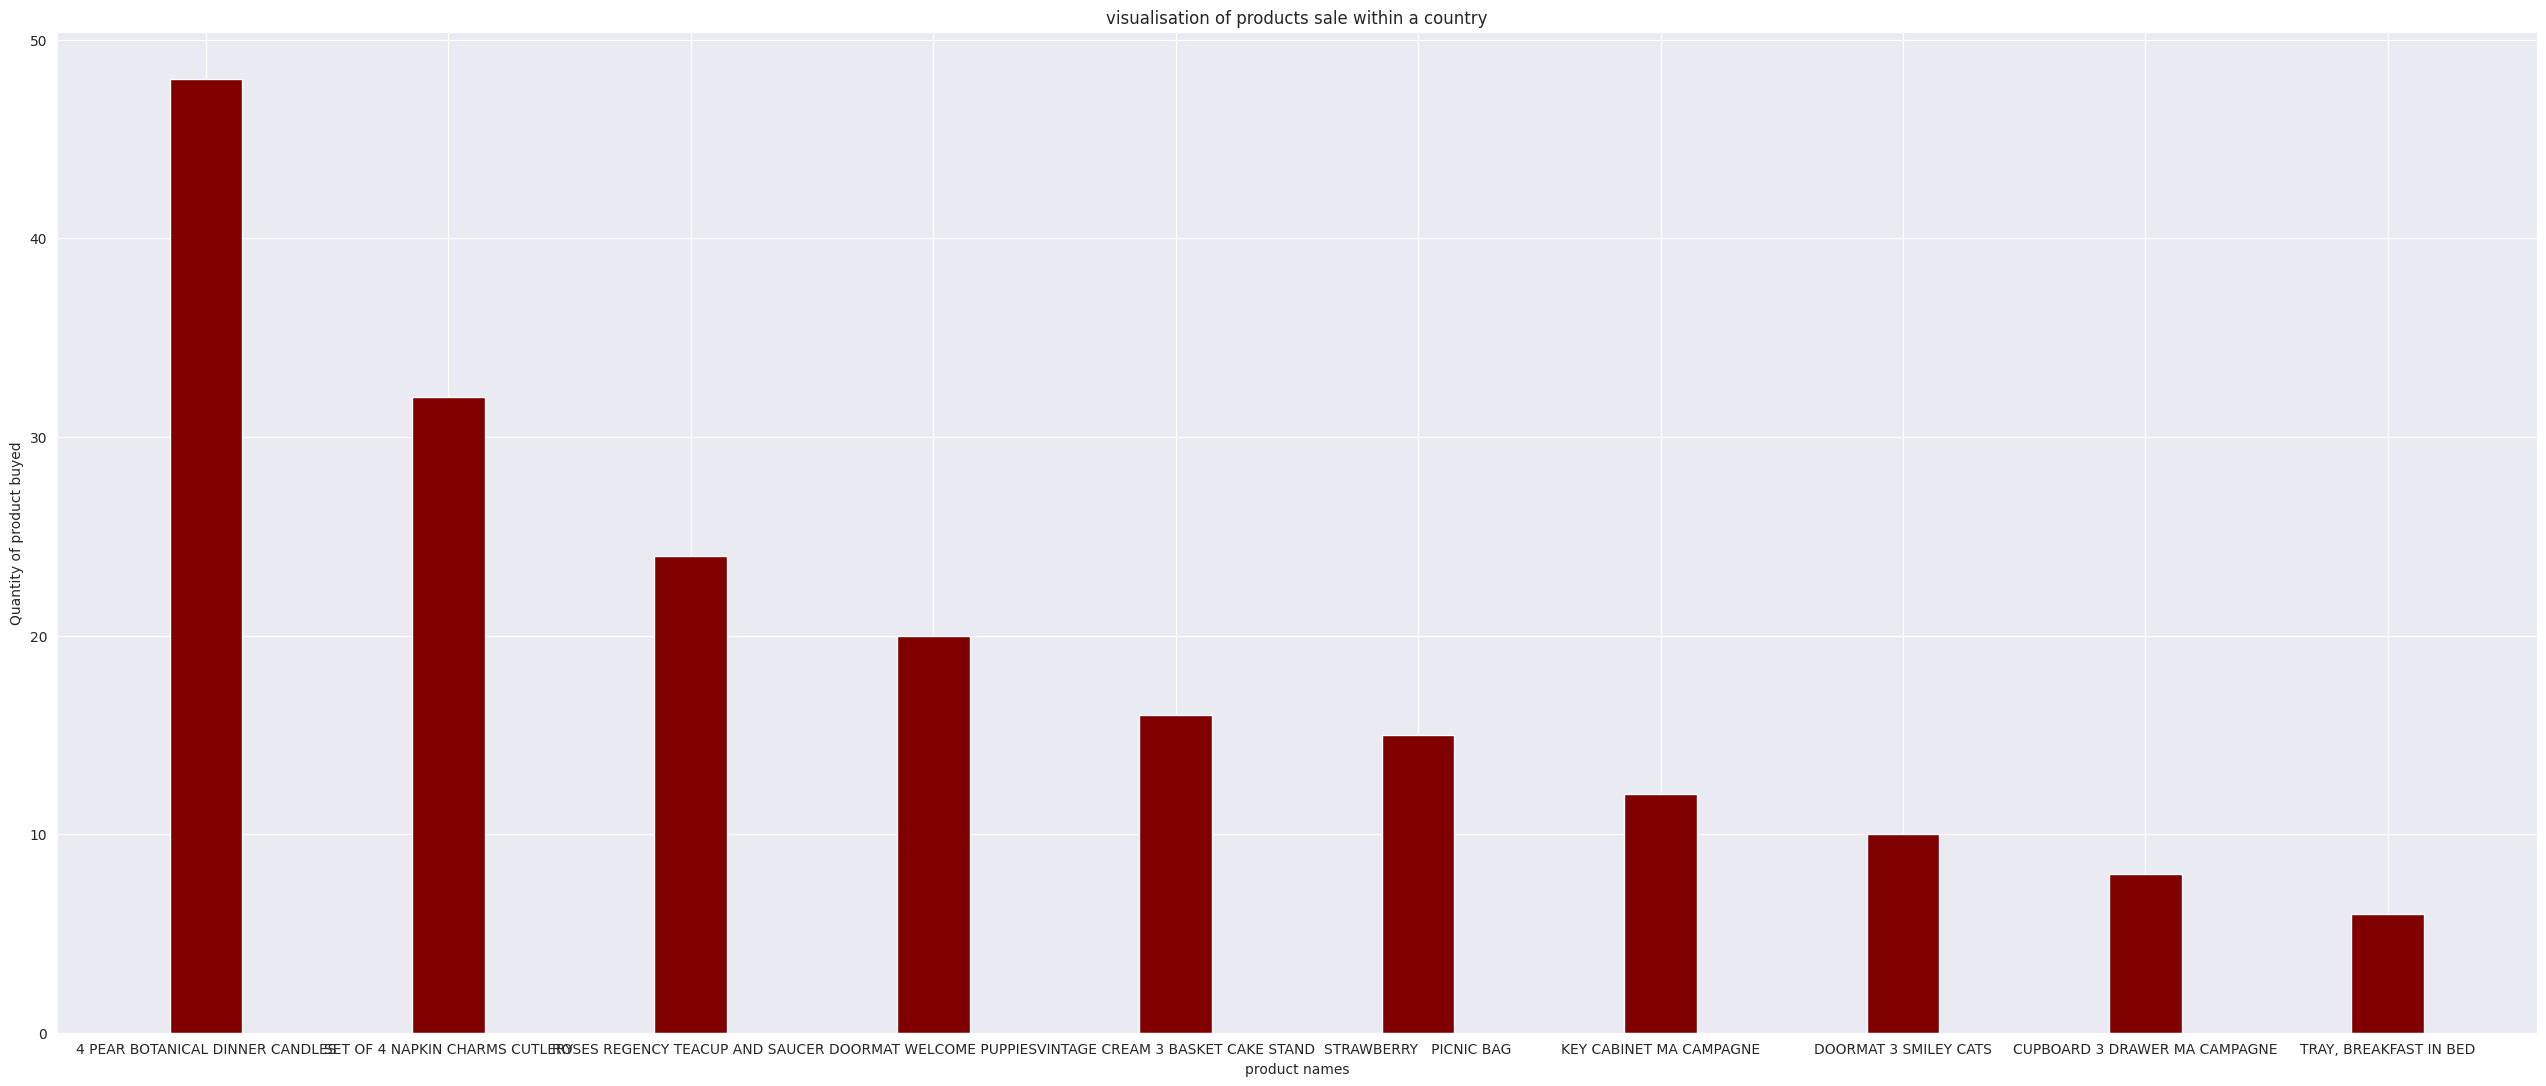

For  Hong Kong


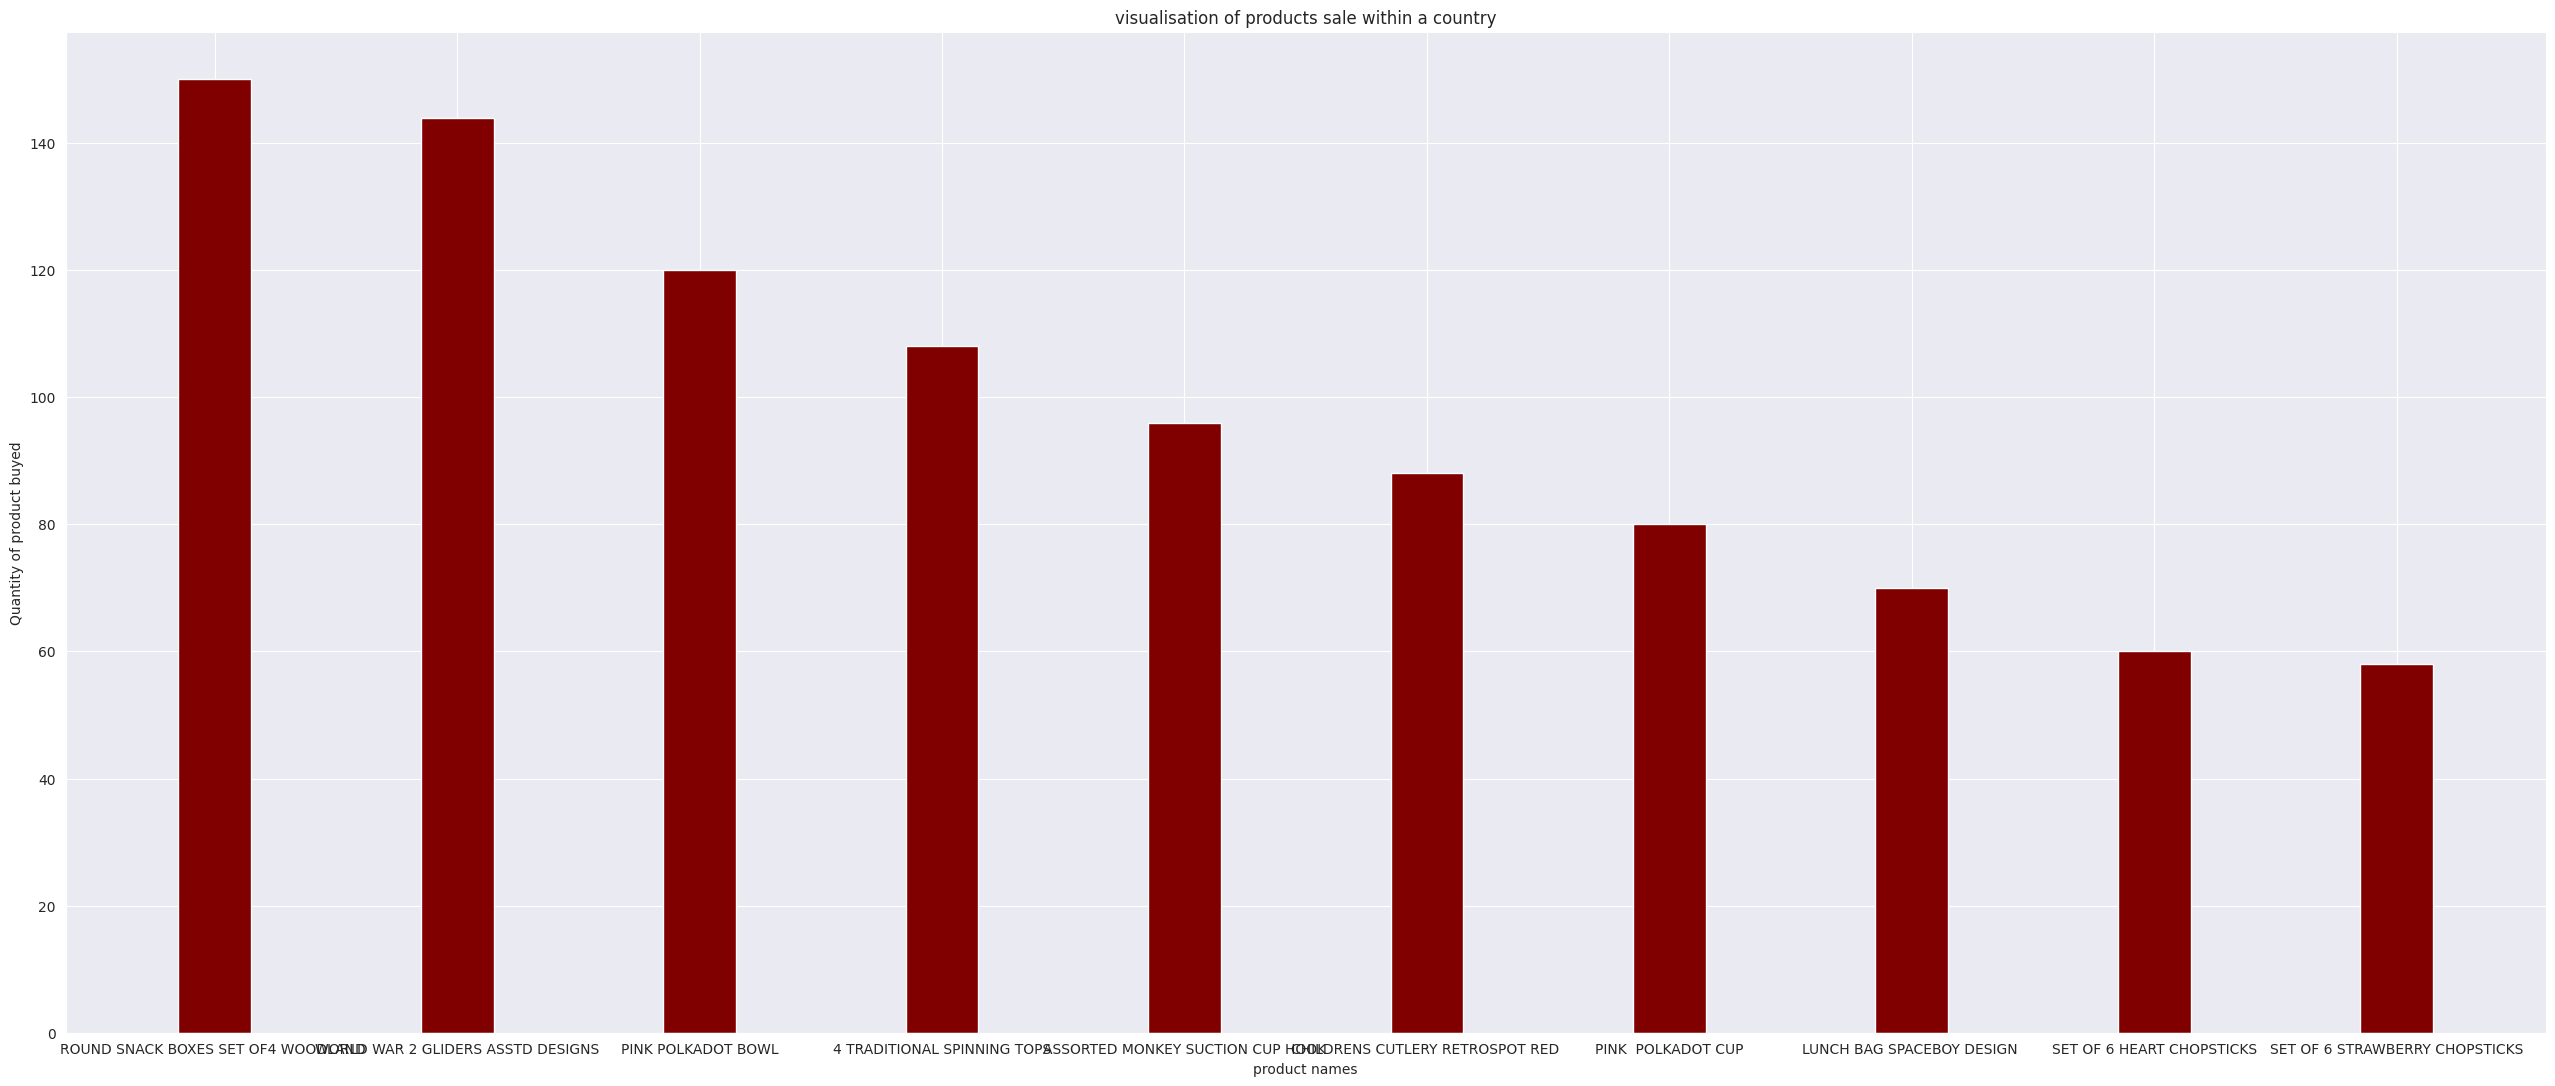

For  Singapore


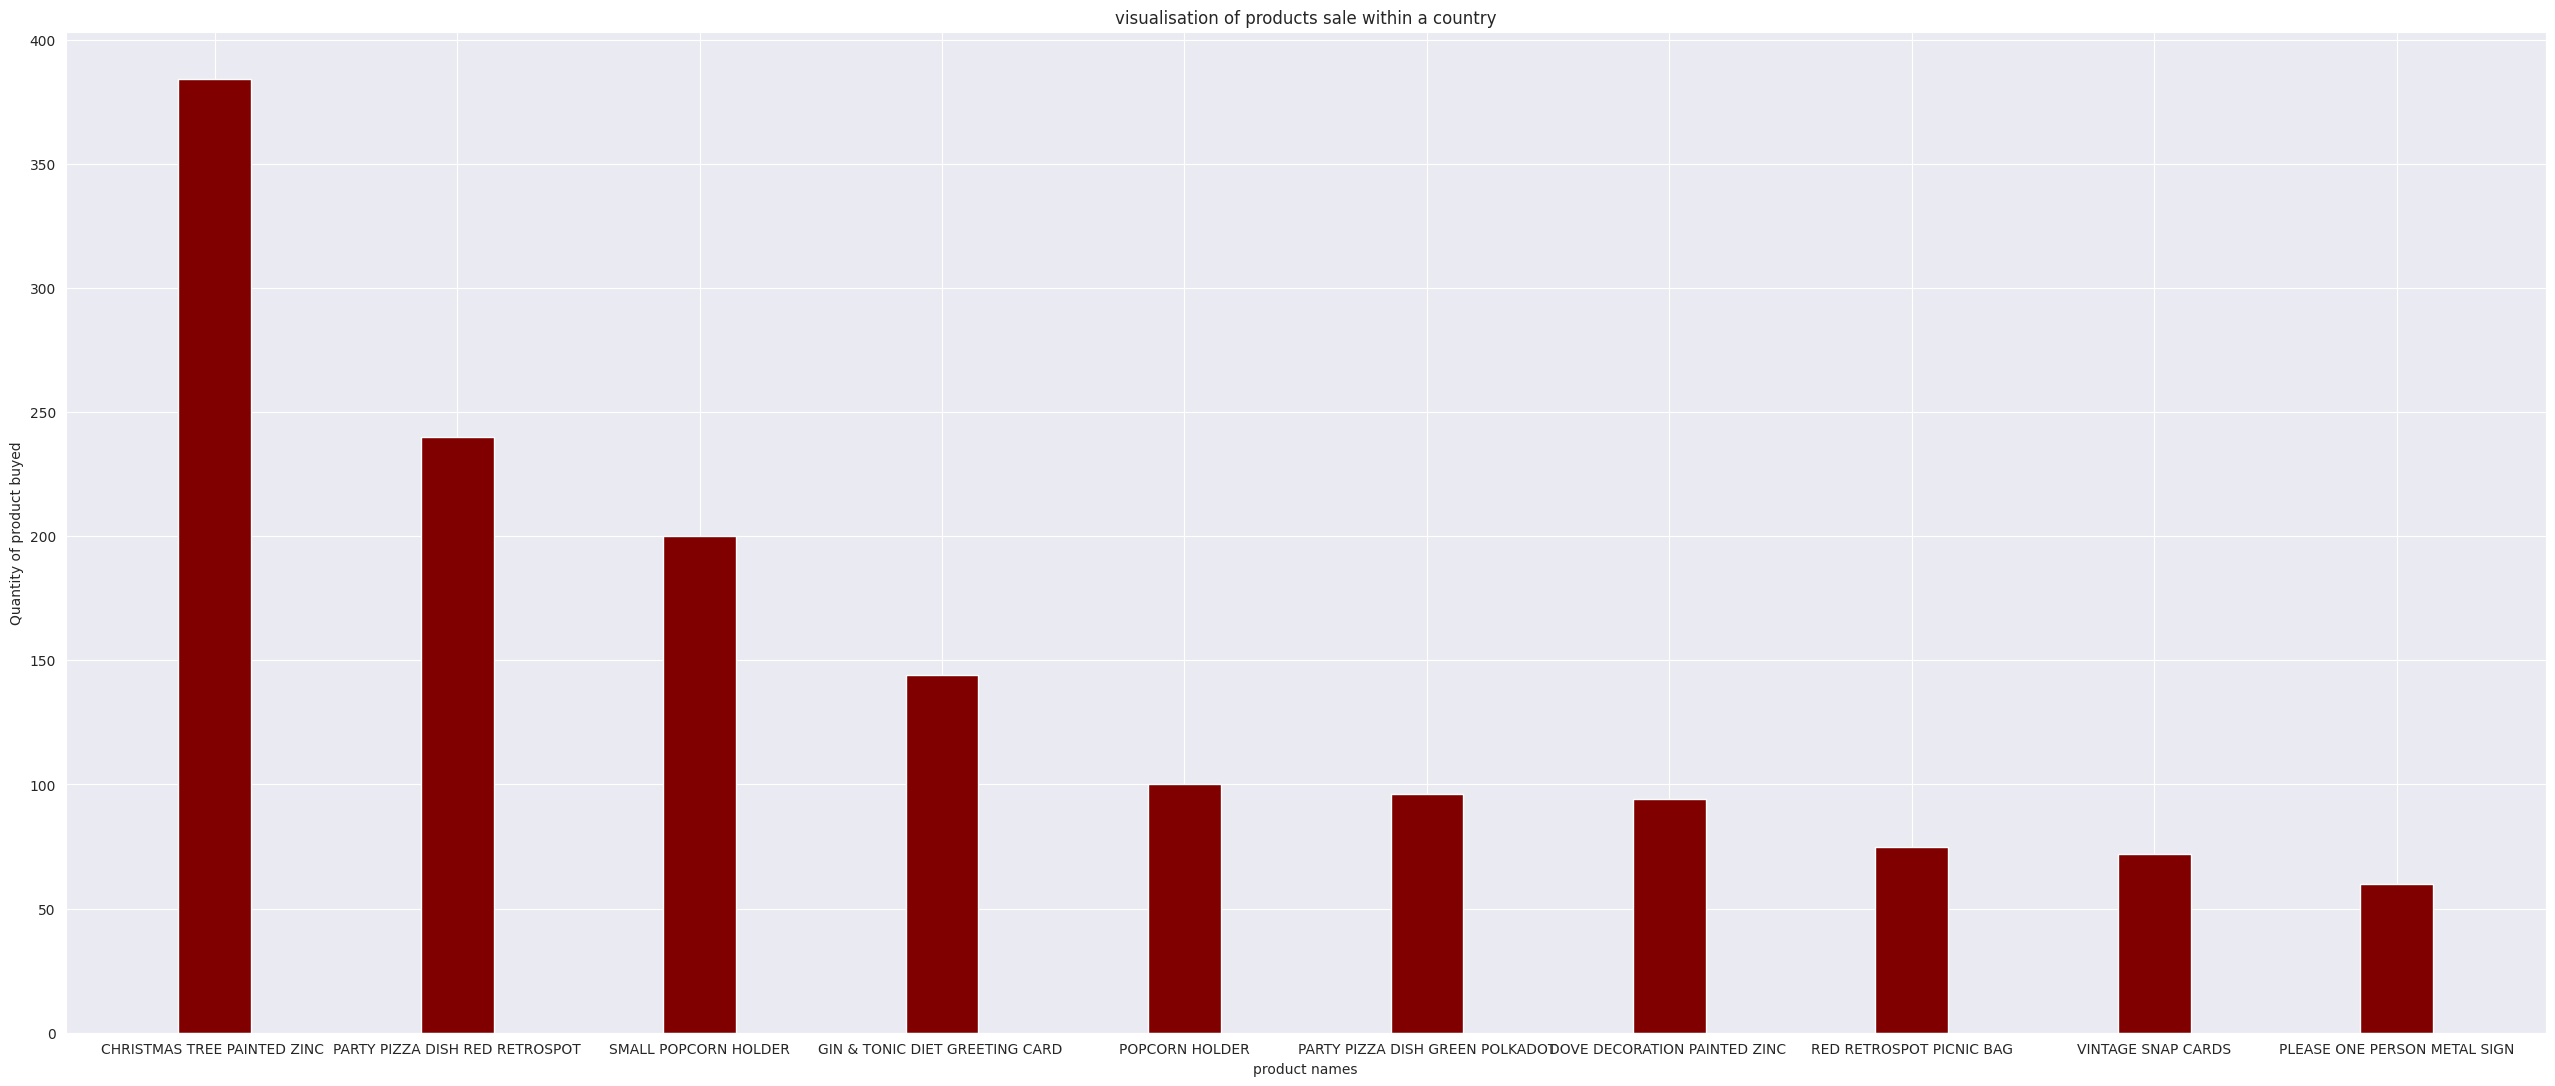

For  Lebanon


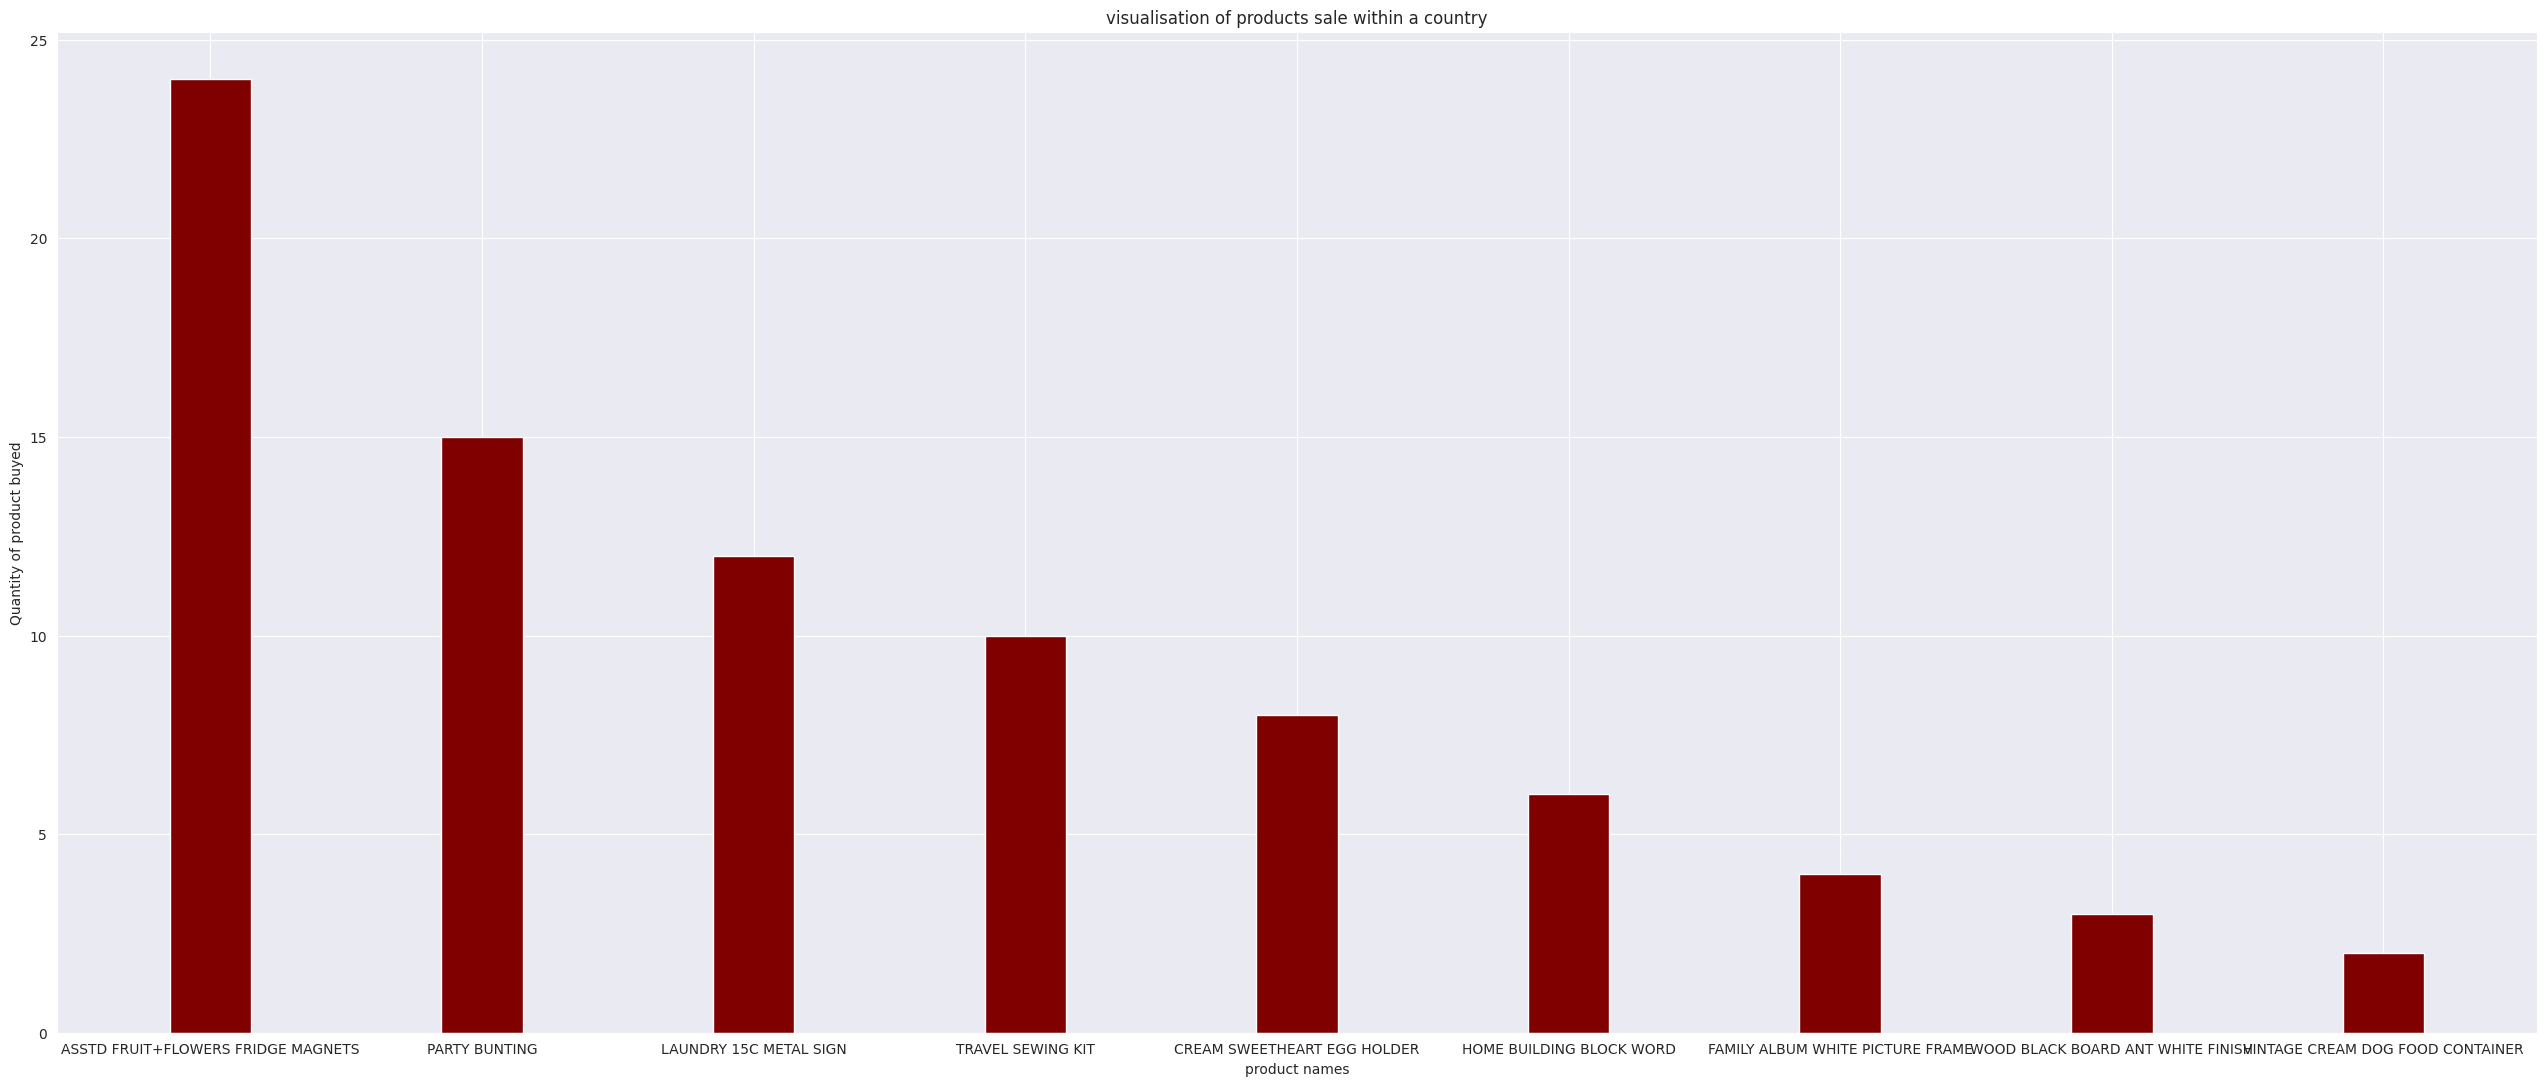

For  United Arab Emirates


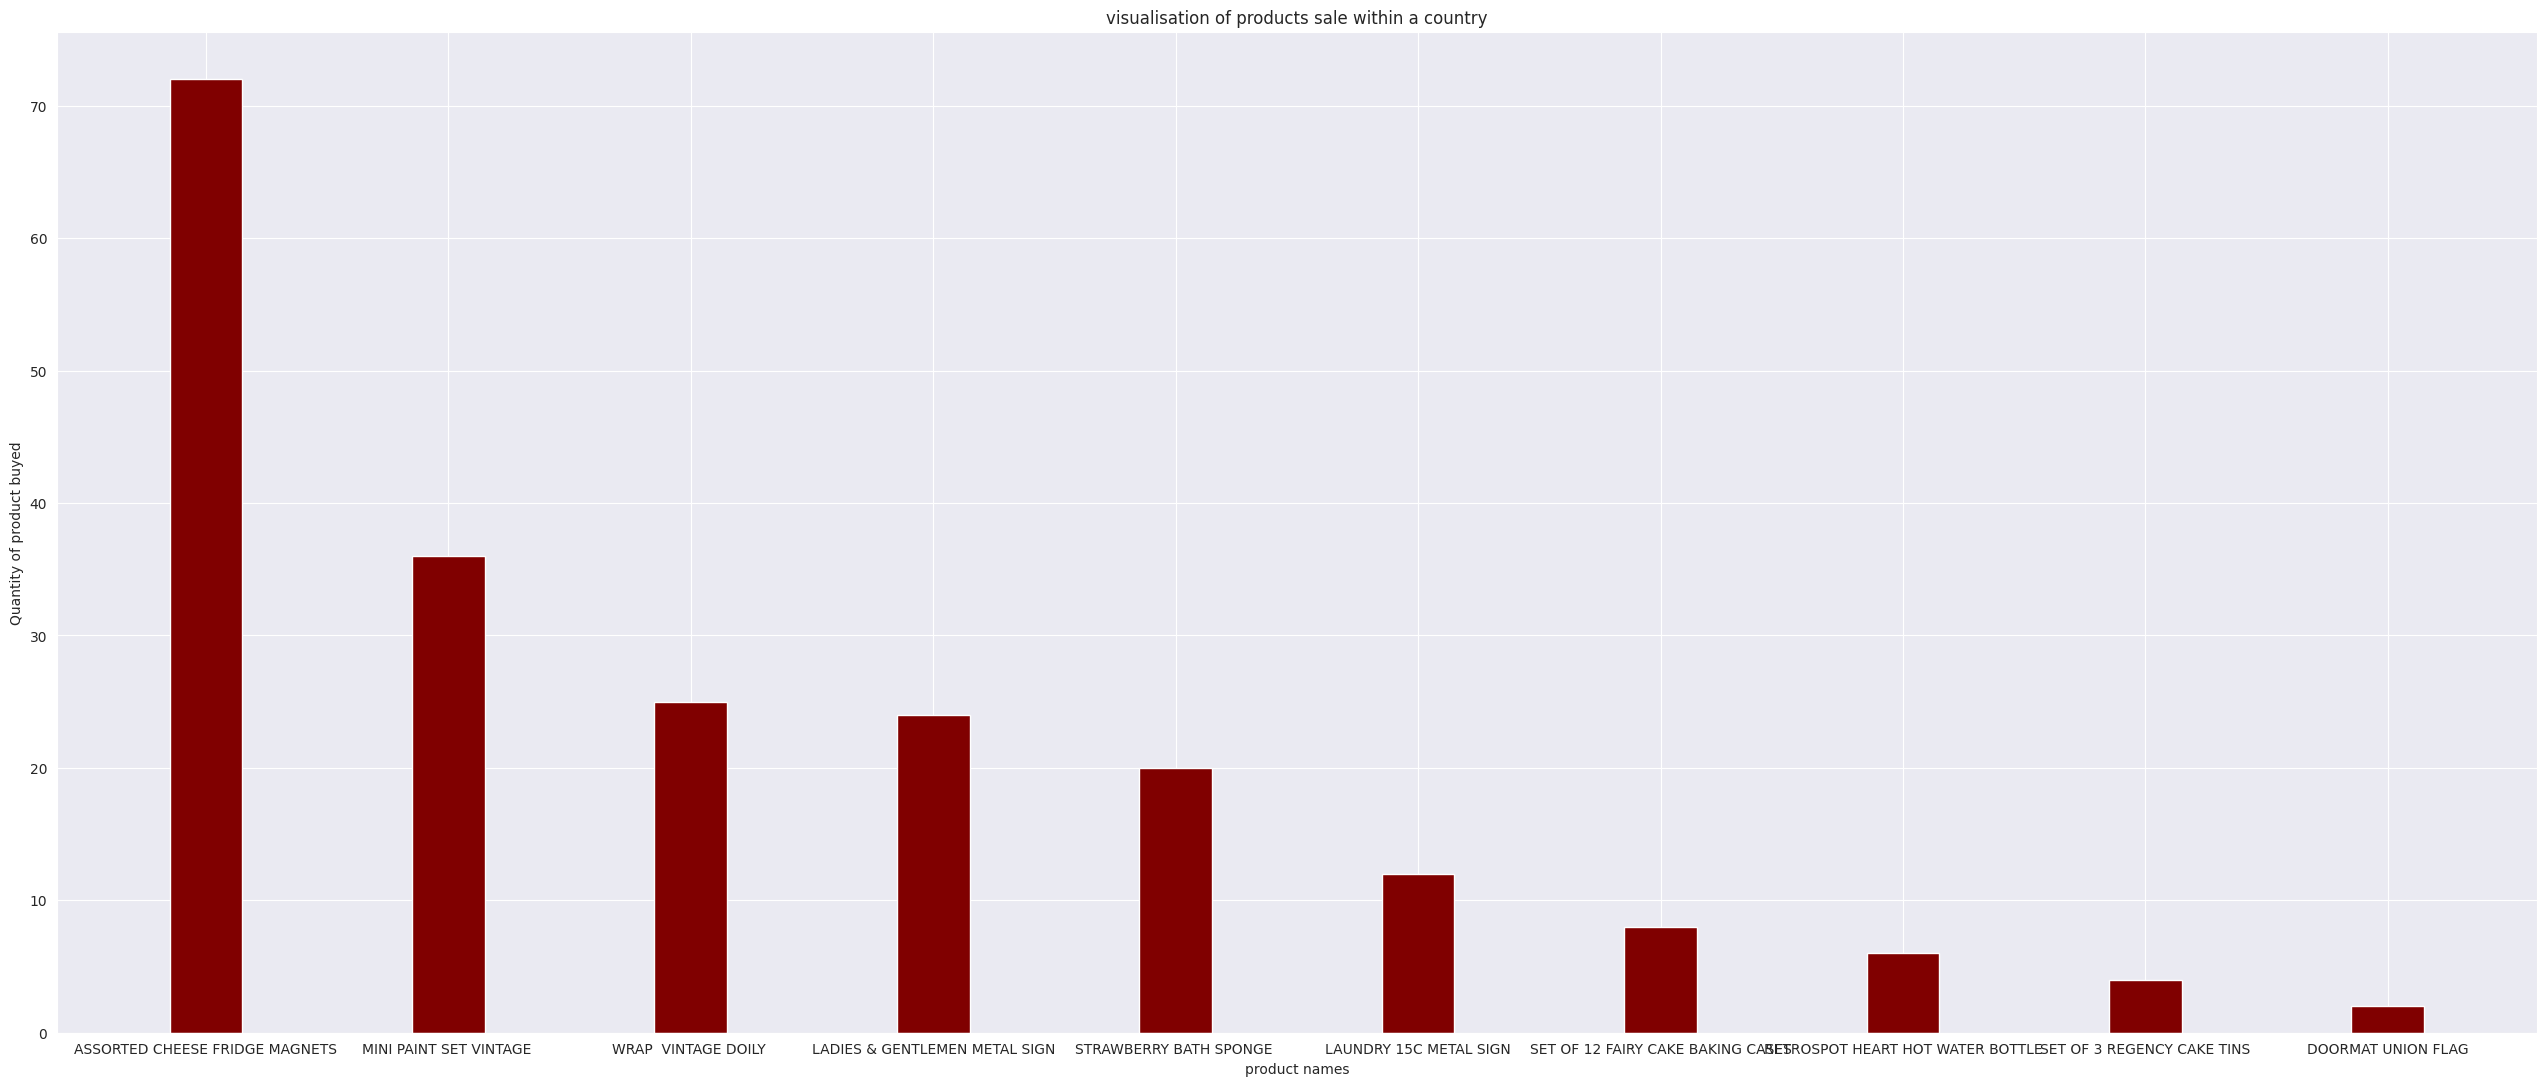

For  Saudi Arabia


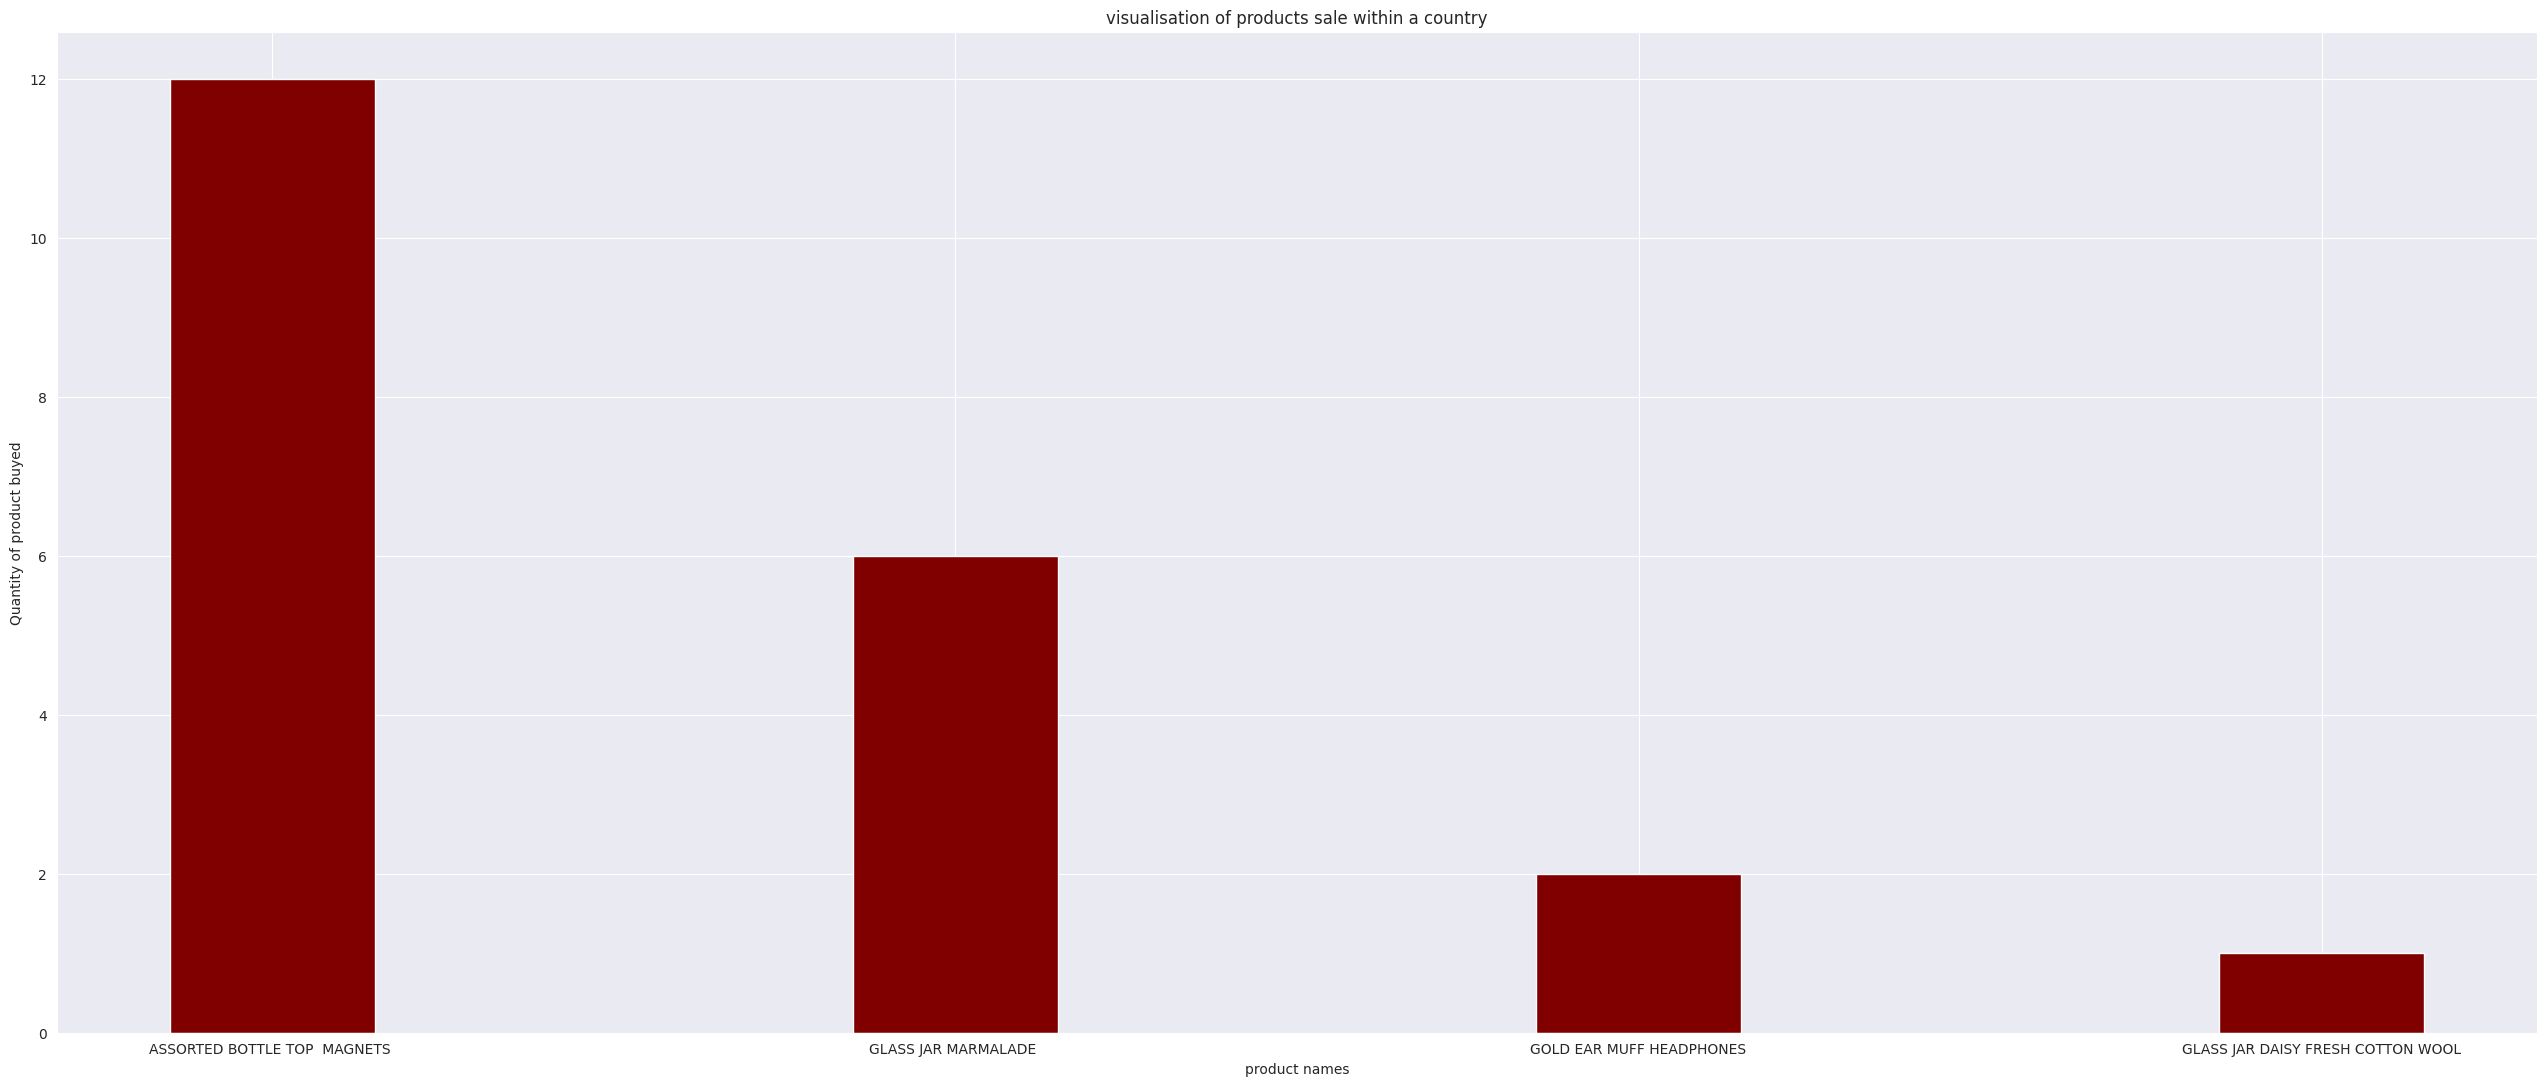

For  Czech Republic


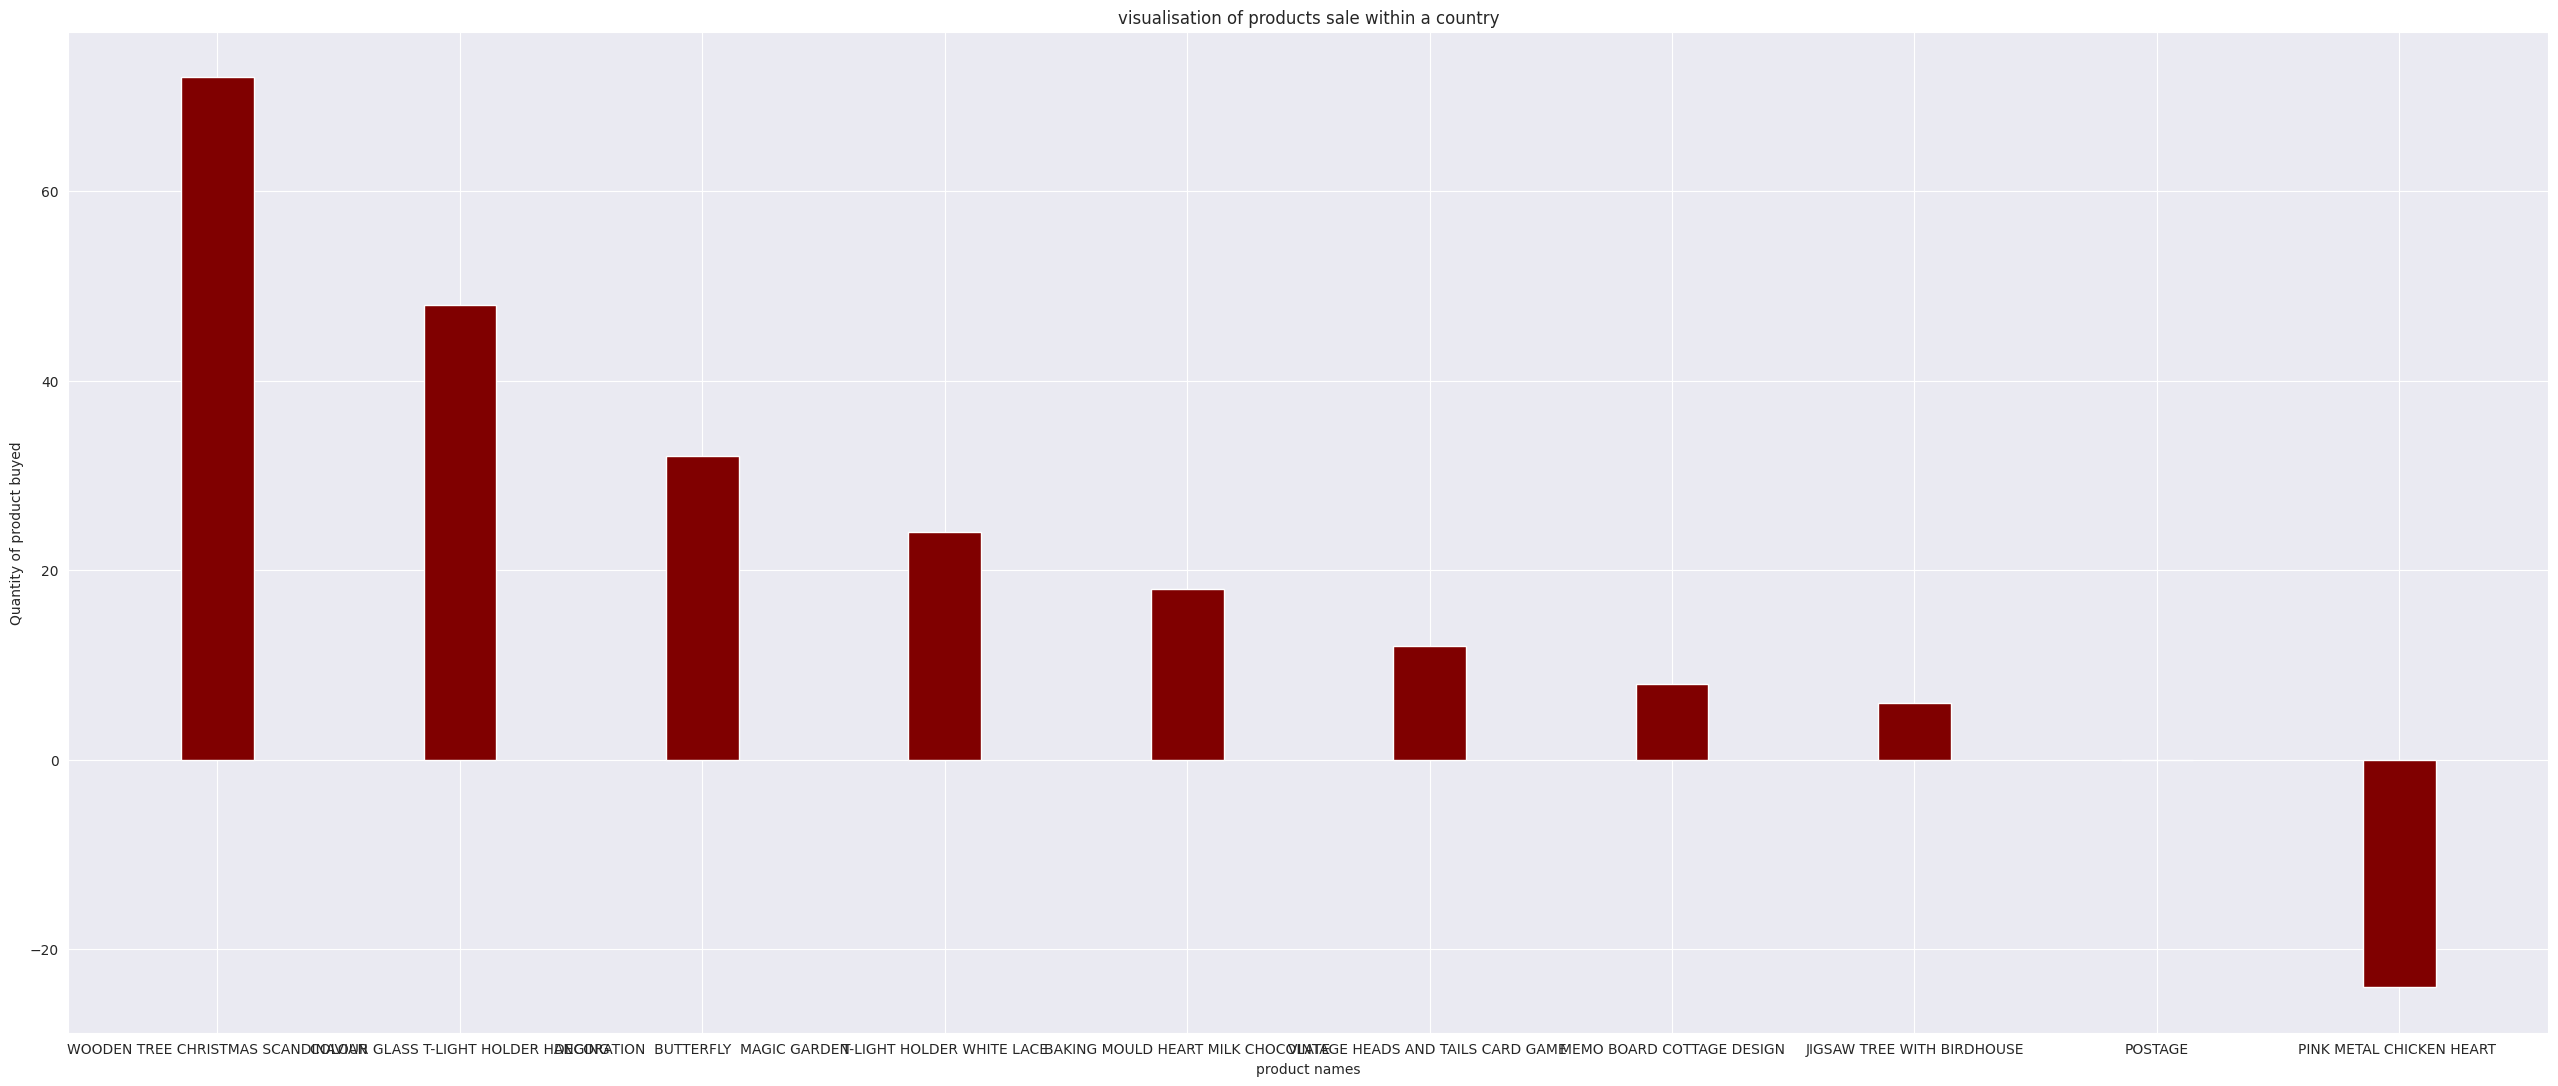

For  Canada


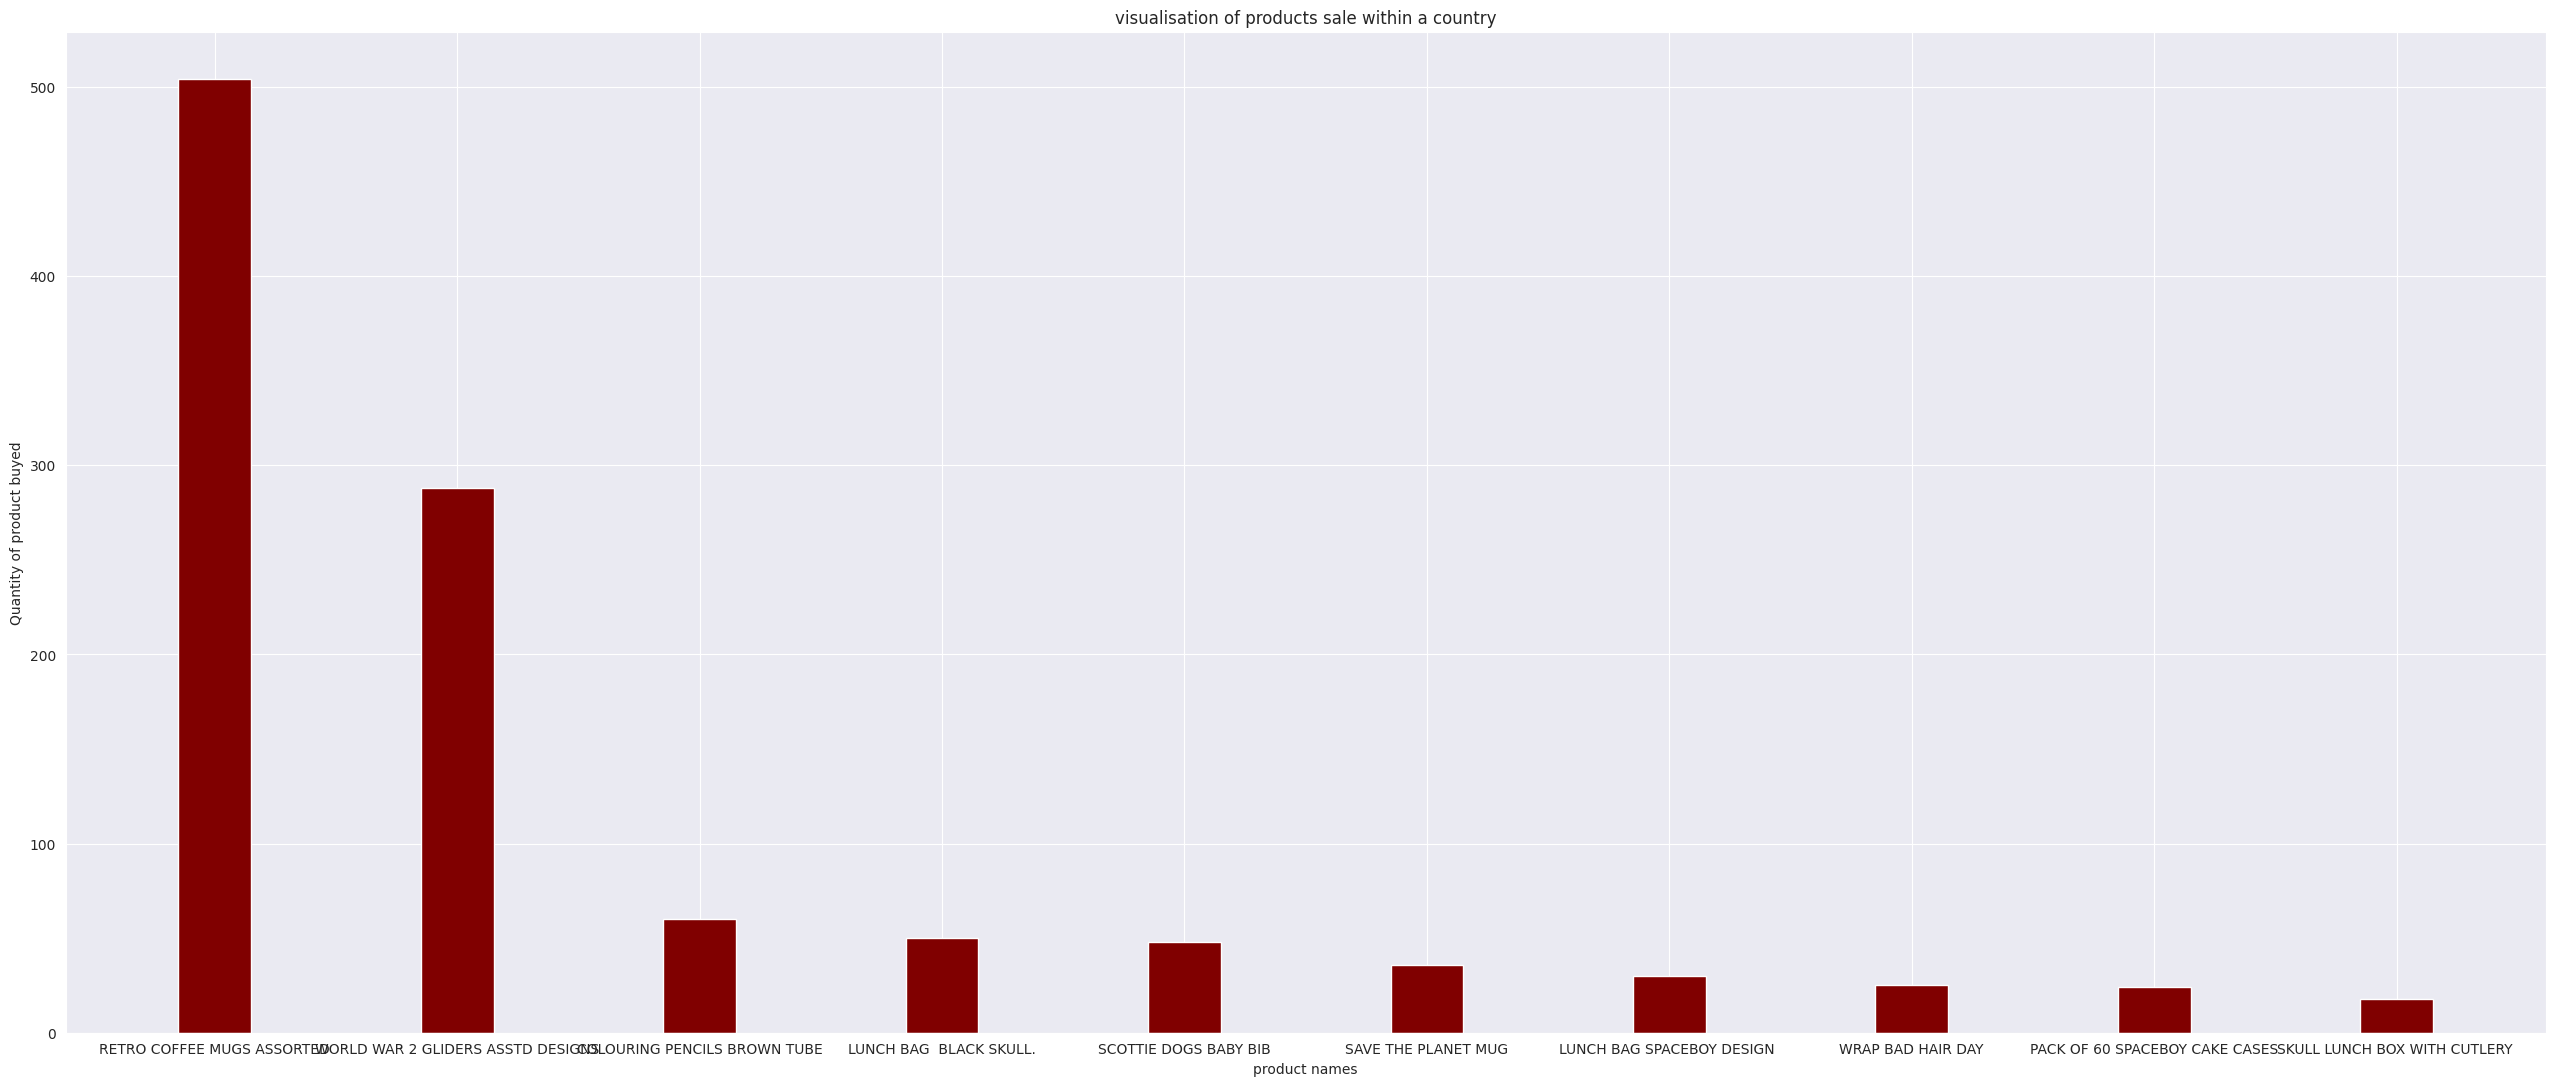

For  Unspecified


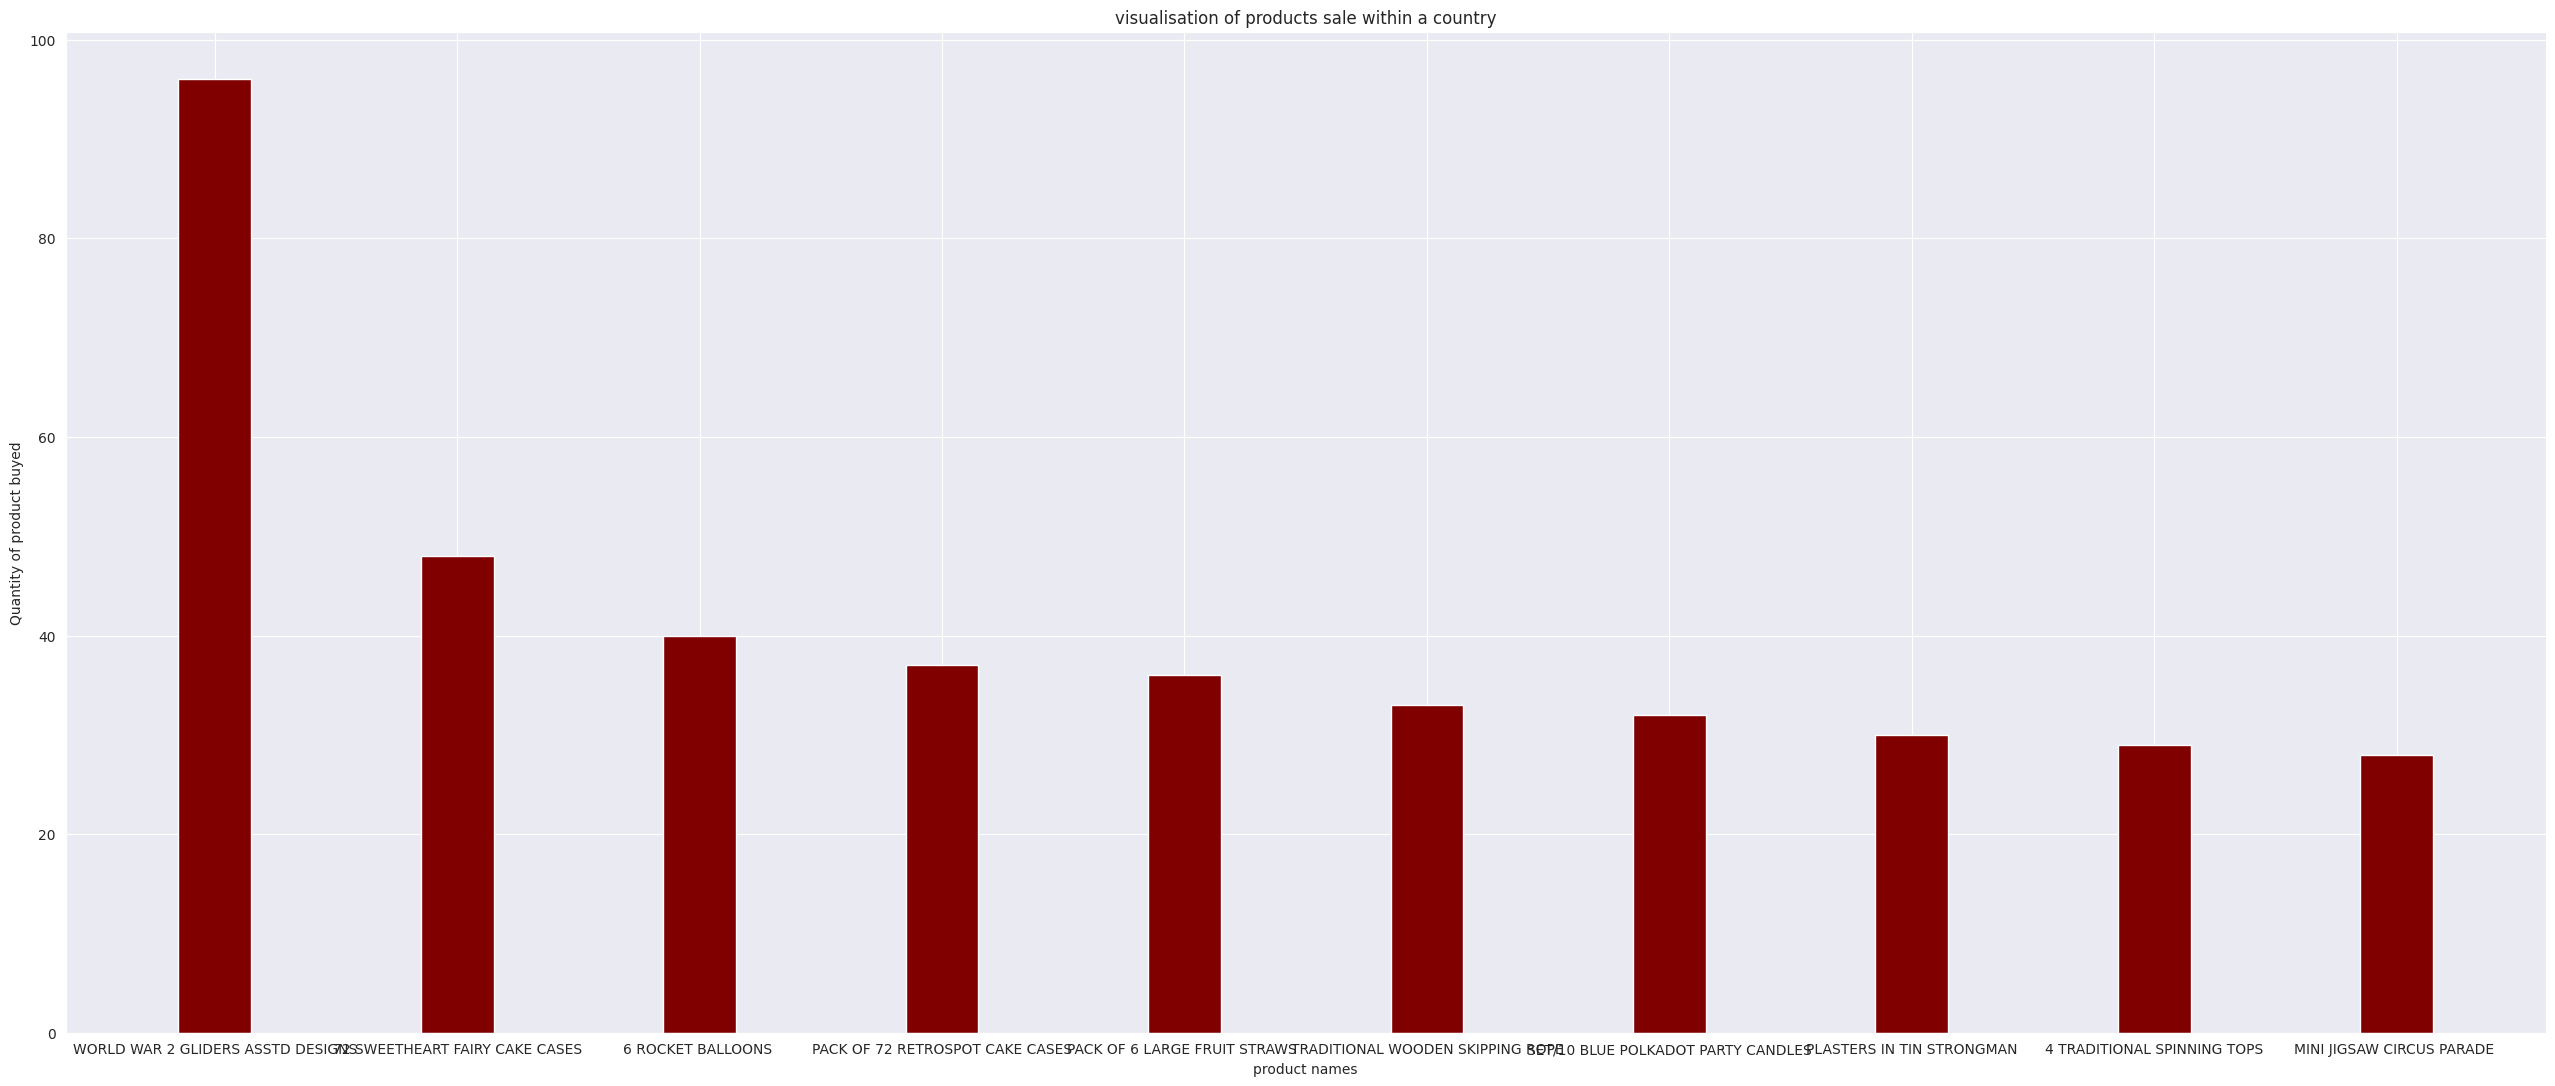

For  Brazil


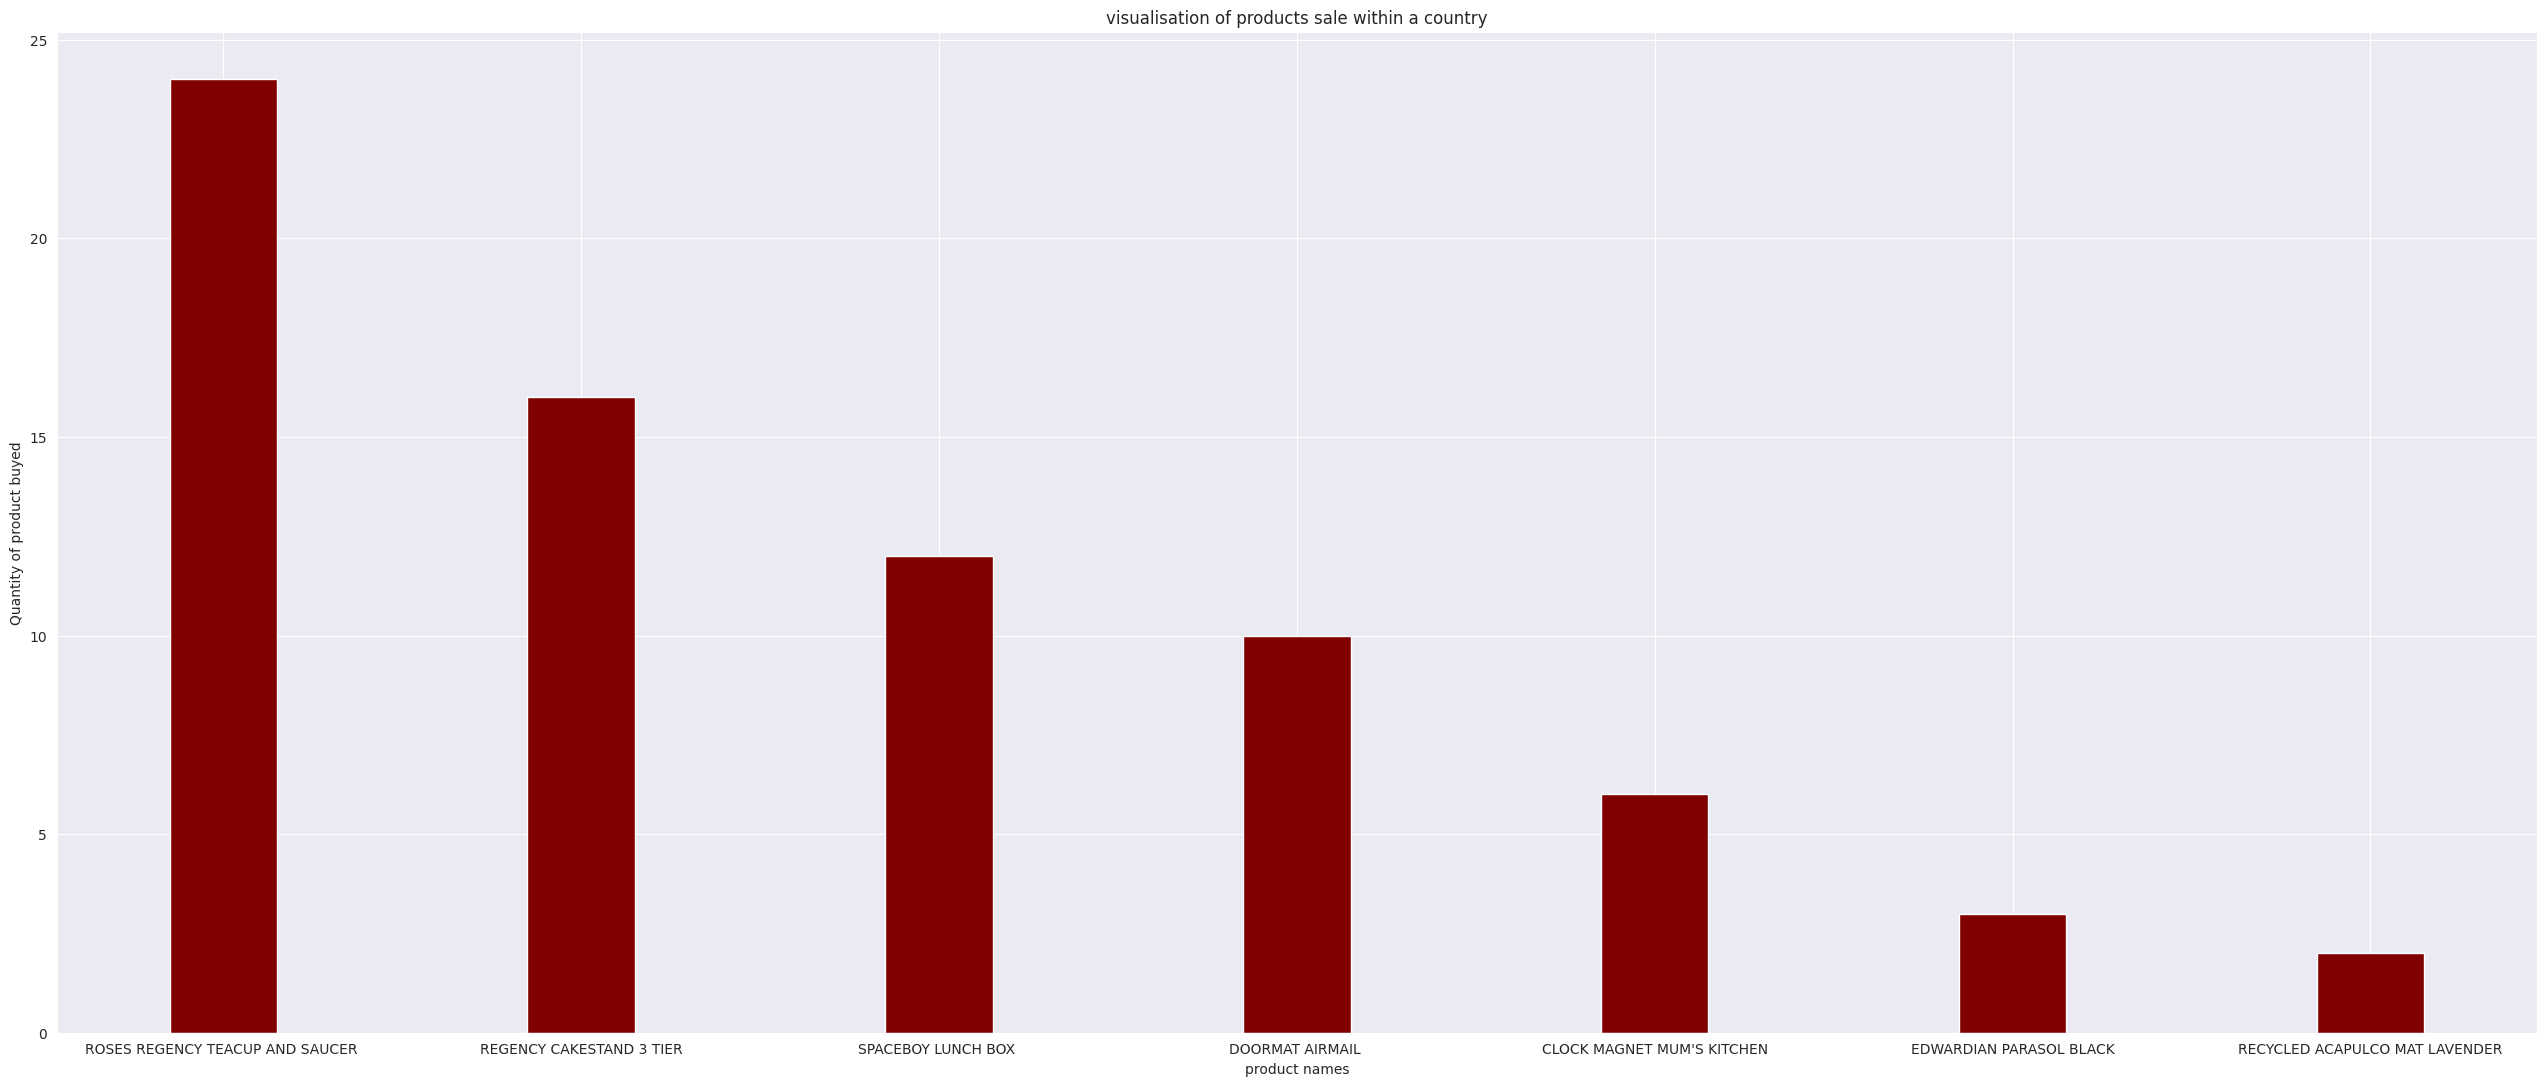

For  USA


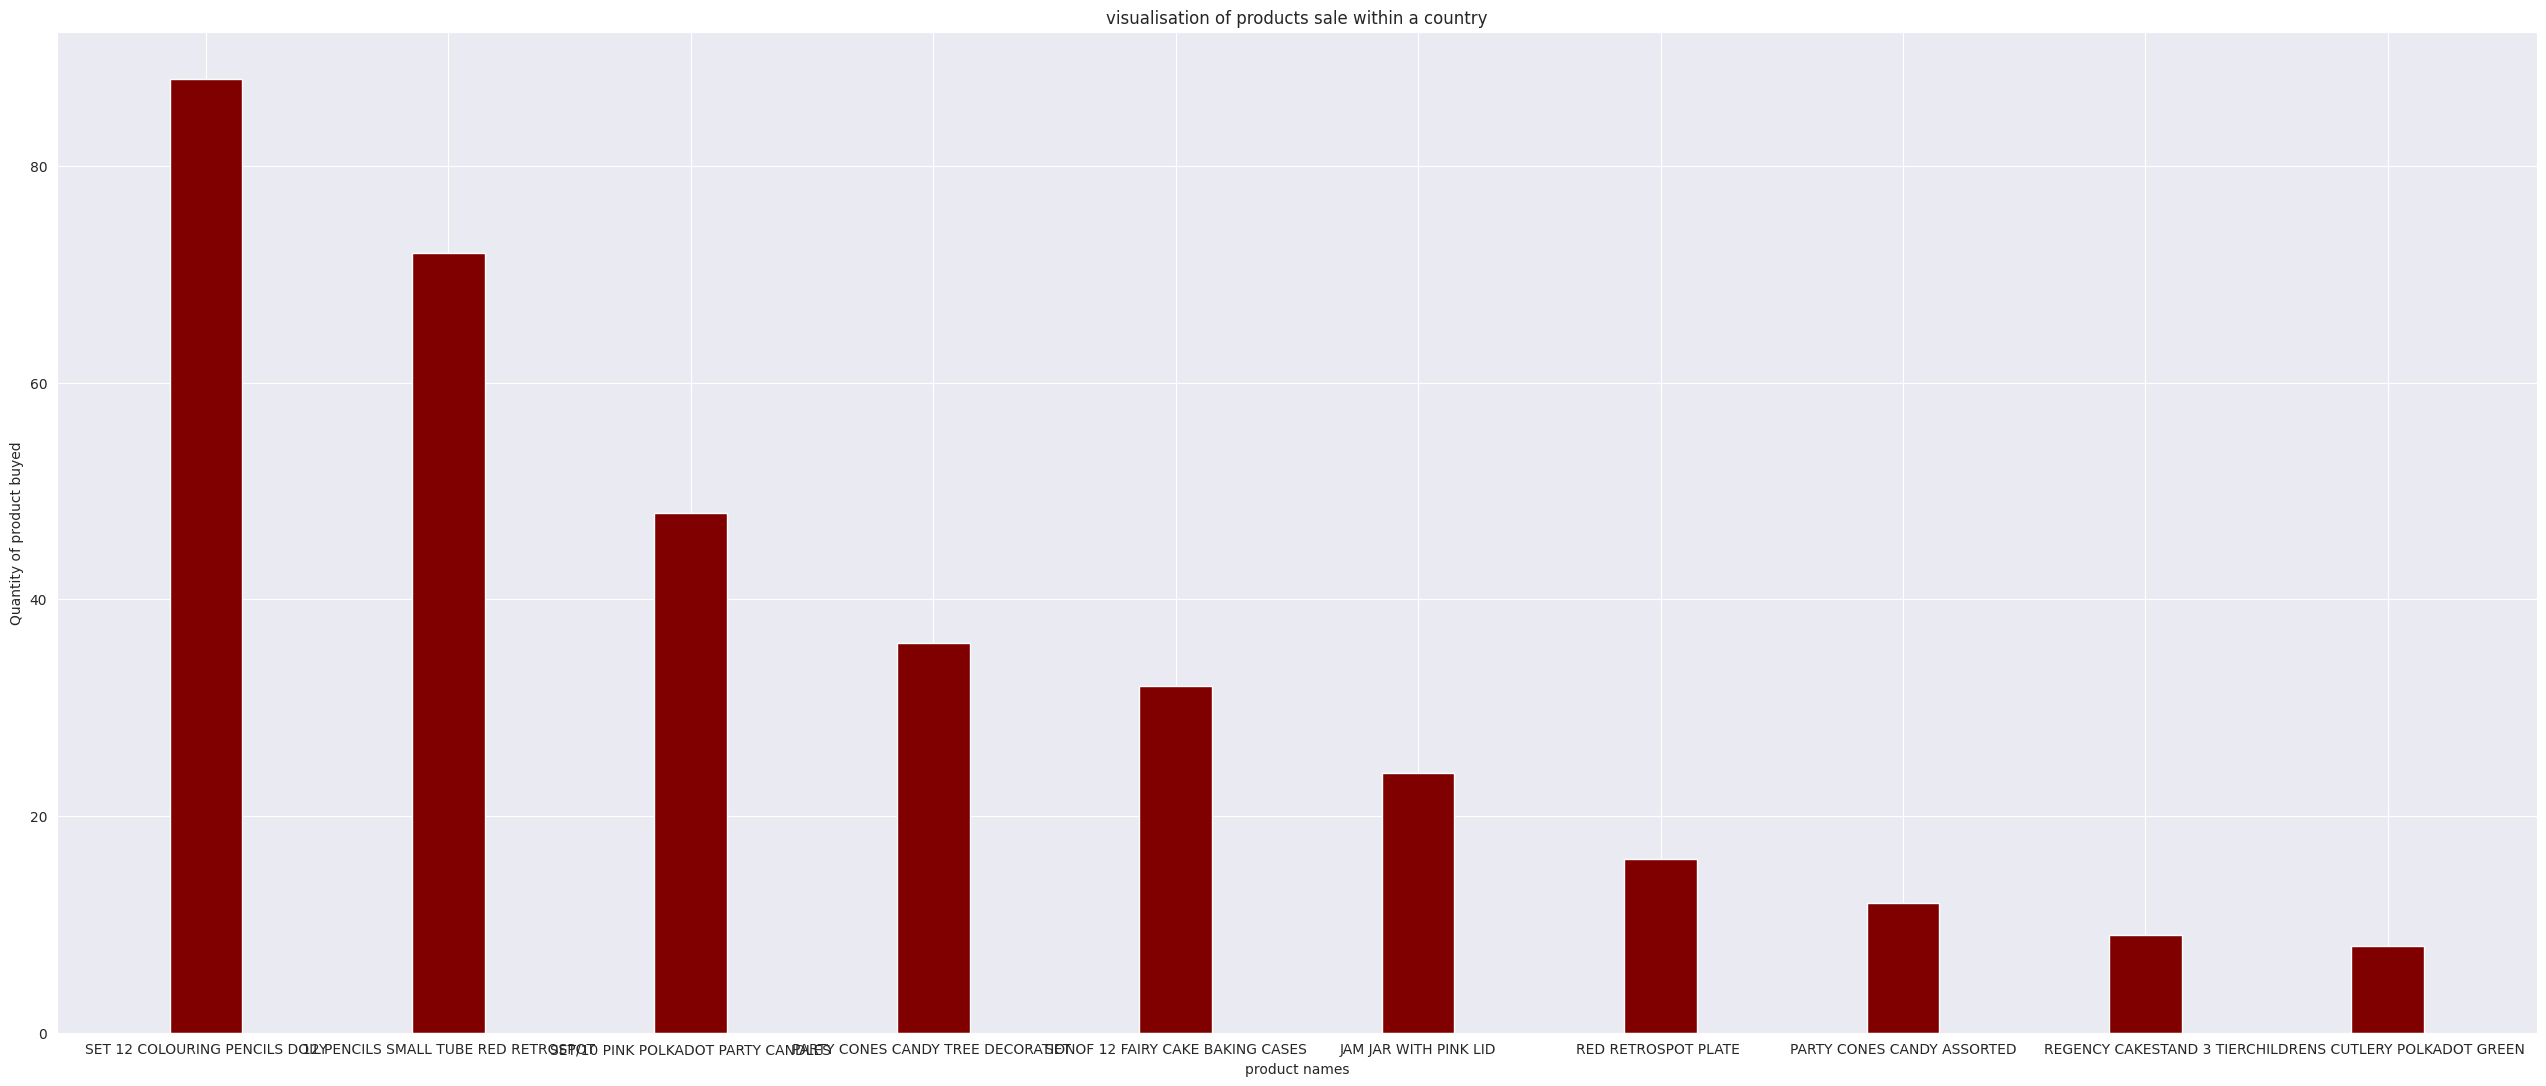

For  European Community


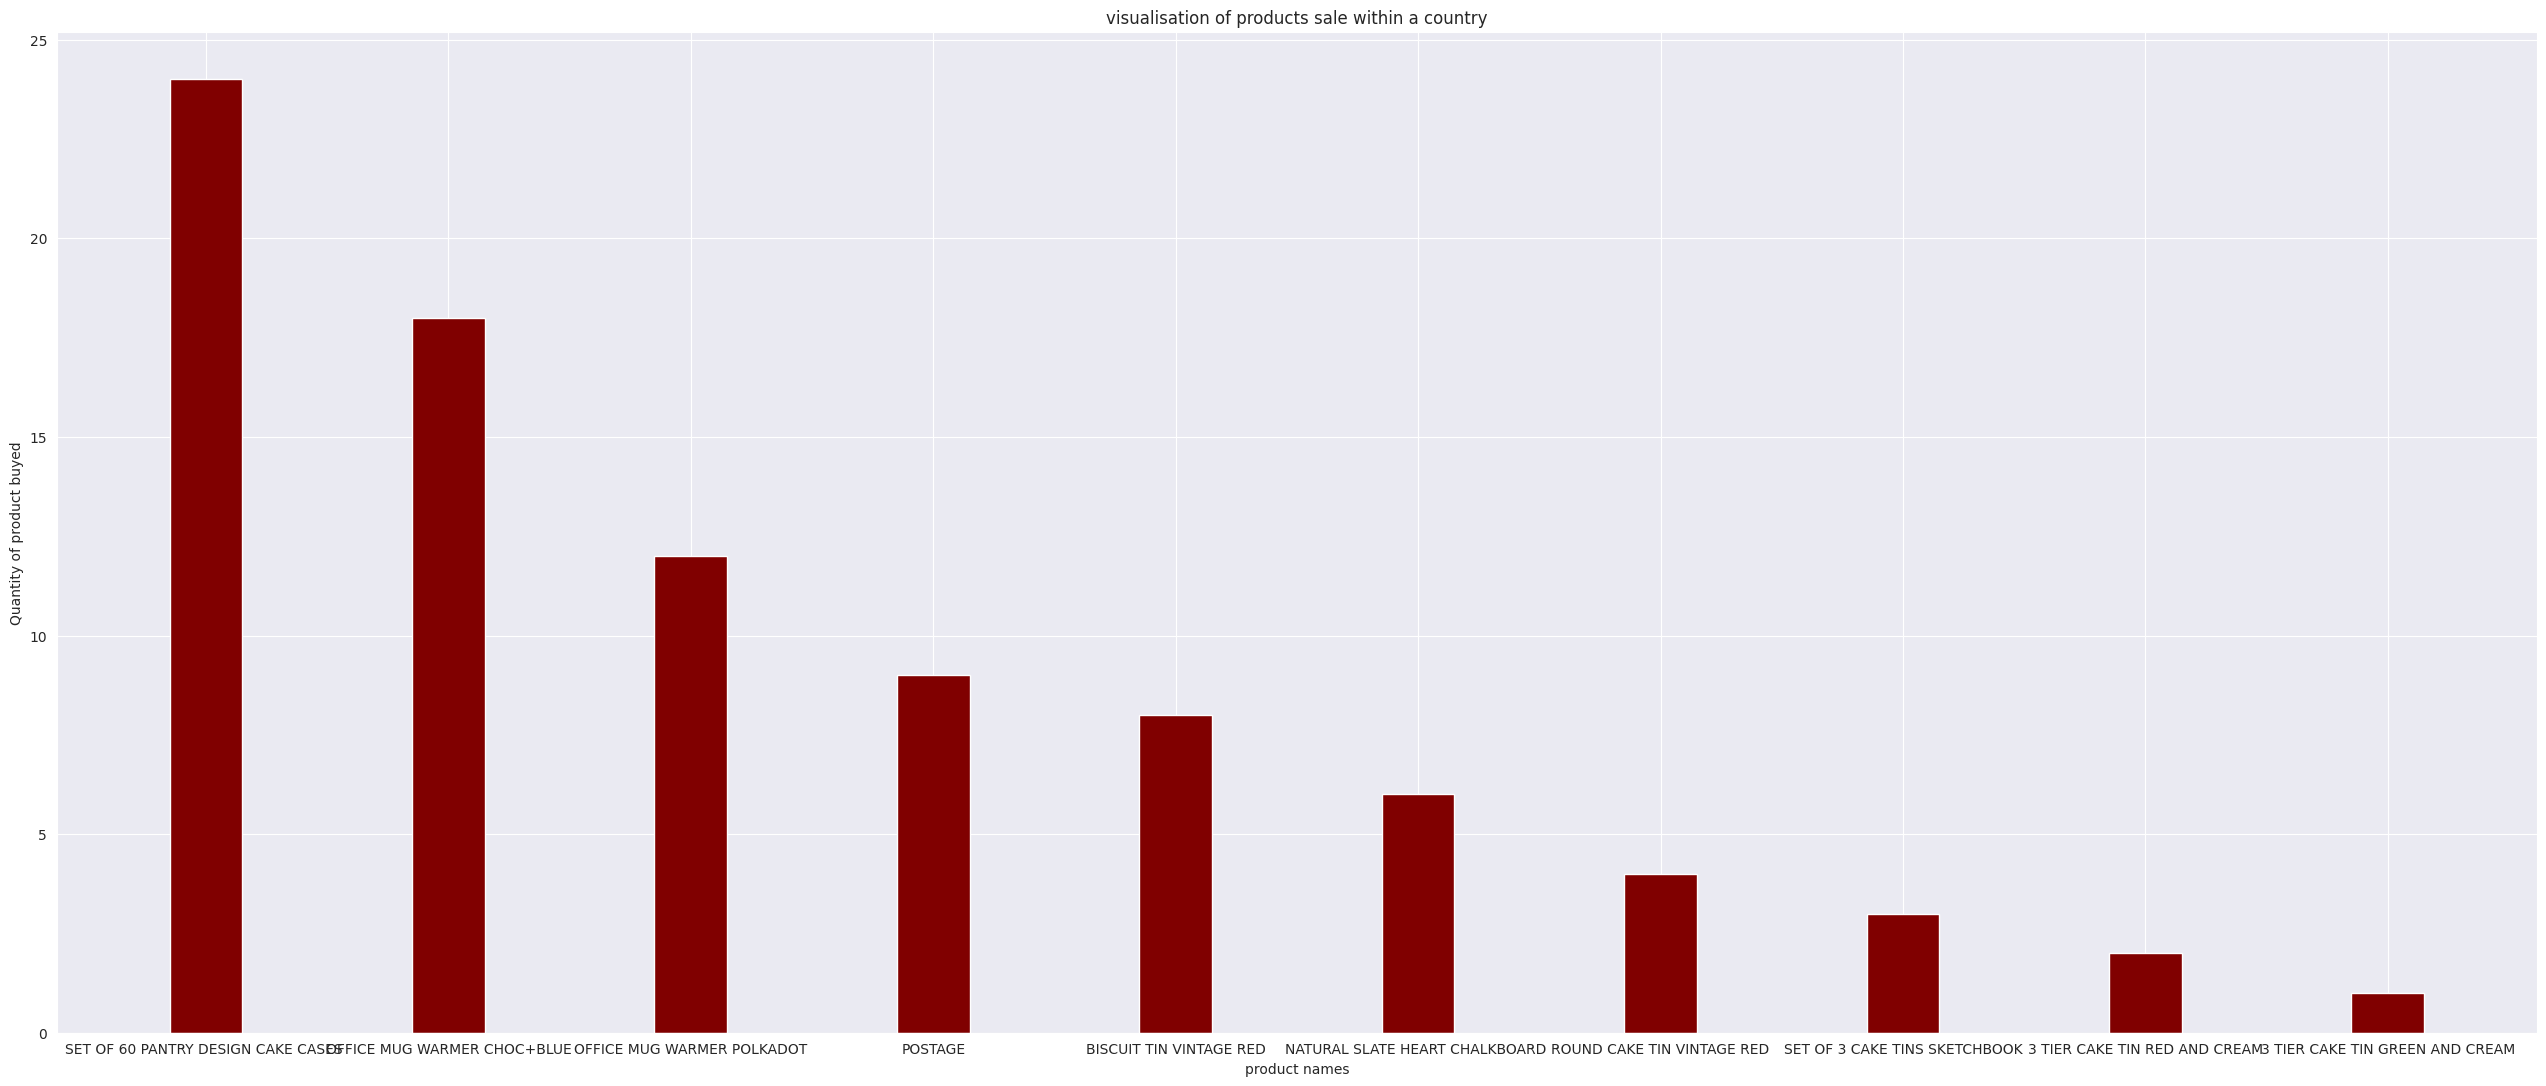

For  Malta


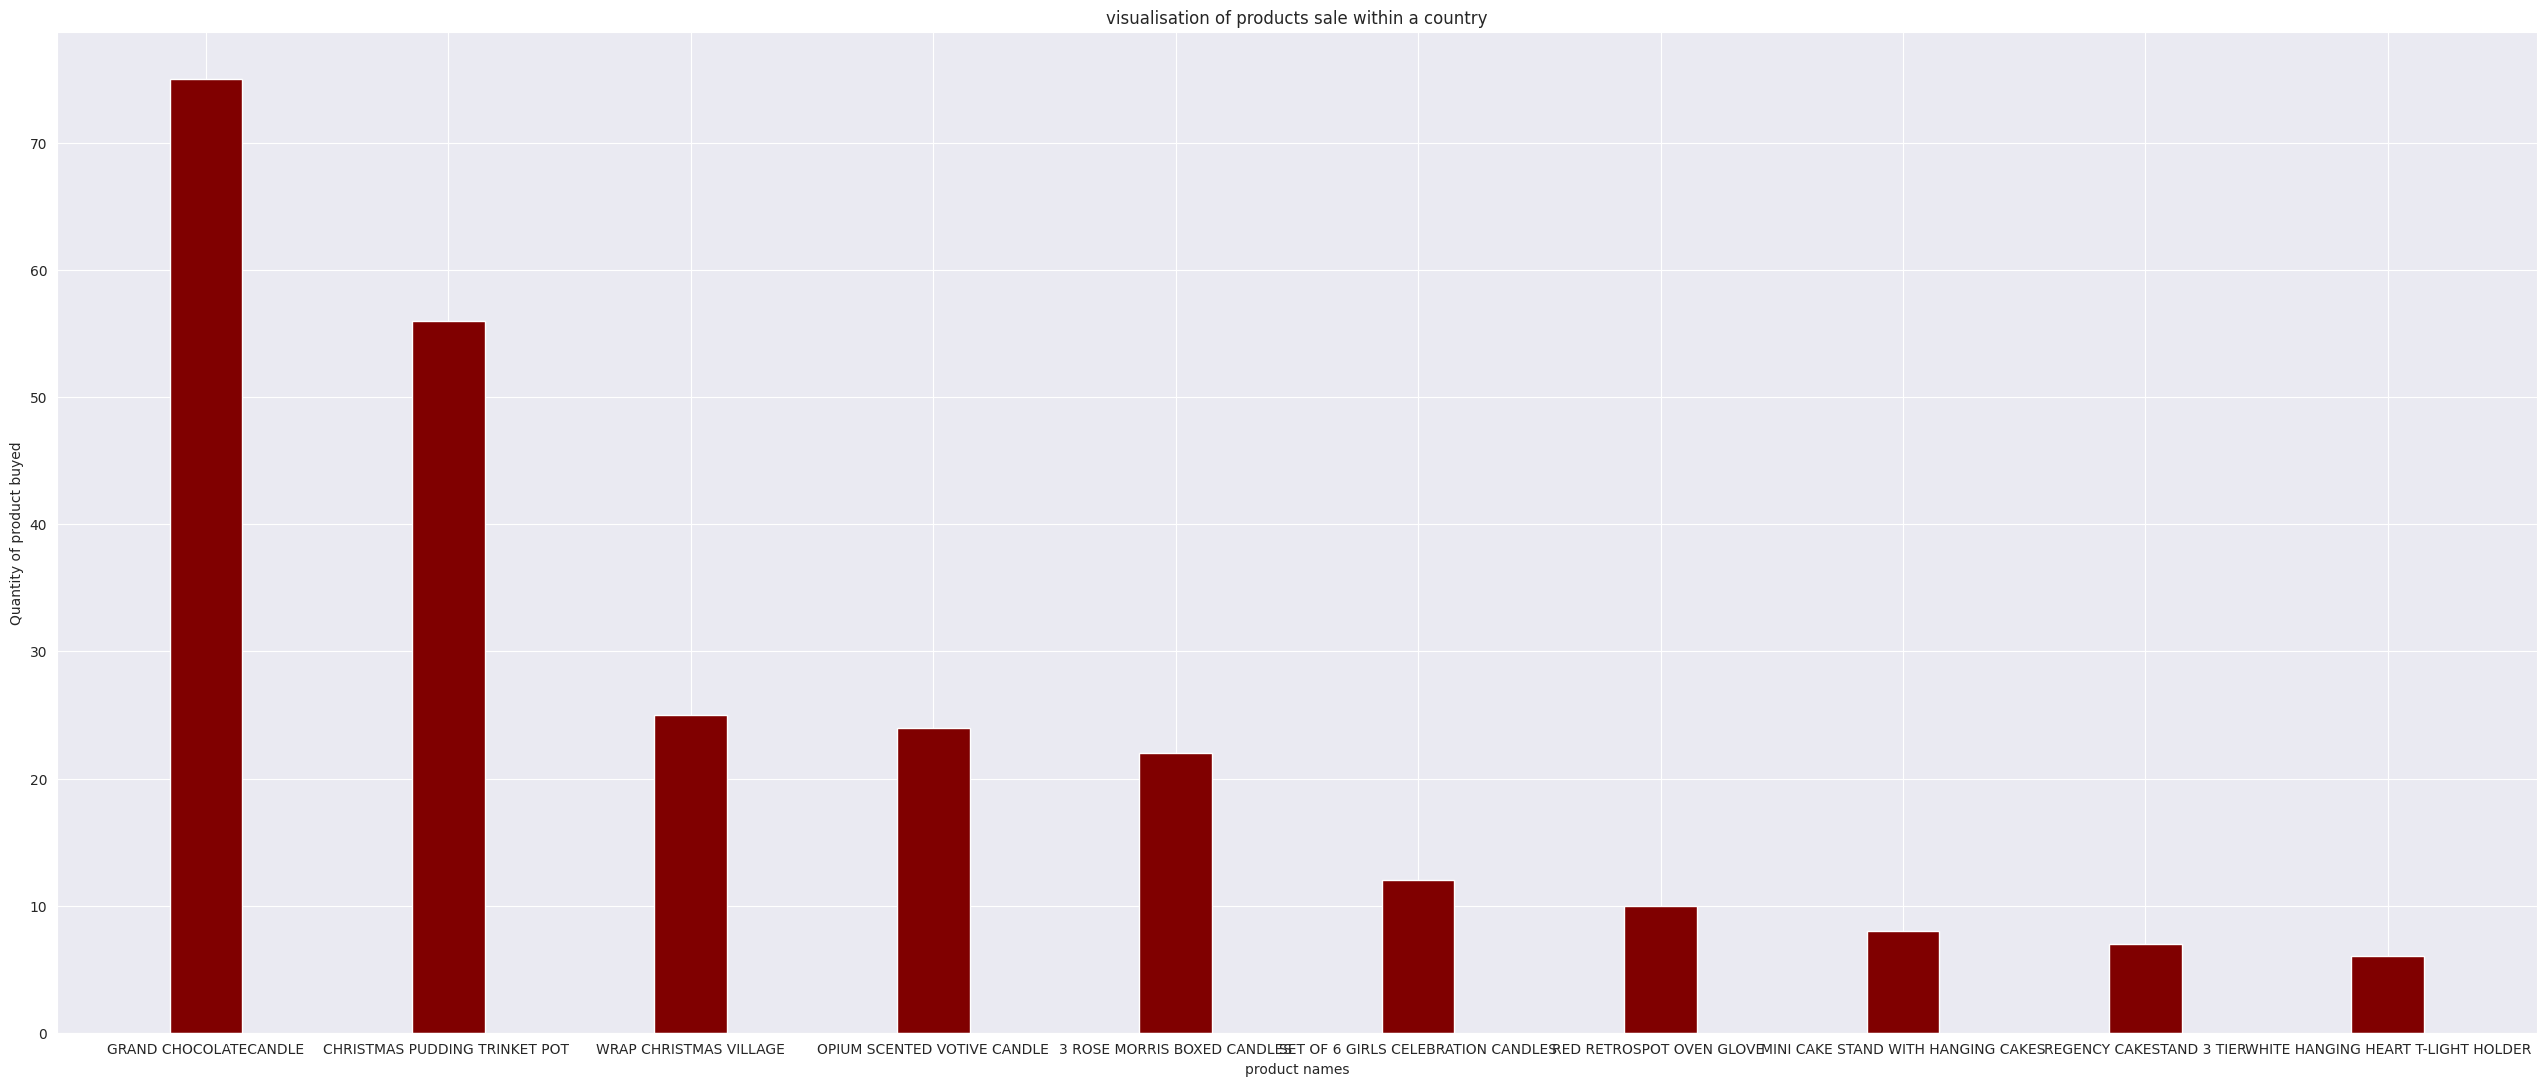

For  RSA


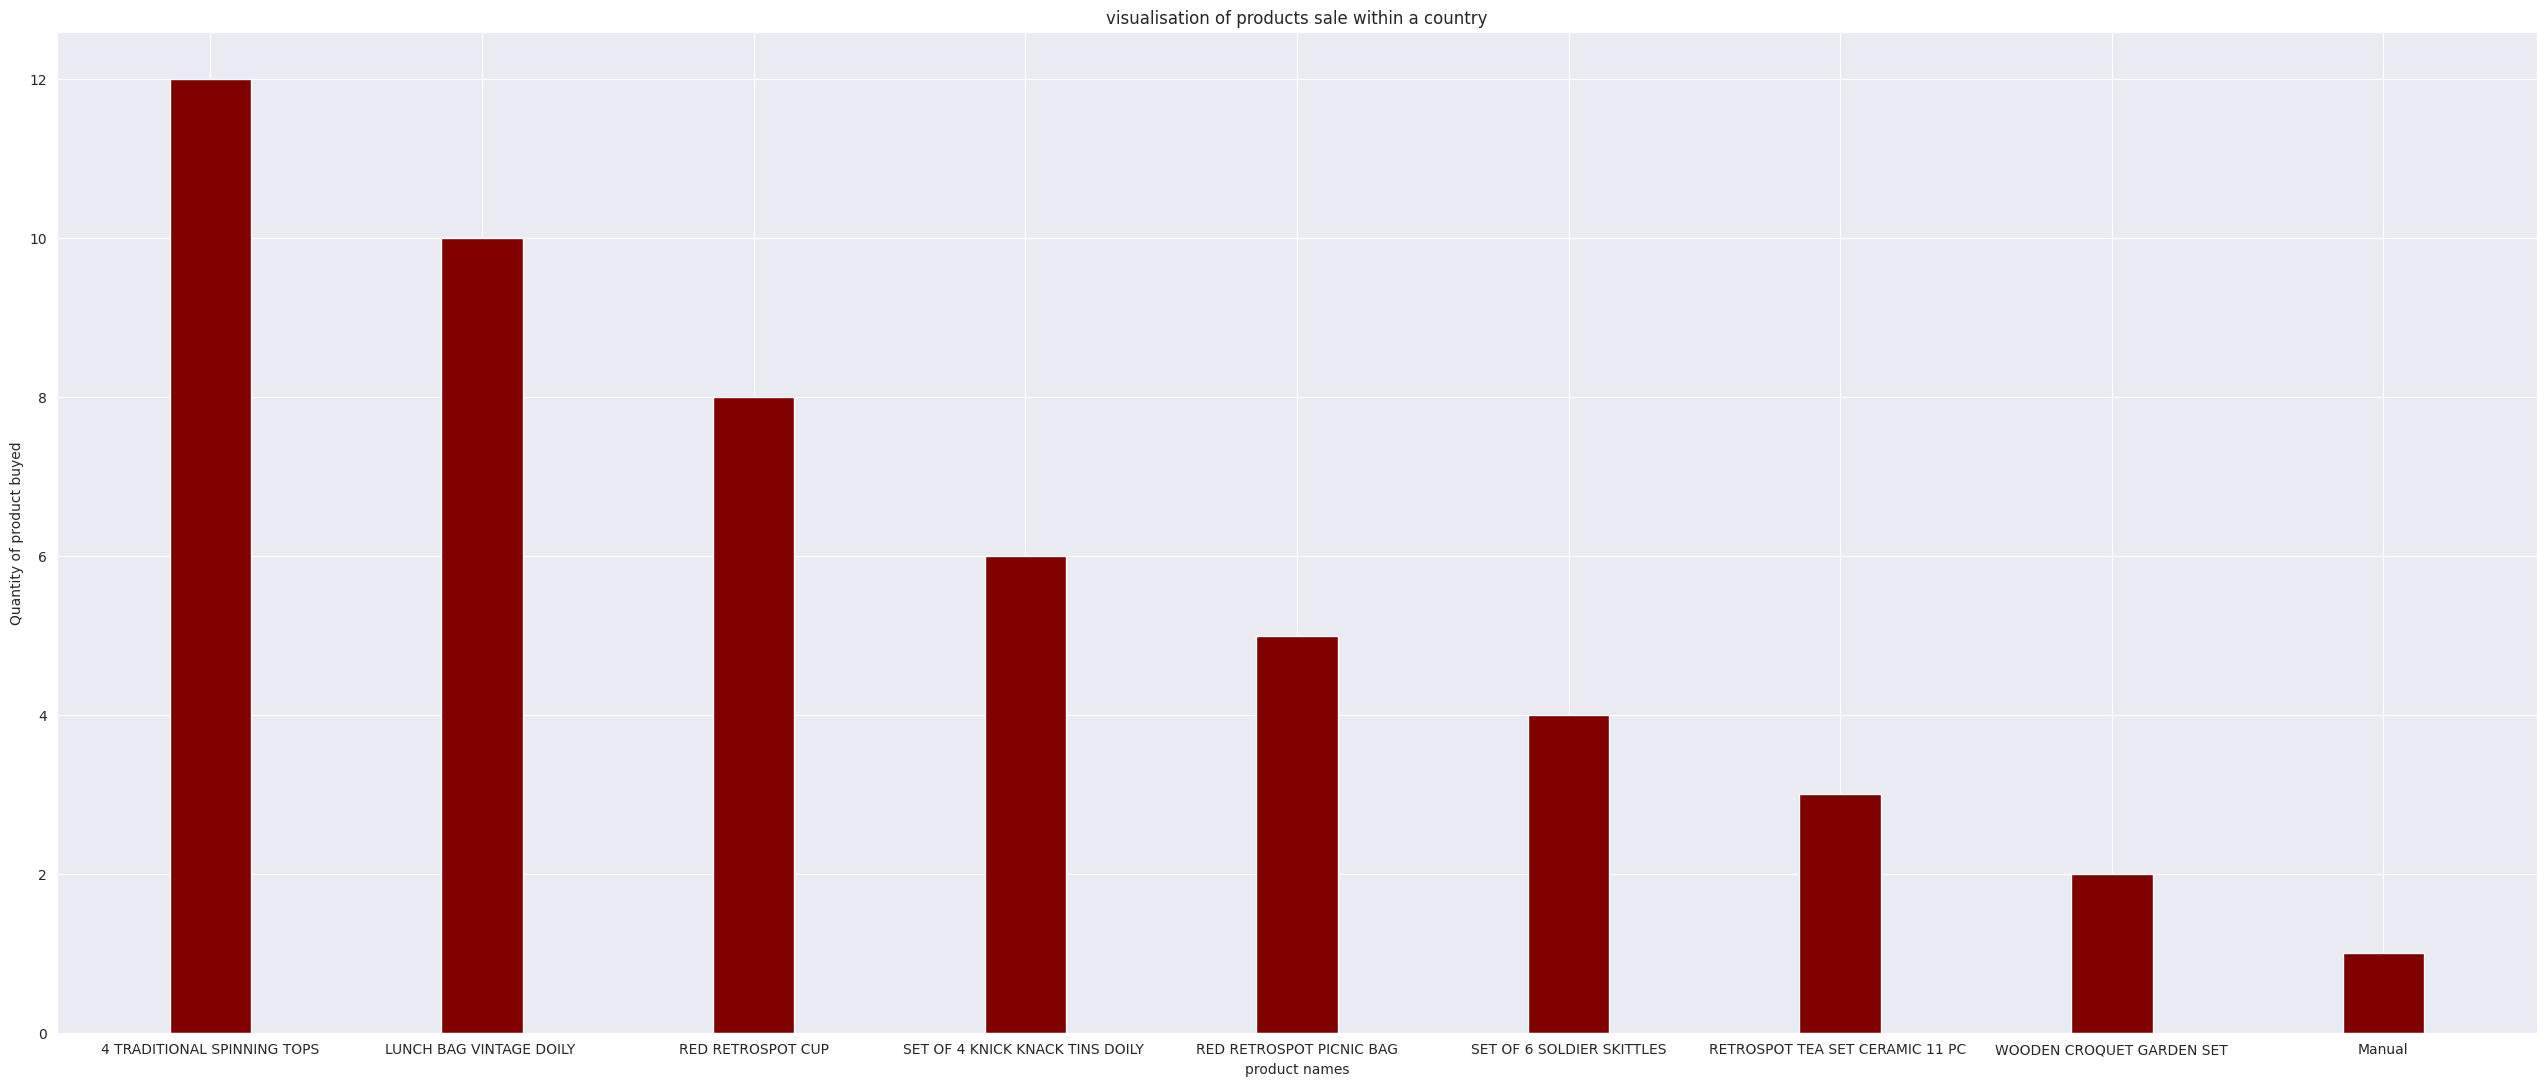

In [ ]:
#Plotting the results to visualise the data 
from pandas.core.algorithms import value_counts_arraylike
import matplotlib.pyplot as plt

for i in count_dictionary:
  key_array=[];
  value_array=[];
  value_array_sorted_ten_top_values=[];
  key_array= list(count_dictionary[i].keys());
  key_array_sorted_top_ten=[];
  value_array= list(count_dictionary[i].values());
  for d in range(0,10):
    if(len(value_array)-1-d>=0):
      value_array_sorted_ten_top_values.append(value_array[len(value_array)-1-d]);
    if(len(key_array)-1-d>=0):
      key_array_sorted_top_ten.append(key_array[len(key_array)-1-d]);
  
  fig = plt.figure(figsize = (32, 13));
  plt.bar(key_array_sorted_top_ten, value_array_sorted_ten_top_values, color ='maroon',
        width = 0.3)
  print("For ",i);
  plt.xlabel("product names")
  plt.ylabel("Quantity of product buyed")
  plt.title("visualisation of products sale within a country")
  plt.show()




([<matplotlib.patches.Wedge at 0x7efff3f2c850>,
 [Text(-1.0603902707085326, 0.2925277316540858, 'United Kingdom'),
  Text(0.974012381670748, -0.5111749997330437, 'Germany'),
  Text(1.0220815558291716, -0.40663164317822126, 'France'),
  Text(1.0566955746081224, -0.30560507620720273, 'EIRE'),
  Text(1.0736482604683197, -0.23933117806368545, 'Spain'),
  Text(1.0800176231006957, -0.20871495823712283, 'Netherlands'),
  Text(1.085031568977629, -0.18084936914997687, 'Belgium'),
  Text(1.0889971785971089, -0.15519389487842825, 'Switzerland'),
  Text(1.0919379438981924, -0.1329342945796459, 'Portugal'),
  Text(1.0939371313909347, -0.11533235696964261, 'Australia'),
  Text(1.095403894637273, -0.1004505232116487, 'Norway'),
  Text(1.0964382279004303, -0.08844892536692758, 'Italy'),
  Text(1.0971937432685366, -0.07852317958652065, 'Channel Islands'),
  Text(1.0978162451488795, -0.0692783652175442, 'Finland'),
  Text(1.0983131831148913, -0.06089459578677896, 'Cyprus'),
  Text(1.0986741698298956, -0

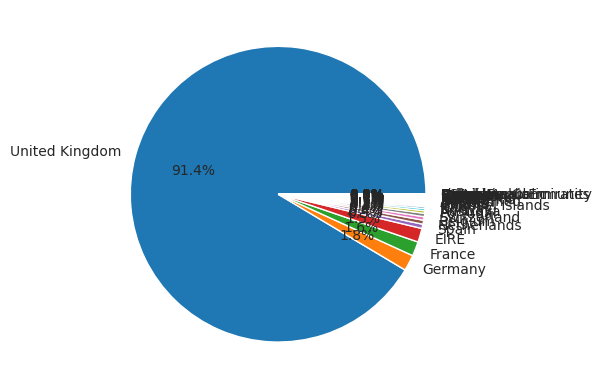

In [ ]:
# Data analysis by sns pie plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

country_counts = df['Country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')

<Axes: >

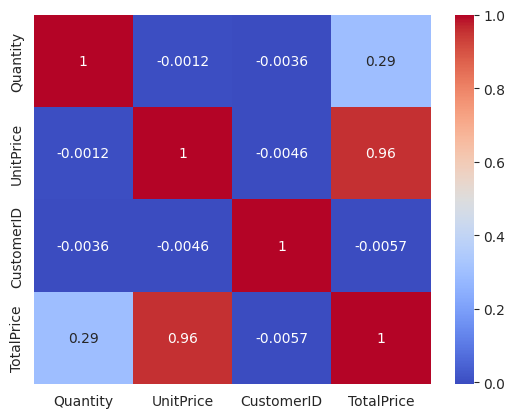

In [ ]:
# Analysing the correlation between different features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

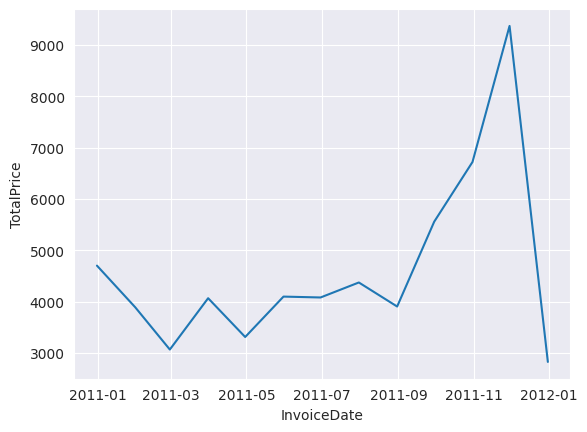

In [ ]:
# Analysing and visualizing the monthly sales 
monthly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalPrice'].sum().reset_index()
sns.lineplot(x='InvoiceDate', y='TotalPrice', data=monthly_sales)


In [ ]:
import pandas as pd

# Spliting and separating the dataset by country

dfs_by_country = {}

dfs_by_country = {}  
for country in pd.unique(df3['Country']):
    mask = df3['Country'] == country  
    dfs_by_country[country] = df3.loc[mask]  

# Function to update total quantity of sold product in a country
def total_quantity_sold(df_country):
  quantity_by_stockcode = df_country.groupby(['StockCode'])['Quantity'].sum().sort_values(ascending=False);
  return quantity_by_stockcode;

# Function to update total revenue in a country according to different products
def total_revenue(df_country):
  revenue_by_stockcode = df_country.groupby(['StockCode'])[['Quantity', 'UnitPrice']].apply(lambda x: (x['Quantity']*x['UnitPrice']).sum()).sort_values(ascending=False)
  return revenue_by_stockcode;

# Doing analysis based on StockCode for each country

for country, df_country in dfs_by_country.items():
    # Calculating total revenue by stock
    revenue_by_stockcode = total_revenue(df_country);

    # Calculate total quantity sold by StockCode
    quantity_by_stockcode = total_quantity_sold(df_country);

    # Print top 10 revenue and quantity StockCodes for each country
    print('Country:', country)
    print('Top 10 StockCodes by Revenue:')
    print(revenue_by_stockcode.head(10))
    print('Top 10 StockCodes by Quantity:')
    print(quantity_by_stockcode.head(10))
    print()


Country: United Kingdom
Top 10 StockCodes by Revenue:
StockCode
DOT       206245.48
22423     134405.94
47566      92501.73
85123A     92179.10
85099B     84516.44
22086      61888.19
84879      54662.15
79321      52986.86
22502      50218.42
22197      48214.77
dtype: float64
Top 10 StockCodes by Quantity:
StockCode
22197     52928
84077     48326
85099B    43167
85123A    36706
84879     33519
22616     25307
21212     24702
22178     23242
17003     22801
21977     20288
Name: Quantity, dtype: int64

Country: France
Top 10 StockCodes by Revenue:
StockCode
POST     15065.00
23084     7275.12
22423     2581.80
21731     2168.10
22554     1868.40
84879     1842.76
22556     1840.35
22326     1828.95
20750     1654.95
22551     1631.40
dtype: float64
Top 10 StockCodes by Quantity:
StockCode
23084    4023
22492    2196
21731    1314
21086    1272
84879    1204
21212    1176
22554    1144
22556    1127
21094    1116
22551    1012
Name: Quantity, dtype: int64

Country: Australia
Top 10 St

In [ ]:
df6=df7=data_frame.copy()
df6 = df6.dropna().reset_index(drop=True)

In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


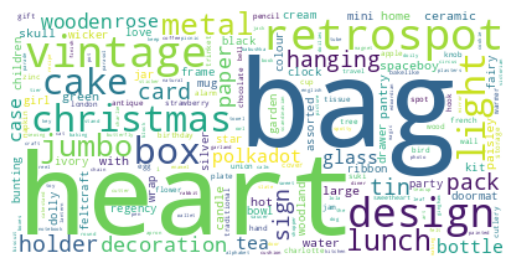

In [ ]:
# Plotting word cloud to visualise product names frequency in Description column
from wordcloud import WordCloud
# print(df6['Description'])
array=[]
for i in range(0,len(df6['Description'])):
  array.append(df6['Description'][i]);
array.remove(array[420391])

Desc = ' '.join(array)
stop_word = ['red', 'pink', 'blue', 'of', 'white', 'small', 't', 'and',
             'in', 'set']
wc = WordCloud(collocations=False,
               stopwords=stop_word,
               background_color='white').generate(Desc.lower())
plt.imshow(wc, interpolation='bilinear');
plt.axis('off');

In [8]:
# Calculate RFM scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                    'InvoiceNo': 'count',
                                    'TotalPrice': 'sum'})

# Rename the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}, inplace=True)

# Create labels for the Recency and Frequency variables
r_labels = range(4, 0, -1)
f_labels = range(1, 5)

# Assign the labels to the quartiles of the Recency and Frequency variables
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)

# Assign the labels to the quartiles of the Monetary variable
m_labels = range(1, 5)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

# Combine the RFM labels into a single string
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Calculate the RFM score as the sum of the quartile labels
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

# Display the RFM analysis results
print(rfm.head())


            Recency  Frequency   Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                               
12346.0         325          2   0.221120  1  1  1         111          3
12347.0           1        182  20.128213  4  4  4         444         12
12348.0          74         31   3.432023  2  2  2         222          6
12349.0          18         73   8.077038  3  3  3         333          9
12350.0         309         17   1.880267  1  1  1         111          3


In [9]:
rfm.keys()


Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Segment',
       'RFM_Score'],
      dtype='object')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Recency', ylabel='Frequency'>

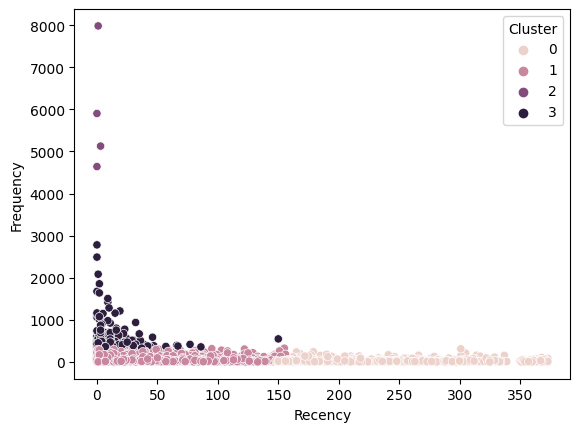

In [10]:
# Select the RFM scores from the preprocessed data
rfm_data = rfm[['Recency', 'Frequency', 'Monetary']].drop_duplicates()

# Standardize the data using the z-score transformation
from scipy.stats import zscore
rfm_data_zscore = rfm_data.apply(zscore)

# Perform K-Means clustering with k=4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(rfm_data_zscore)

# Assign the cluster labels to the original dataset
rfm_data['Cluster'] = kmeans.labels_

# Visualize the clusters using scatter plots
import seaborn as sns
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_data)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

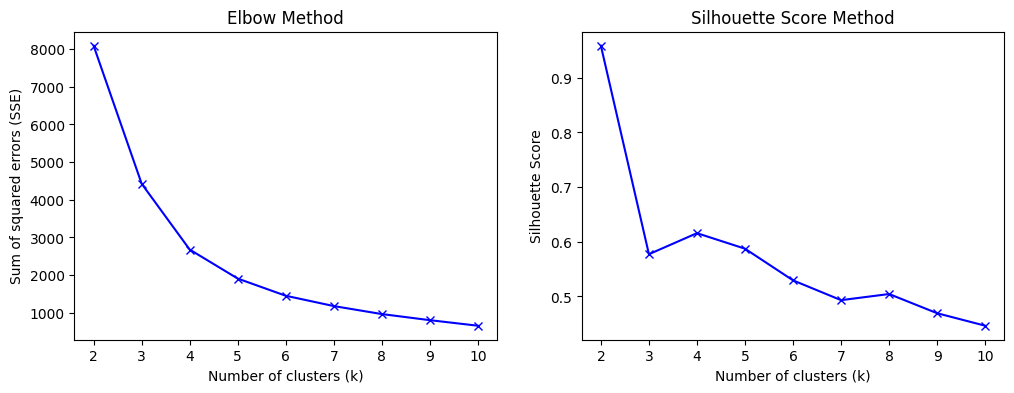

In [11]:
# Selecting  the features to be used in clustering
cluster_data = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize the data using the z-score transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform K-Means clustering with different values of k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values = range(2, 11)
sse_values = []
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(cluster_data_scaled)
    sse_values.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(cluster_data_scaled, kmeans.labels_))

# Plot the elbow curve
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(k_values, sse_values, 'bx-')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Sum of squared errors (SSE)')
ax[0].set_title('Elbow Method')

# Plot the silhouette scores
ax[1].plot(k_values, silhouette_scores, 'bx-')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Score Method')

plt.show()


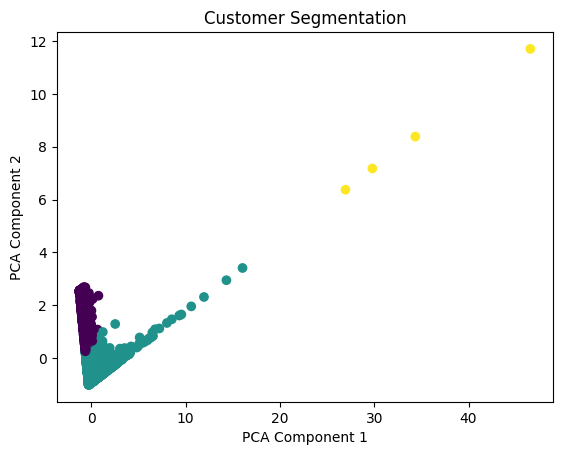

In [12]:
# Perform KMeans clustering on the data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42,n_init=10)
kmeans.fit(cluster_data_scaled)

# Reducing the dimensionality of the data using PCA to use ahead
pca = PCA(n_components=3)
df_pca = pca.fit_transform(cluster_data_scaled)

# Ploting the clusters in 2D space

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Applying K-means clustering on the preprocessed dataset on different set of features- Quantity and unit price

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting the needed columns for clustering
X = df1[['Quantity', 'UnitPrice']]

# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit K-means clustering algorithm to the data
kmeans = KMeans(n_clusters=3, random_state=0,n_init=10)
kmeans.fit(X_scaled)

# Add the cluster labels to the original data
df1['cluster'] = kmeans.labels_

# Analyze the clusters
cluster_summary = df1.groupby('cluster')[['Quantity', 'UnitPrice']].mean()

# Print the cluster summary
print("The cluster summary is as follows--")
print(cluster_summary)


The cluster summary is as follows--
             Quantity    UnitPrice
cluster                           
0            9.839308     4.054723
1           -0.806452  9730.436452
2       -77605.000000     1.560000


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

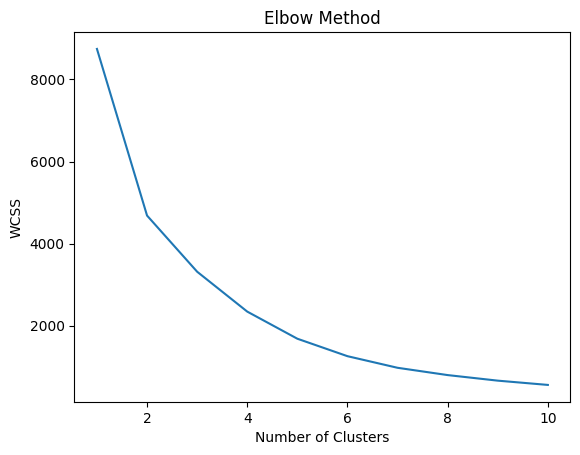

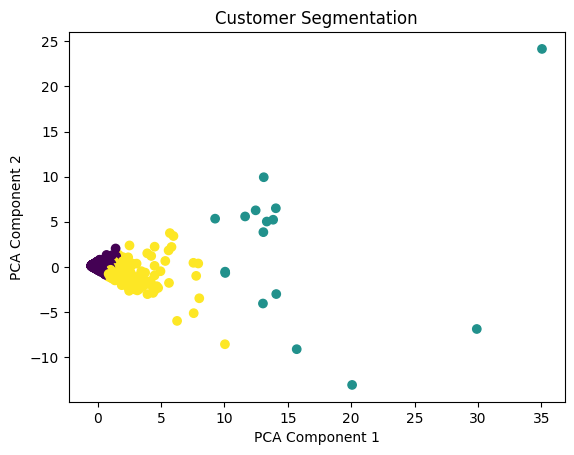

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df2=data_frame.copy()
# Preprocess the data for customer segmentation
df2 = df2.groupby(['CustomerID']).agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
})

df2 = df2.dropna()

# Scaling the data for KMeans clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# Find optimal number of clusters using the elbow method
def optimal_clusters(df_scaled):
  wcss = []
  for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
      kmeans.fit(df_scaled)
      wcss.append(kmeans.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.show()

optimal_clusters(df_scaled);

# Perform KMeans clustering on the data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42,n_init=10)
kmeans.fit(df_scaled)

# Reducing the dimensionality of the data using PCA to use ahead
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Ploting the clusters in 2D space

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


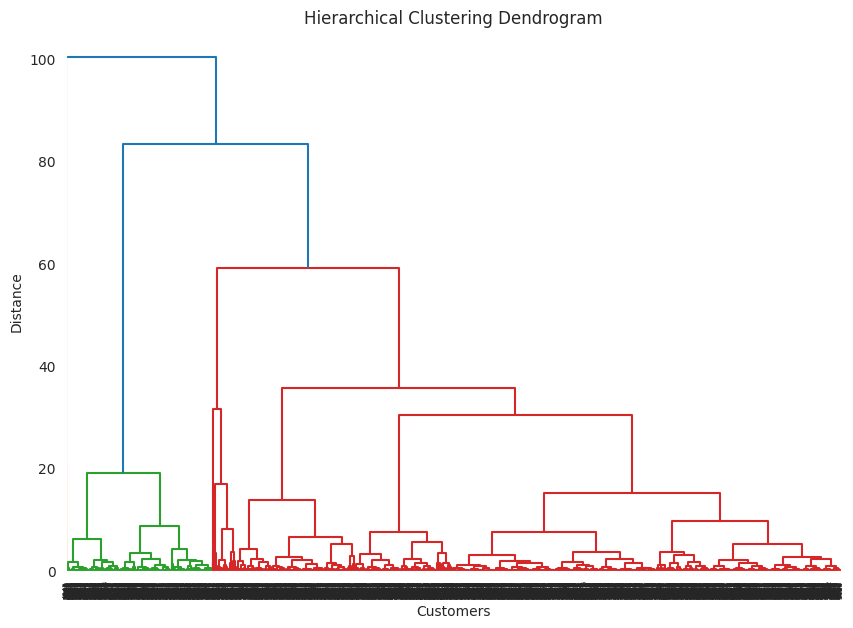

In [ ]:
# Heirarchial Clustering 

# Selecting the features to be used in clustering
cluster_data = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardizeing the data using the z-score transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Now Performing hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(cluster_data_scaled, method='ward')
fig = plt.figure(figsize=(10, 7))
dendrogram(linked)

# Ploting dendogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


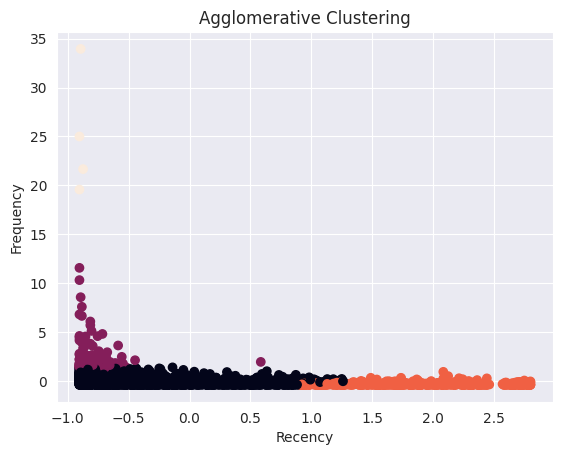

In [ ]:
# Agglomerative Clustering

# Select the features to be used in clustering
cluster_data = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize the data using the z-score transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(cluster_data_scaled)

# Plot the clusters
plt.scatter(cluster_data_scaled[:, 0], cluster_data_scaled[:, 1], c=agglo_labels)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Agglomerative Clustering')
plt.show()


Number of clusters: 1
Number of noise points: 11


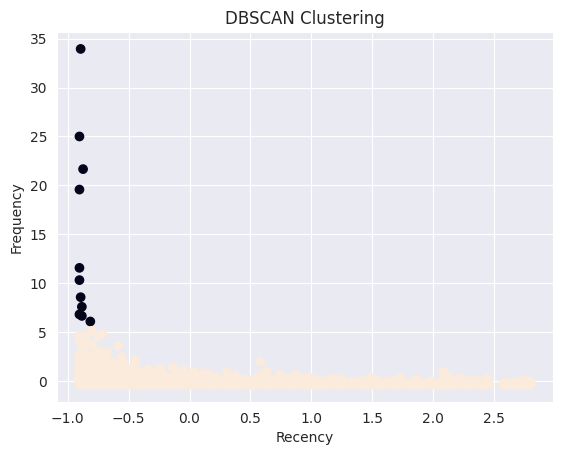

In [ ]:
# Db scan clustering

# Select the features to be used in clustering
cluster_data = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize the data using the z-score transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform DBSCAN clustering
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(cluster_data_scaled)

# Print the number of clusters and noise points
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_noise_points = list(dbscan_labels).count(-1)
print('Number of clusters:', num_clusters)
print('Number of noise points:', num_noise_points)

# Plot the clusters
plt.scatter(cluster_data_scaled[:, 0], cluster_data_scaled[:, 1], c=dbscan_labels)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('DBSCAN Clustering')
plt.show()
